In [1]:
# Jessica Gallo, Omar Guzman, Kevin Fremgen
# Created: 11/01/2020
# Last Modified: 11/15/2020
# CSC767 Neural Networks & Deep Learning
# Project 1
# Image Classification with Convolutional Neural Networks (Keras and/or Tensorflow)

In [2]:
'''
Explore the implementation of CNN with a color image dataset by your choice. Datasets
MNIST, CIFAR-10, CIFAR-100 or MNIST-like and CIFAR-like are excluded. As the datasets
are usually bigger than you can afford, you may decide to use only part of it.
'''

In [3]:
'''
a) Dataset: 5-6classes, 1000+ images for each classes in training, 300+ images for each 
of the classes in the validation, and 60+ images for each of the classes in the test set. 
Split into (70% train - 20% val - 10% test). Use data analysis and preprocessing as 
normalization or standardization etc. Represent the classes in training and val sets in 
the following two ways shown below for the training set. Do the same for th val set. Make 
conclusion about the imbalance of the training and val sets and pick up the way to fix 
imbalance problem of both datasets: train and val.
'''

In [4]:
# -----
# GPU |
# ----

import tensorflow as tf 
print(tf.test.gpu_device_name())
import tensorflow
print(tensorflow.__version__)
import keras
print(keras.__version__)

/device:GPU:0
2.1.0
2.3.1


Using TensorFlow backend.


In [5]:
# ---------
# Imports |
# --------

import os, shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import image  # preprocessing a single image
import numpy as np  # preprocessing a single image
from keras.applications import VGG16  # defining the loss tensor for filter visualiation
from keras import backend as K  # defining the loss tensor for filter visualization
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns

In [6]:
'''
a) Dataset: 5-6 classes, 1000+ images for each classes in training, 300+ images for each 
of the classes in the validation, and 60+ images for each of the classes in the test set. 
Split into (70% train - 20% val - 10% test). Use data analysis and preprocessing as 
normalization or standardization etc. Represent the classes in training and val sets in 
the following two ways shown below for the training set. Do the same for th val set. Make 
conclusion about the imbalance of the training and val sets and pick up the way to fix 
imbalance problem of both datasets: train and val.
'''

'\na) Dataset: 5-6classes, 1000+ images for each classes in training, 300+ images for each \nof the classes in the validation, and 60+ images for each of the classes in the test set. \nSplit into (70% train - 20% val - 10% test). Use data analysis and preprocessing as \nnormalization or standardization etc. Represent the classes in training and val sets in \nthe following two ways shown below for the training set. Do the same for th val set. Make \nconclusion about the imbalance of the training and val sets and pick up the way to fix \nimbalance problem of both datasets: train and val.\n'

In [7]:
# Dataset
# removed folders(characters) that did not have 1000 or more pictures
# removed the characters from the test set that were removed from the folders
# created validation set with last 200 pictures of the train set (200 images cut from train set put into validation set)

In [8]:
# ------------------
# DOWNLOADING DATA |
# -----------------

# Path to dataset
dataset_dir = './Downloads/simpsons_dataset_small2'

os.listdir('./Downloads/simpsons_dataset_small2') # returns list

['test', 'train', 'validation']

In [9]:
# ---------------------
# Mapping directories |
# --------------------

train_dir = './Downloads/simpsons_dataset_small2/train'
test_dir = './Downloads/simpsons_dataset_small2/test'
validation_dir = './Downloads/simpsons_dataset_small2/validation'

In [10]:
# ---------------------------------------------
# Listing Amount of Images for Each Character |
# --------------------------------------------

train_count=[]
val_count=[]
whole_count=[]

print('TRAINING SET')
files= os.listdir(".//Downloads//simpsons_dataset_small2//train")
for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small2//train//'+type+'/')
    print(type+ "  "+ str(len(count)))
    train_count.append(len(count))
print()

print('VALIDATION SET')
files= os.listdir('.//Downloads//simpsons_dataset_small2//validation')
for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small2//validation/'+type+'/')
    print(type+ "  "+ str(len(count)))
    val_count.append(len(count))

print()

print('TEST SET')
files= os.listdir('./Downloads//simpsons_dataset_small2//test')

for type in files:
    count = os.listdir('.//Downloads//simpsons_dataset_small2//test//'+type+'/')
    print(type+ "  "+ str(len(count)))
    whole_count.append(len(count))

TRAINING SET
abraham_grampa_simpson  712
bart_simpson  1141
charles_montgomery_burns  993
chief_wiggum  785
homer_simpson  2045
krusty_the_clown  1005
lisa_simpson  1145
marge_simpson  1090
milhouse_van_houten  878
moe_szyslak  1251
ned_flanders  1253
principal_skinner  994

VALIDATION SET
abraham_grampa_simpson  201
bart_simpson  201
charles_montgomery_burns  200
chief_wiggum  201
homer_simpson  201
krusty_the_clown  201
lisa_simpson  209
marge_simpson  201
milhouse_van_houten  201
moe_szyslak  201
ned_flanders  201
principal_skinner  200

TEST SET
abraham_grampa_simpson  48
bart_simpson  50
charles_montgomery_burns  48
chief_wiggum  50
homer_simpson  50
krusty_the_clown  50
lisa_simpson  50
marge_simpson  50
milhouse_van_houten  49
moe_szyslak  50
ned_flanders  49
principal_skinner  50


In [11]:
# returns a number of items inside the folder
def getNumber(path):
    s = 0
    for i in os.listdir(path):
        if i !='.DS_Store':
            s += len(os.listdir(os.path.join(path,i)))
    return s

In [12]:
# -------------------------------------
# Number of Samples in Each Directory |
# ------------------------------------

n_train = getNumber(train_dir)
n_test = getNumber(test_dir)
n_validation = getNumber(validation_dir)

print('Number of Samples Train:', n_train)
print('Number of Samples Validation:', n_validation)
print('Number of Samples Test:', n_test)

Number of Samples Train: 13292
Number of Samples Validation: 2418
Number of Samples Test: 594


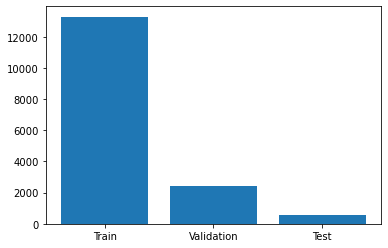

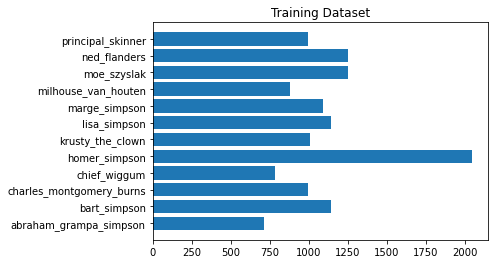

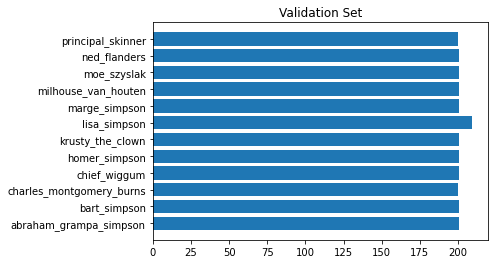

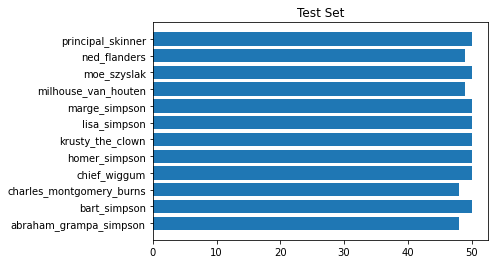

In [13]:
# -----------------------------------------
# Plots to Show Data Distribution/Amounts |
# ----------------------------------------

# General Datasets
fig, ax = plt.subplots()
ax.bar(['Train', 'Validation', 'Test'], [n_train, n_validation, n_test])
plt.show()

# Each character in training set
plt.barh(files, train_count,)
plt.title('Training Dataset')
plt.show()

# Each character in validation set
plt.barh(files, val_count,)
plt.title('Validation Set')
plt.show()

# Each character in test set
plt.barh(files, whole_count,)
plt.title('Test Set')
plt.show()

In [14]:
# --------------------
# ImageDataGenerator |
# -------------------

# TEST
test_datagen = ImageDataGenerator(rescale=1./255)

# TRAIN
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (250, 250),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

# VALIDATION
validation_datagen = ImageDataGenerator(rescale= 1./255,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        horizontal_flip = True)
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (250, 250),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=False)

Found 13292 images belonging to 12 classes.
Found 2418 images belonging to 12 classes.


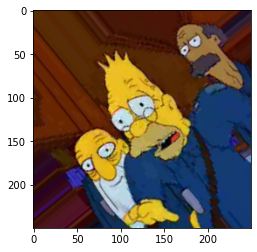

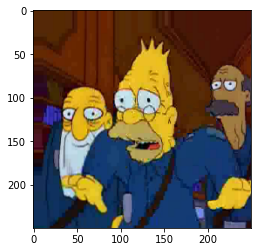

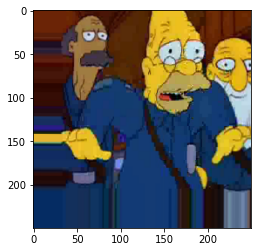

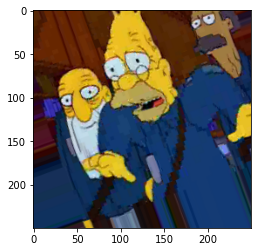

In [15]:
# -------------------------------------
# Displaing Randomly Augmented Images |
# ------------------------------------

from keras.preprocessing import image
train_dir = './Downloads/simpsons_dataset_small2/train/abraham_grampa_simpson'

fnames = [os.path.join(train_dir, fname) for
          fname in os.listdir(train_dir)]

img_path = fnames[6]  #choosing an image to augment

img = image.load_img(img_path, target_size = (250, 250))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break
    
plt.show()

In [16]:
'''
b) Sequential model and build topology for CNN implementing inbalanced dataset as well as 
the balanced train and val datasets. 
CNN topology: 4+ convolutional layers, # of neurons, # of filters and their size and type 
of pooliing layers and where to include the last one is up to you. 
Experiments with 3 different models (the difference could be the choice of activation 
function, optimizer, and number of convolutional layers, batch size or any combination of 
these, learning rate change, stride etc.) Include as a first choice ReLU, Adam and batch 
size 32. INCLUDE BATCH NORMALIZATION and SHUFFLING. Describe each model. Apply 
regularization and dropout to the model to prevent overfitting if necessary.
'''

'\nb) Sequential model and build topology for CNN implementing inbalanced dataset as well as \nthe balanced train and val datasets. \nCNN topology: 4+ convolutional layers, # of neurons, # of filters and their size and type \nof pooliing layers and where to include the last one is up to you. \nExperiments with 3 different models (the difference could be the choice of activation \nfunction, optimizer, and number of convolutional layers, batch size or any combination of \nthese, learning rate change, stride etc.) Include as a first choice ReLU, Adam and batch \nsize 32. INCLUDE BATCH NORMALIZATION and SHUFFLING. Describe each model. Apply \nregularization and dropout to the model to prevent overfitting if necessary.\n'

In [17]:
'''
c) Plot training and validation accuracy as well as training and validation loss for each 
of the above models using combinations like the one shown below.
'''

'\nc) Plot training and validation accuracy as well as training and validation loss for each \nof the above models using combinations like the one shown below.\n'

In [18]:
'''
Problem 2: Perform testing. Get the predicted class - show some correctly and not correctly predicted images of testing set as 
below. Evaluate test results using confusion matrix, classification report (precision, recall, f1-score, support, ROC/AUC and 
Precision-Recall curves). Except tables for this evaluation provies graphics of normalized confusion matrix as shown below, 
ROC/AUC curves as the one below.
'''

'\nProblem 2: Perform testing. Get the predicted class - show some correctly and not correctly predicted images of testing set as \nbelow. Evaluate test results using confusion matrix, classification report (precision, recall, f1-score, support, ROC/AUC and \nPrecision-Recall curves). Except tables for this evaluation provies graphics of normalized confusion matrix as shown below, \nROC/AUC curves as the one below.\n'

In [19]:
# MODEL 1
# -------
# ReLU activation function
# Adam optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model = tensorflow.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (250, 250, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 128)       0

In [20]:
adam = optimizers.Adam(lr = 0.001)

model.compile(loss = "categorical_crossentropy", 
               optimizer=adam, 
               metrics=["acc"])

In [21]:
batch_size=32

# Training model with adagrad, 30 epochs and shuffling data
history_adam = model.fit_generator(train_generator,
                                   steps_per_epoch=int(13292/batch_size),
                                   epochs=30,
                                   validation_data=validation_generator,
                                   validation_steps=int(2418/batch_size),
                                   shuffle=True)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 415 steps, validate for 75 steps
Epoch 1/30
415/415 [==============================] - 174s 420ms/step - loss: 2.1115 - acc: 0.2839 - val_loss: 1.7334 - val_acc: 0.4563
Epoch 2/30
415/415 [==============================] - 172s 415ms/step - loss: 1.4860 - acc: 0.5063 - val_loss: 1.3019 - val_acc: 0.5442
Epoch 3/30
415/415 [==============================] - 172s 413ms/step - loss: 1.1041 - acc: 0.6379 - val_loss: 0.8508 - val_acc: 0.7192
Epoch 4/30
415/415 [==============================] - 174s 418ms/step - loss: 0.8855 - acc: 0.7093 - val_loss: 0.6873 - val_acc: 0.7667
Epoch 5/30
415/415 [==============================] - 174s 418ms/step - loss: 0.7512 - acc: 0.7590 - val_loss: 0.5941 - val_acc: 0.8062
Epoch 6/30
415/415 [==============================] - 173s 416ms/step - loss: 0.6908 - acc: 0.7801 - val_loss: 0.5670 - val_acc: 0.8200
Epoch 7/30
415/

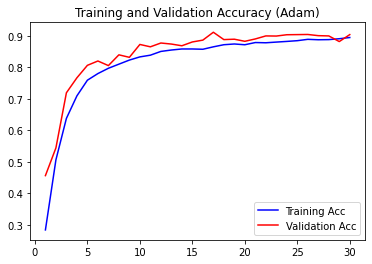

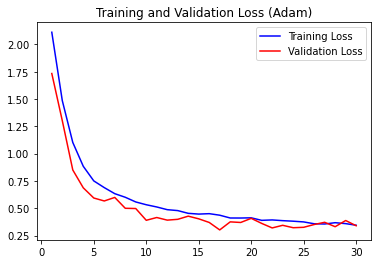

<Figure size 432x288 with 0 Axes>

In [22]:
# ----------------------------------------------
# Visualizing Train/Validation Loss & Accuracy |
# ---------------------------------------------

acc_adam = history_adam.history['acc']
val_acc_adam = history_adam.history['val_acc']
loss_adam = history_adam.history['loss']
val_loss_adam = history_adam.history['val_loss']

epochs_adam = range(1,len(acc_adam) +1)

# Plot of accuracy
plt.plot(epochs_adam, acc_adam, color='blue', label='Training Acc')
plt.plot(epochs_adam, val_acc_adam, color='red', label='Validation Acc')
plt.title('Training and Validation Accuracy (Adam)')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_adam, loss_adam, color='blue', label='Training Loss')
plt.plot(epochs_adam, val_loss_adam, color='red', label='Validation Loss')
plt.title('Training and Validation Loss (Adam)')
plt.legend()
plt.figure()

plt.show()

In [23]:
# ---------------
# SAVE THE MODEL |
# ---------------
model.save('NNDL_Proj1_modelAdam.h5')

In [24]:
# ------------------
# Confusion Matrix |
# -----------------

num_of_train_samples = 13292
#num_of_test_samples = 416 # steps per epoch
batch_size=32
steps_per_epoch=num_of_train_samples // batch_size
#validation_generator.reset()

Y_pred = model.predict_generator(validation_generator, steps_per_epoch)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix for Model with Adam Optimizer')
print(confusion_matrix(validation_generator.classes, y_pred))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix for Model with Adam Optimizer
[[164   0   1   0  32   0   0   0   0   1   3   0]
 [  1 160   4   0  14   1  15   1   0   2   3   0]
 [  1   0 173   0   2   0   2   1   3  15   2   1]
 [  0   1   3 185   0   0   0   0   0  12   0   0]
 [  0   0   2   2 194   0   0   1   0   1   1   0]
 [  1   0   1   0   2 193   0   0   0   3   1   0]
 [  0  17   6   0   5   0 166   1   1   7   6   0]
 [  0   0   1   0   0   0   0 198   1   1   0   0]
 [  0   0   1   2   3   0   0   3 191   0   0   1]
 [  1   0   0   1   0   1   0   0   0 195   0   3]
 [  0   1   1   0   2   1   0   1   0   0 195   0]
 [  0   0   4   3   4   1   0   2   0  14   0 172]]


In [25]:
# -----------------------
# Classification Report |
# ----------------------

print('Classification Report for Model with Adam Optimizer')
target_names = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report for Model with Adam Optimizer
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.98      0.82      0.89       201
            bart_simpson       0.89      0.80      0.84       201
charles_montgomery_burns       0.88      0.86      0.87       200
            chief_wiggum       0.96      0.92      0.94       201
           homer_simpson       0.75      0.97      0.85       201
        krusty_the_clown       0.98      0.96      0.97       201
            lisa_simpson       0.91      0.79      0.85       209
           marge_simpson       0.95      0.99      0.97       201
     milhouse_van_houten       0.97      0.95      0.96       201
             moe_szyslak       0.78      0.97      0.86       201
            ned_flanders       0.92      0.97      0.95       201
       principal_skinner       0.97      0.86      0.91       200

                accuracy                           0.90      2418
               macro a

76/76 [==============================] - 7s 86ms/step


0.9478301631694431

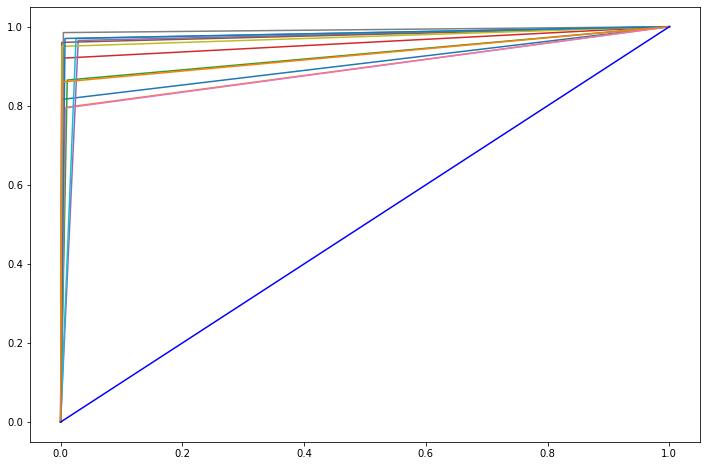

In [27]:
# ---------------
# ROC/AUC Score |
# --------------

from sklearn.preprocessing import LabelBinarizer

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # target_names: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

validation_generator.reset() # resetting generator
y_pred = model.predict_generator(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(validation_generator.classes, y_pred)

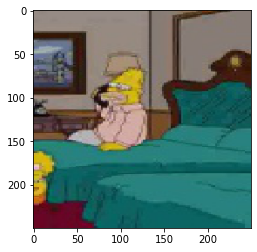

Actual value:  0 	Predicted value:  0


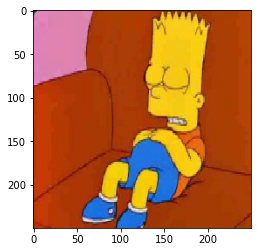

Actual value:  1 	Predicted value:  1


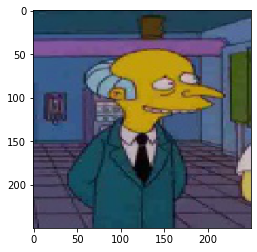

Actual value:  2 	Predicted value:  2


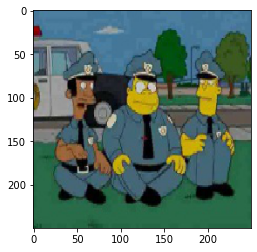

Actual value:  3 	Predicted value:  3


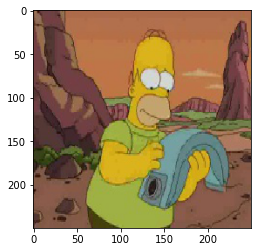

Actual value:  4 	Predicted value:  4


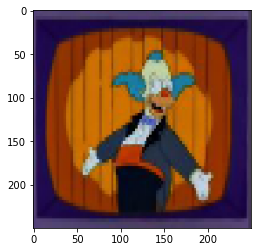

Actual value:  5 	Predicted value:  5


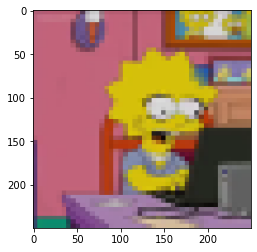

Actual value:  6 	Predicted value:  6


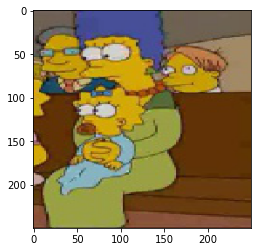

Actual value:  7 	Predicted value:  7


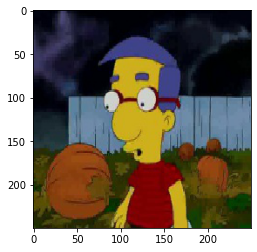

Actual value:  8 	Predicted value:  8


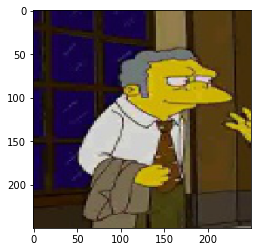

Actual value:  9 	Predicted value:  9


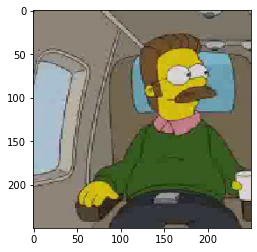

Actual value:  10 	Predicted value:  10


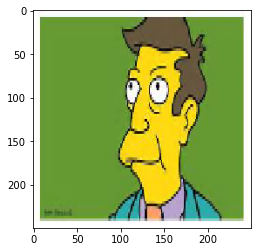

Actual value:  11 	Predicted value:  11
Total number of images for "testing":
Found 594 images belonging to 12 classes.


In [28]:
# ------------------------------------------
# Displaying 12 images with the prediction |
# -----------------------------------------

# 1 image from each class

labels = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']

i=0
for names in labels:
    pathToFolder = test_dir +'/'+names+'/'
    fnames = [os.path.join(pathToFolder, fname) for
          fname in os.listdir(pathToFolder)]
    
    # generate random number btwn (0,30)
    randNum = random.randint(0, 30)
    img_path = fnames[randNum]
    tmp_img = image.load_img(img_path, target_size = (250, 250))
    tmp_img = image.img_to_array(tmp_img)
    tmp_img = np.expand_dims(tmp_img, axis = 0)
    
    tmp_img /=255.
    plt.imshow(tmp_img[0])
    plt.show()
    # predict 
    result = model.predict(tmp_img)
    train_generator.class_indices
    print('Actual value: ',i,'\tPredicted value: ', np.argmax(result))
    i+=1

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (250, 250),
                                                  batch_size = 32,
                                                  class_mode = "categorical",
                                                  shuffle=False)

In [ ]:
# b

In [29]:
# MODEL 2
# -------
# ReLU activation function
# Adadagrad optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model2 = tensorflow.keras.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (250, 250, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(.5))
model2.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(12, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 128)      

In [30]:
adagrad = optimizers.Adagrad(lr=0.01)

model2.compile(loss = "categorical_crossentropy", 
               optimizer=adagrad, 
               metrics=["acc"])

In [31]:
batch_size=32

# Training model with adagrad, 30 epochs and shuffling data
history_adagrad = model2.fit_generator(train_generator,
                                       steps_per_epoch=int(13292/batch_size),
                                       epochs=30,
                                       validation_data=validation_generator,
                                       validation_steps=int(2418/batch_size),
                                       shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 415 steps, validate for 75 steps
Epoch 1/30
415/415 [==============================] - 172s 415ms/step - loss: 1.9426 - acc: 0.3509 - val_loss: 1.6300 - val_acc: 0.5400
Epoch 2/30
415/415 [==============================] - 175s 422ms/step - loss: 1.4356 - acc: 0.5388 - val_loss: 1.1719 - val_acc: 0.6071
Epoch 3/30
415/415 [==============================] - 180s 433ms/step - loss: 1.1936 - acc: 0.6102 - val_loss: 1.0025 - val_acc: 0.6521
Epoch 4/30
415/415 [==============================] - 175s 422ms/step - loss: 1.0163 - acc: 0.6717 - val_loss: 0.8721 - val_acc: 0.7021
Epoch 5/30
415/415 [==============================] - 174s 420ms/step - loss: 0.8792 - acc: 0.7169 - val_loss: 0.8464 - val_acc: 0.7142
Epoch 6/30
415/415 [==============================] - 175s 421ms/step - loss: 0.7575 - acc: 0.7554 - val_loss: 0.6523 - val_acc: 0.7804
Epoch 7/30
415/415 [==============================] - 174s 418ms/step - loss: 0.6755 - acc:

In [32]:
# ---------------
# SAVE THE MODEL |
# ---------------
model2.save('NNDL_Proj1_modelAdagrad.h5')

In [ ]:
# c

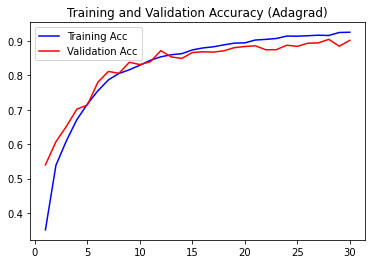

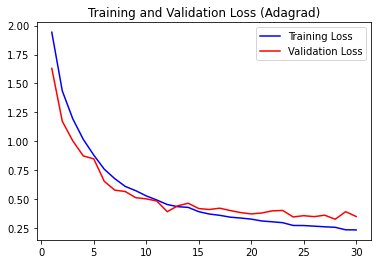

<Figure size 432x288 with 0 Axes>

In [33]:
# ----------------------------------------------
# Visualizing Train/Validation Loss & Accuracy |
# ---------------------------------------------

acc_adagrad = history_adagrad.history['acc']
val_acc_adagrad = history_adagrad.history['val_acc']
loss_adagrad = history_adagrad.history['loss']
val_loss_adagrad = history_adagrad.history['val_loss']

epochs_adagrad = range(1,len(acc_adagrad) +1)

# Plot of accuracy
plt.plot(epochs_adagrad, acc_adagrad, color='blue', label='Training Acc')
plt.plot(epochs_adagrad, val_acc_adagrad, color='red', label='Validation Acc')
plt.title('Training and Validation Accuracy (Adagrad)')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_adagrad, loss_adagrad, color='blue', label='Training Loss')
plt.plot(epochs_adagrad, val_loss_adagrad, color='red', label='Validation Loss')
plt.title('Training and Validation Loss (Adagrad)')
plt.legend()
plt.figure()

plt.show()

In [34]:
# ------------------
# Confusion Matrix |
# -----------------

num_of_train_samples = 13292
#num_of_test_samples = 416 # steps per epoch
batch_size=32
steps_per_epoch=num_of_train_samples // batch_size
#validation_generator.reset()

Y_pred = model2.predict_generator(validation_generator, steps_per_epoch)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix fo Model with Adagrad')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix fo Model with Adagrad
[[175   0   1   0  22   1   0   0   0   1   0   1]
 [  1 174   4   0  11   0   8   3   0   0   0   0]
 [  0   5 156   2  11   0   8   1   3  14   0   0]
 [  0   1   2 191   2   0   0   1   1   3   0   0]
 [  6   2   2   0 185   0   0   2   0   2   2   0]
 [  1   1   0   0   0 196   1   1   1   0   0   0]
 [  1  15   4   0   6   0 182   0   0   0   1   0]
 [  1   2   1   0   0   0   0 197   0   0   0   0]
 [  1   0   1   0   2   0   0   2 194   1   0   0]
 [  0   2   0   1   3   2   4   0   1 188   0   0]
 [  2   1   0   0   2   0   1   0   1   2 191   1]
 [  0   0   3   6   9   0   0   0   0  28   0 154]]


In [35]:
# -----------------------
# Classification Report |
# ----------------------

print('Classification Report for Model with Adagrad')
target_names = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report for Model with Adagrad
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.93      0.87      0.90       201
            bart_simpson       0.86      0.87      0.86       201
charles_montgomery_burns       0.90      0.78      0.83       200
            chief_wiggum       0.95      0.95      0.95       201
           homer_simpson       0.73      0.92      0.81       201
        krusty_the_clown       0.98      0.98      0.98       201
            lisa_simpson       0.89      0.87      0.88       209
           marge_simpson       0.95      0.98      0.97       201
     milhouse_van_houten       0.97      0.97      0.97       201
             moe_szyslak       0.79      0.94      0.85       201
            ned_flanders       0.98      0.95      0.97       201
       principal_skinner       0.99      0.77      0.87       200

                accuracy                           0.90      2418
               macro avg     

76/76 [==============================] - 6s 80ms/step


0.9469882396716208

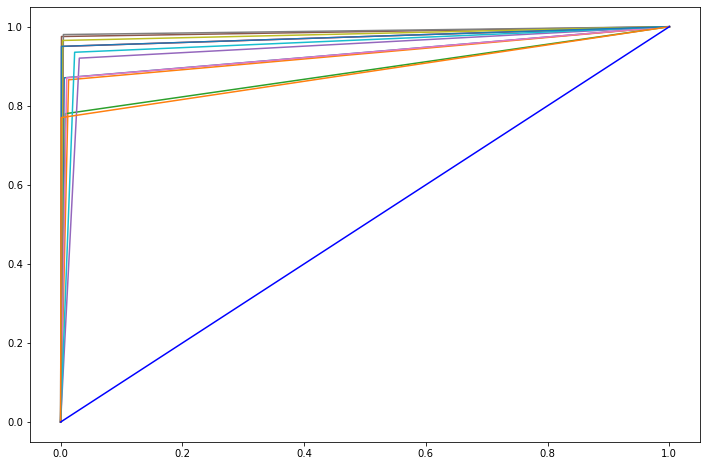

In [36]:
# ---------------
# ROC/AUC Score |
# --------------
from sklearn.preprocessing import LabelBinarizer

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # target_names: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

validation_generator.reset() # resetting generator
y_pred = model2.predict_generator(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(validation_generator.classes, y_pred)

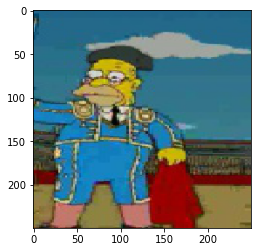

Actual value:  0 	Predicted value:  0


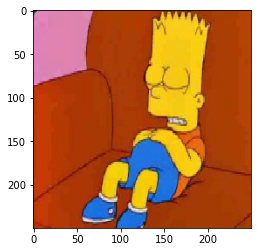

Actual value:  1 	Predicted value:  1


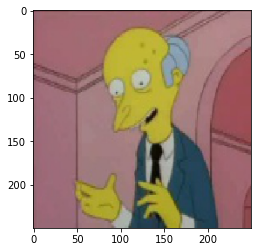

Actual value:  2 	Predicted value:  2


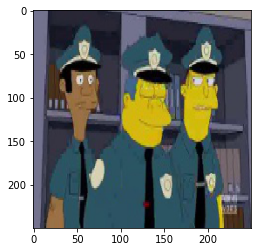

Actual value:  3 	Predicted value:  3


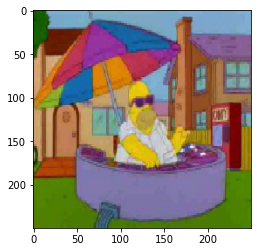

Actual value:  4 	Predicted value:  4


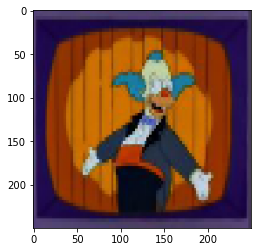

Actual value:  5 	Predicted value:  5


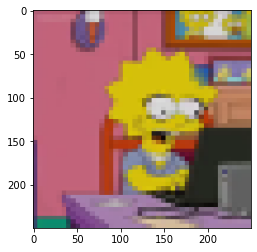

Actual value:  6 	Predicted value:  6


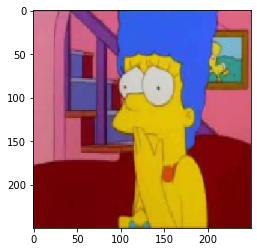

Actual value:  7 	Predicted value:  7


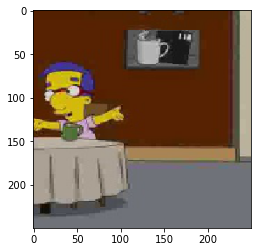

Actual value:  8 	Predicted value:  8


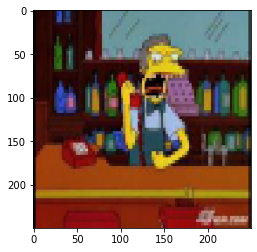

Actual value:  9 	Predicted value:  9


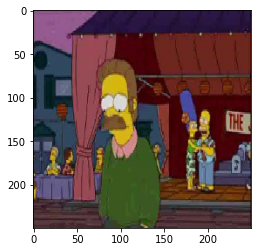

Actual value:  10 	Predicted value:  10


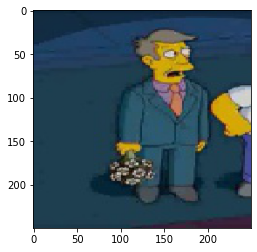

Actual value:  11 	Predicted value:  11
Total number of images for "testing":
Found 594 images belonging to 12 classes.


In [37]:
# ------------------------------------------
# Displaying 12 Images with the Prediction |
# -----------------------------------------

# 1 image from each class

labels = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']

i=0
for names in labels:
    pathToFolder = test_dir +'/'+names+'/'
    fnames = [os.path.join(pathToFolder, fname) for
          fname in os.listdir(pathToFolder)]
    
    # generate random number btwn (0,30)
    randNum = random.randint(0, 30)
    img_path = fnames[randNum]
    tmp_img = image.load_img(img_path, target_size = (250, 250))
    tmp_img = image.img_to_array(tmp_img)
    tmp_img = np.expand_dims(tmp_img, axis = 0)
    
    tmp_img /=255.
    plt.imshow(tmp_img[0])
    plt.show()
    # predict 
    result = model2.predict(tmp_img)
    train_generator.class_indices
    print('Actual value: ',i,'\tPredicted value: ', np.argmax(result))
    i+=1

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (250, 250),
                                                  batch_size = 32,
                                                  class_mode = "categorical",
                                                  shuffle=False)

In [38]:
# MODEL 3
# -------
# ReLU activation function
# Rmsprop optimizer
# 4 Conv
# 1 Batch Norm
# 4 MaxPool
# 1 Dropout
# 3 Dense
# 1 Flatten
# Batchsize 32

model3 = tensorflow.keras.Sequential()
model3.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape = (250, 250, 3),
                        kernel_initializer = 'glorot_normal',
                        bias_initializer = 'zeros'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Conv2D(128, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D((2,2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(.5))
model3.add(layers.Dense(512, activation='relu',
                       kernel_initializer = 'glorot_normal',
                       bias_initializer = 'zeros'))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(12, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 248, 248, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 59, 59, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 29, 29, 128)      

In [39]:
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9)

model3.compile(loss = "categorical_crossentropy", 
               optimizer=rmsprop, 
               metrics=["acc"])

In [40]:
# Training model with adagrad, 30 epochs and shuffling data
batch_size=32

history_rsm = model3.fit_generator(train_generator,
                                   steps_per_epoch=int(13292/batch_size),
                                   epochs=30,
                                   validation_data=validation_generator,
                                   validation_steps=int(2418/batch_size),
                                   shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 415 steps, validate for 75 steps
Epoch 1/30
415/415 [==============================] - 188s 454ms/step - loss: 2.1134 - acc: 0.3198 - val_loss: 1.4553 - val_acc: 0.5450
Epoch 2/30
415/415 [==============================] - 181s 437ms/step - loss: 1.3099 - acc: 0.5857 - val_loss: 1.0081 - val_acc: 0.6562
Epoch 3/30
415/415 [==============================] - 180s 435ms/step - loss: 1.0385 - acc: 0.6753 - val_loss: 0.8004 - val_acc: 0.7462
Epoch 4/30
415/415 [==============================] - 188s 452ms/step - loss: 0.9436 - acc: 0.7136 - val_loss: 0.7626 - val_acc: 0.7467
Epoch 5/30
415/415 [==============================] - 188s 452ms/step - loss: 0.8824 - acc: 0.7342 - val_loss: 0.6768 - val_acc: 0.7887
Epoch 6/30
415/415 [==============================] - 179s 430ms/step - loss: 0.8758 - acc: 0.7391 - val_loss: 0.6977 - val_acc: 0.8167
Epoch 7/30
415/415 [==============================] - 179s 432ms/step - loss: 0.8899 - acc:

In [41]:
# ---------------
# SAVE THE MODEL |
# ---------------
model3.save('NNDL_Proj1_modelRSM.h5')

In [ ]:
# c

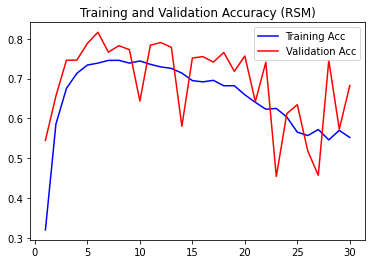

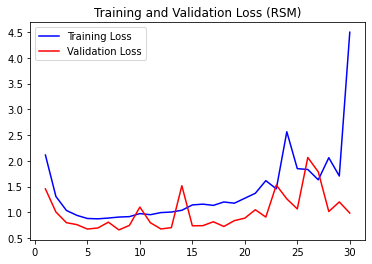

<Figure size 432x288 with 0 Axes>

In [42]:
# ----------------------------------------------
# Visualizing Train/Validation Loss & Accuracy |
# ---------------------------------------------

acc_rsm = history_rsm.history['acc']
val_acc_rsm = history_rsm.history['val_acc']
loss_rsm = history_rsm.history['loss']
val_loss_rsm = history_rsm.history['val_loss']

epochs_rsm = range(1,len(acc_rsm) +1)

# Plot of accuracy
plt.plot(epochs_rsm, acc_rsm, color='blue', label='Training Acc')
plt.plot(epochs_rsm, val_acc_rsm, color='red', label='Validation Acc')
plt.title('Training and Validation Accuracy (RSM)')
plt.legend()

plt.figure()

# Plot of loss
plt.plot(epochs_rsm, loss_rsm, color='blue', label='Training Loss')
plt.plot(epochs_rsm, val_loss_rsm, color='red', label='Validation Loss')
plt.title('Training and Validation Loss (RSM)')
plt.legend()
plt.figure()

plt.show()

In [43]:
# ------------------
# Confusion Matrix |
# -----------------

num_of_train_samples = 13292
#num_of_test_samples = 416 # steps per epoch
batch_size=32
steps_per_epoch=num_of_train_samples // batch_size
#validation_generator.reset()

Y_pred = model3.predict_generator(validation_generator, steps_per_epoch)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix for Model with RSM')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix for Model with RSM
[[ 76   4   0   1 115   0   0   0   0   1   3   1]
 [  0 164   4   0   3   0  16   1   0   8   4   1]
 [  0  10  89   1   2   0  25   0   0  67   1   5]
 [  0   8   0 170   1   0   6   0   2  12   1   1]
 [  3  15   2   2 171   0   0   0   0   3   3   2]
 [  2   6   1   1   7 178   0   0   1   1   4   0]
 [  0  75   0   1   1   0 125   0   0   6   0   1]
 [  0  23   8  47   1   0  28  59  19  12   3   1]
 [  0   4   2   3   1   0   3   2 175   9   0   2]
 [  0   5   1   1   3   0   7   0   0 179   1   4]
 [  0  12   0   0   3   0   5   0   0   4 177   0]
 [  0   0   0   2   0   0   3   1   0 109   0  85]]


In [44]:
# -----------------------
# Classification Report |
# ----------------------

print('Classification Report for Model with RSM')
target_names = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report for Model with RSM
                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.94      0.38      0.54       201
            bart_simpson       0.50      0.82      0.62       201
charles_montgomery_burns       0.83      0.45      0.58       200
            chief_wiggum       0.74      0.85      0.79       201
           homer_simpson       0.56      0.85      0.67       201
        krusty_the_clown       1.00      0.89      0.94       201
            lisa_simpson       0.57      0.60      0.59       209
           marge_simpson       0.94      0.29      0.45       201
     milhouse_van_houten       0.89      0.87      0.88       201
             moe_szyslak       0.44      0.89      0.58       201
            ned_flanders       0.90      0.88      0.89       201
       principal_skinner       0.83      0.42      0.56       200

                accuracy                           0.68      2418
               macro avg       0.

76/76 [==============================] - 6s 78ms/step


0.8263361716540811

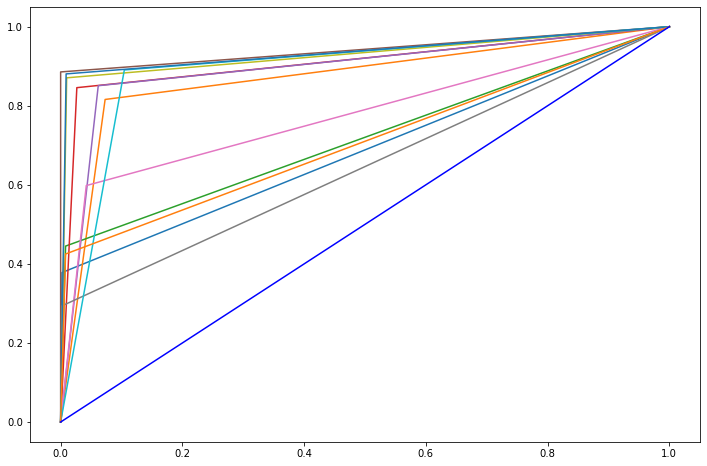

In [45]:
# ---------------
# ROC/AUC Score |
# --------------

from sklearn.preprocessing import LabelBinarizer

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names): # target_names: no of the labels
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

validation_generator.reset() # resetting generator
y_pred = model3.predict_generator(validation_generator, verbose = True)
y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(validation_generator.classes, y_pred)

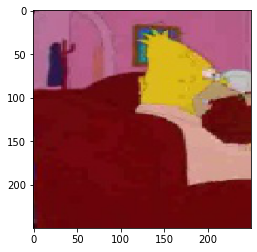

Actual value:  0 	Predicted value:  0


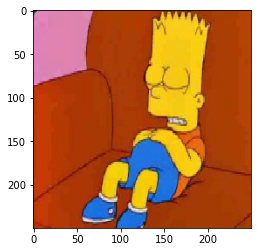

Actual value:  1 	Predicted value:  1


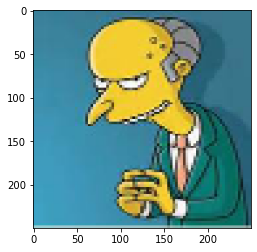

Actual value:  2 	Predicted value:  2


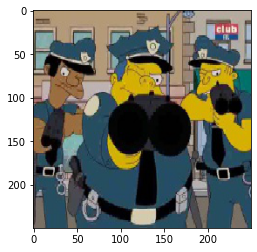

Actual value:  3 	Predicted value:  3


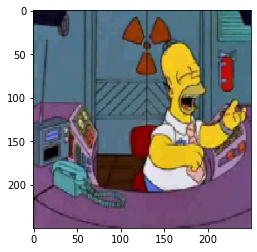

Actual value:  4 	Predicted value:  4


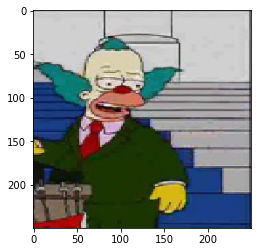

Actual value:  5 	Predicted value:  5


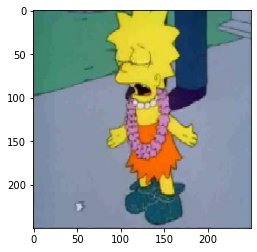

Actual value:  6 	Predicted value:  1


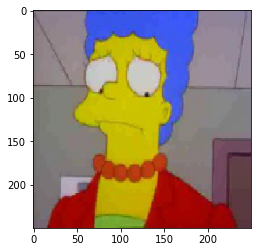

Actual value:  7 	Predicted value:  6


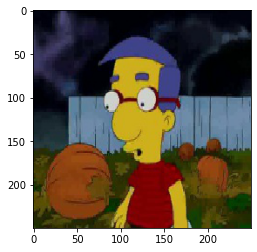

Actual value:  8 	Predicted value:  8


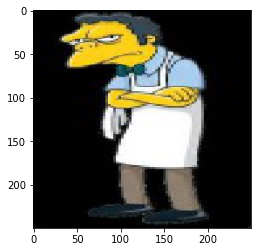

Actual value:  9 	Predicted value:  9


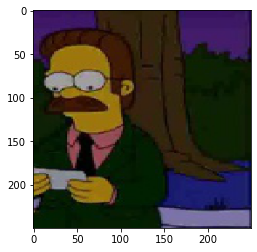

Actual value:  10 	Predicted value:  4


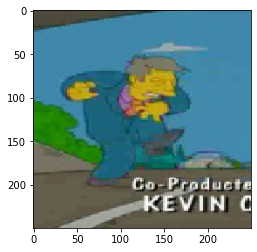

Actual value:  11 	Predicted value:  9
Total number of images for "testing":
Found 594 images belonging to 12 classes.


In [46]:
# ------------------------------------------
# Displaying 12 Images with the Prediction |
# -----------------------------------------

# 1 image from each class

labels = ['abraham_grampa_simpson', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson',
          'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak',
          'ned_flanders', 'principal_skinner']

i=0
for names in labels:
    pathToFolder = test_dir +'/'+names+'/'
    fnames = [os.path.join(pathToFolder, fname) for
          fname in os.listdir(pathToFolder)]
    
    # generate random number btwn (0,30)
    randNum = random.randint(0, 30)
    img_path = fnames[randNum]
    tmp_img = image.load_img(img_path, target_size = (250, 250))
    tmp_img = image.img_to_array(tmp_img)
    tmp_img = np.expand_dims(tmp_img, axis = 0)
    
    tmp_img /=255.
    plt.imshow(tmp_img[0])
    plt.show()
    # predict 
    result = model3.predict(tmp_img)
    train_generator.class_indices
    print('Actual value: ',i,'\tPredicted value: ', np.argmax(result))
    i+=1

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (250, 250),
                                                  batch_size = 32,
                                                  class_mode = "categorical",
                                                  shuffle=False)

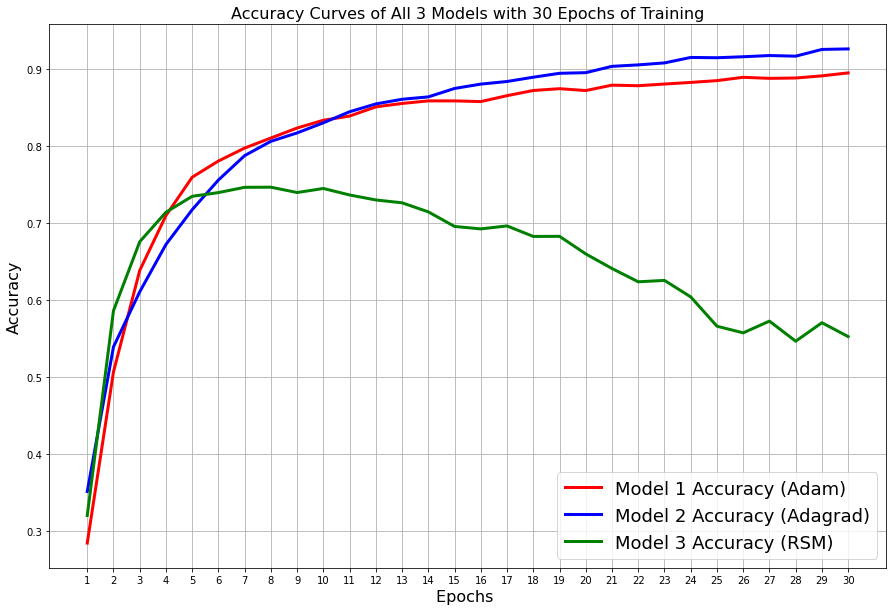

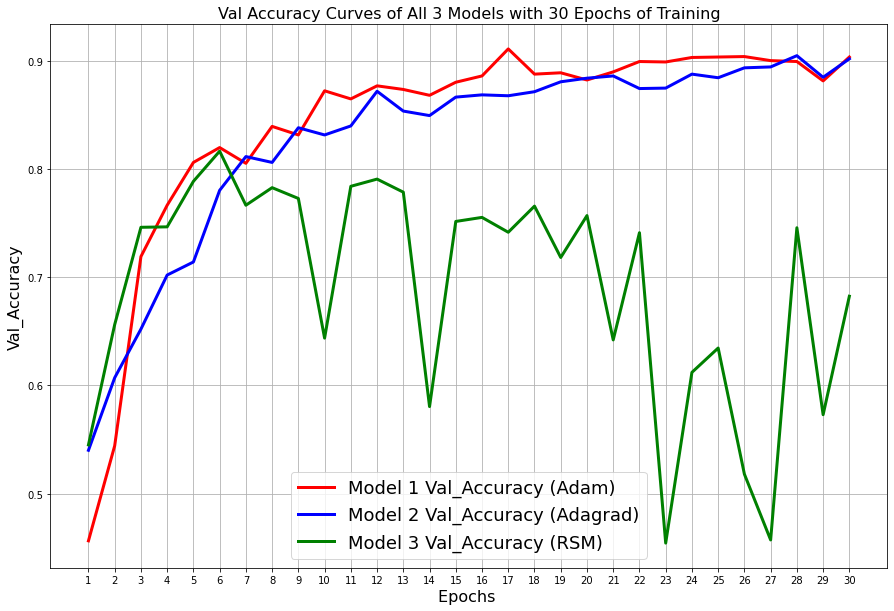

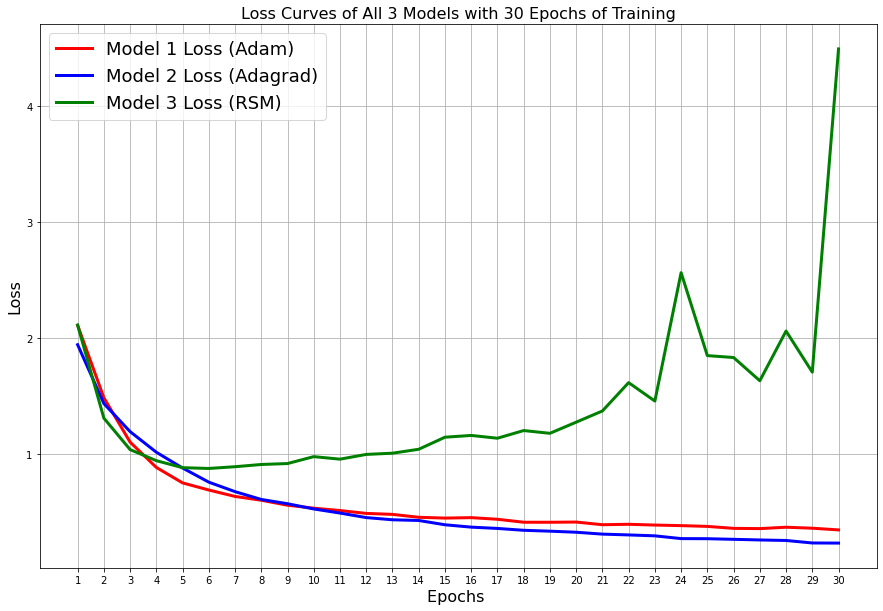

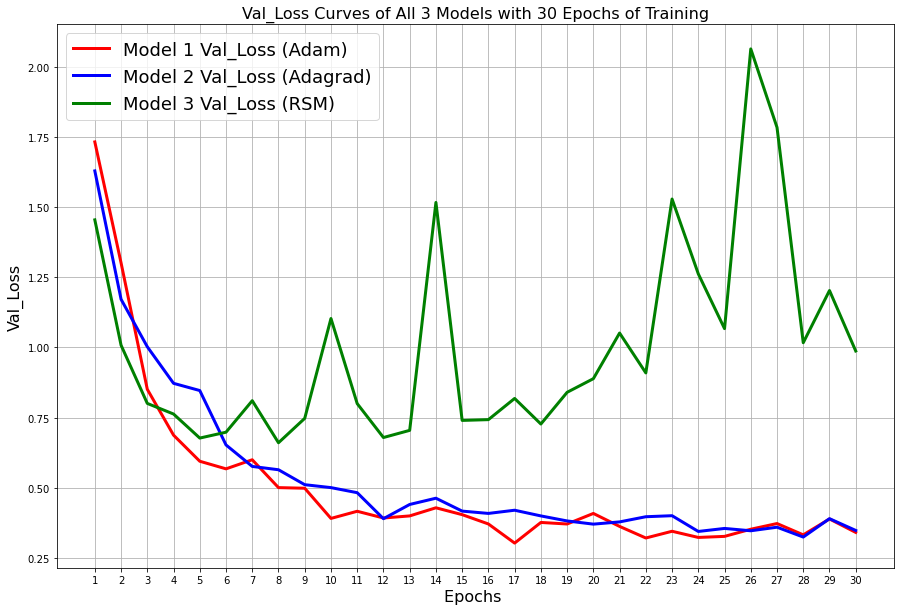

In [47]:
# ---------------------------------
# Plotting Score for All 3 Models |
# --------------------------------

# Plotting all 3 models accuracy scores
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['acc'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['acc'],'b',linewidth=3.0)
plt.plot(history_rsm.history['acc'],'g',linewidth=3.0)
plt.legend(['Model 1 Accuracy (Adam)', 'Model 2 Accuracy (Adagrad)', 'Model 3 Accuracy (RSM)'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

# Plotting all 3 models val accuracy scores
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['val_acc'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['val_acc'],'b',linewidth=3.0)
plt.plot(history_rsm.history['val_acc'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Accuracy (Adam)', 'Model 2 Val_Accuracy (Adagrad)', 'Model 3 Val_Accuracy (RSM)'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Val_Accuracy',fontsize=16)
plt.title('Val Accuracy Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

# Plotting all 3 models training losses
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['loss'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['loss'],'b',linewidth=3.0)
plt.plot(history_rsm.history['loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Loss (Adam)', 'Model 2 Loss (Adagrad)', 'Model 3 Loss (RSM)'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

# Plotting Val Loss Curves for all 3 Models
plt.figure(figsize=[15,10])
plt.plot(history_adam.history['val_loss'], 'r', linewidth=3.0)
plt.plot(history_adagrad.history['val_loss'],'b',linewidth=3.0)
plt.plot(history_rsm.history['val_loss'],'g',linewidth=3.0)
plt.legend(['Model 1 Val_Loss (Adam)', 'Model 2 Val_Loss (Adagrad)', 'Model 3 Val_Loss (RSM)'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,30)],[i for i in range(1,31)])
plt.ylabel('Val_Loss',fontsize=16)
plt.title('Val_Loss Curves of All 3 Models with 30 Epochs of Training',fontsize=16)
plt.grid()

In [ ]:
'''
d) Display some channels in every intermediate activations and explain why this is useful.
'''

In [48]:
# --------------------------
# PROCESSING A SINGLE IMAGE |
# --------------------------

img_path = './Downloads/simpsons_dataset_small2/test/abraham_grampa_simpson/abraham_grampa_simpson_17.jpg'

img = image.load_img(img_path, target_size=(250, 250))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # the model was trained on inputs that were preprocessed this way

print(img_tensor.shape)

(1, 250, 250, 3)


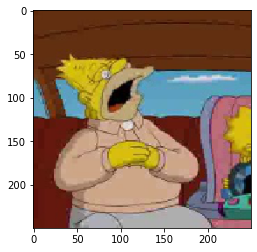

In [49]:
# ----------------------------
# DISPLAYING THE TEST PICTURE |
# ----------------------------

plt.imshow(img_tensor[0])
plt.show()

In [50]:
# ------------------------------------------------------------------------
# Instantiaing a Model from an Input Tensor and a List of Output Tensors |
# -----------------------------------------------------------------------

# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [51]:
# ------------------------------------
# Running the Model in Predict Model |
# -----------------------------------

# returns a lsit of 5 numpy arrays: 1 array per layer activations
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 248, 248, 32)


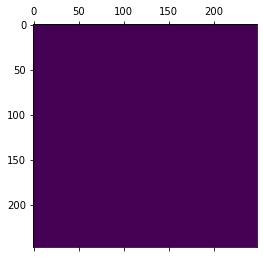

In [52]:
# --------------------------------
# Visualizing the fourth channel |
# -------------------------------

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

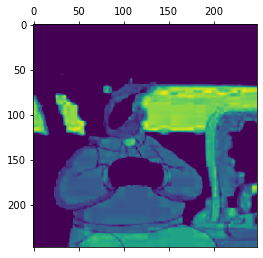

In [53]:
# ---------------------------------
# Visualizing the seventh channel |
# --------------------------------

plt.matshow(first_layer_activation [0, :, :, 7], cmap='viridis')

In [ ]:
# ----------------------------
# EXPLAIN WHY THIS IS USEFUL |
# ---------------------------

#"Intermediate activations are useful for understanding how successive
# convnet layers transform their input, and for getting a first idea of the
# meaning of indivisual convnet filters.
# Visualizing intermediate ativations consists of displaying th feature maps
# that are output by various convolution and pooling layers in a network, 
# given a certain output. This gives a view into how an input is decomposed
# into different filters learned by the network. Each channel encodes
# relatively independent features, so the proper way to visualize these
# feature maps is by indepently plotting the conetnes of every channel as a
# 2D image" - Francois Chollet "DEEP LEARNING with Python"

In [54]:
# --------------------------------------
# Visualizing Intermidiate Activations |
# -------------------------------------

# get the image from the test set

img_path = "./Downloads/simpsons_dataset_small2/test/abraham_grampa_simpson/abraham_grampa_simpson_43.jpg"

import numpy as np
img1 = image.load_img(img_path, target_size = (250, 250))
img_tensor = image.img_to_array(img1)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print("Image tensor shape: ", img_tensor.shape)

Image tensor shape:  (1, 250, 250, 3)


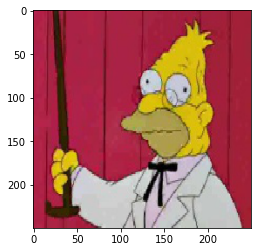

In [55]:
# display the test image

plt.imshow(img_tensor[0])
plt.show()

In [56]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor) #returns a list of five numpy arrays

n_col: 2
n_col: 2


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


n_col: 2
n_col: 4
n_col: 4
n_col: 8
n_col: 8
n_col: 8


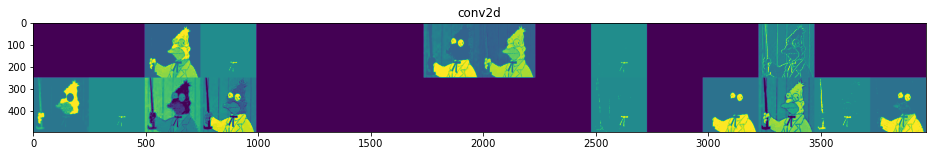

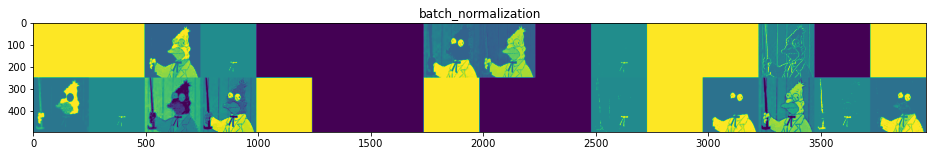

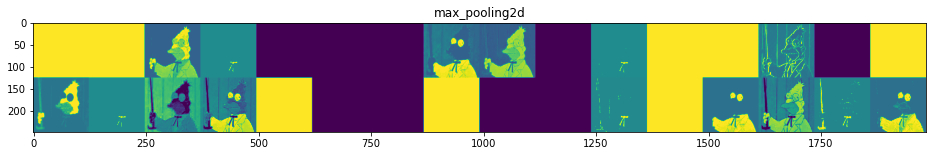

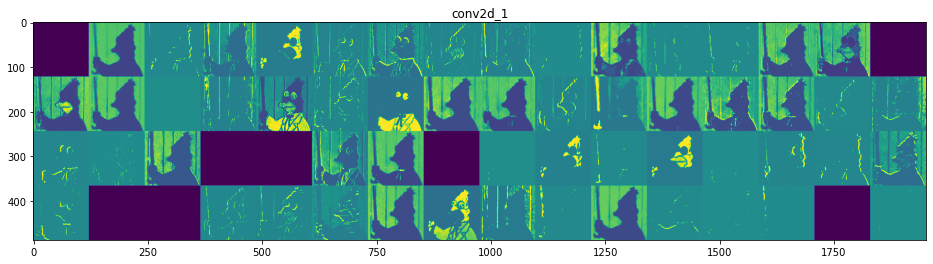

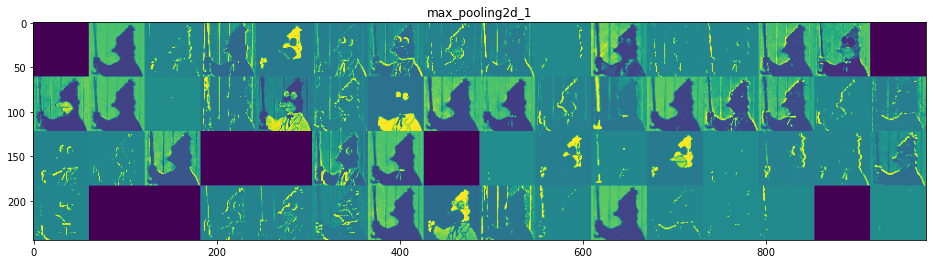

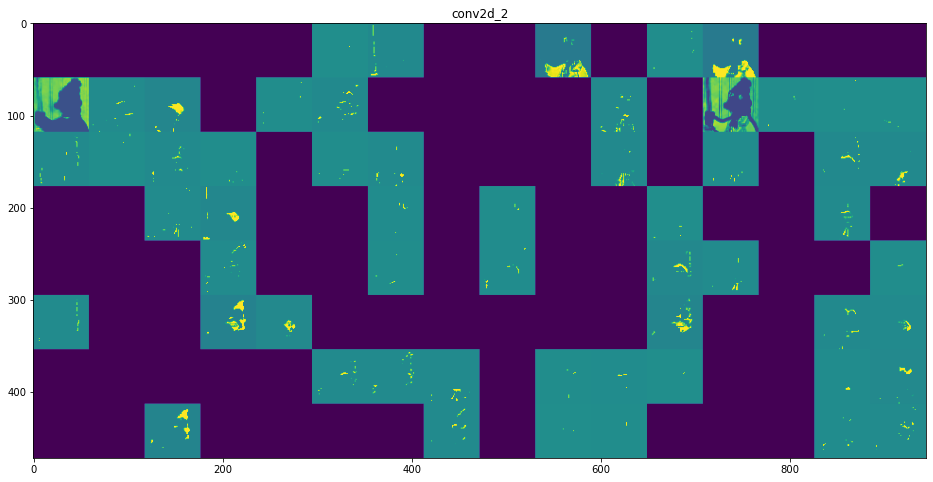

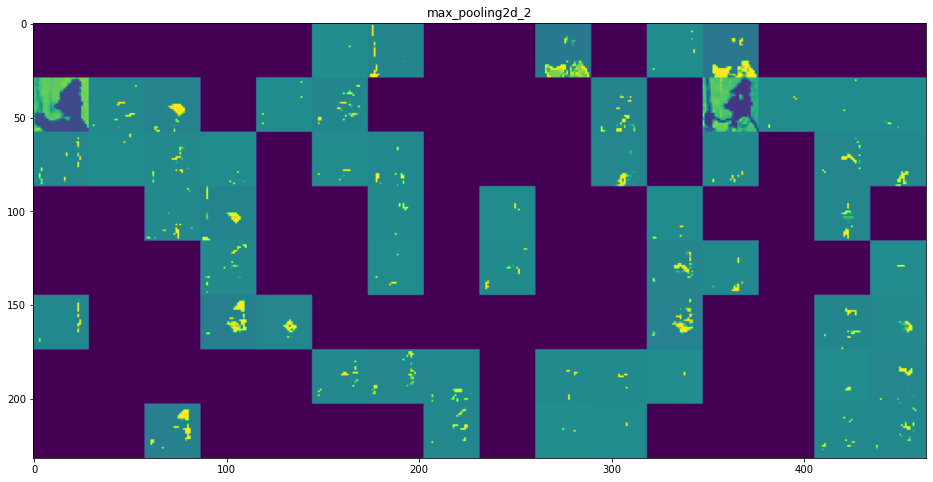

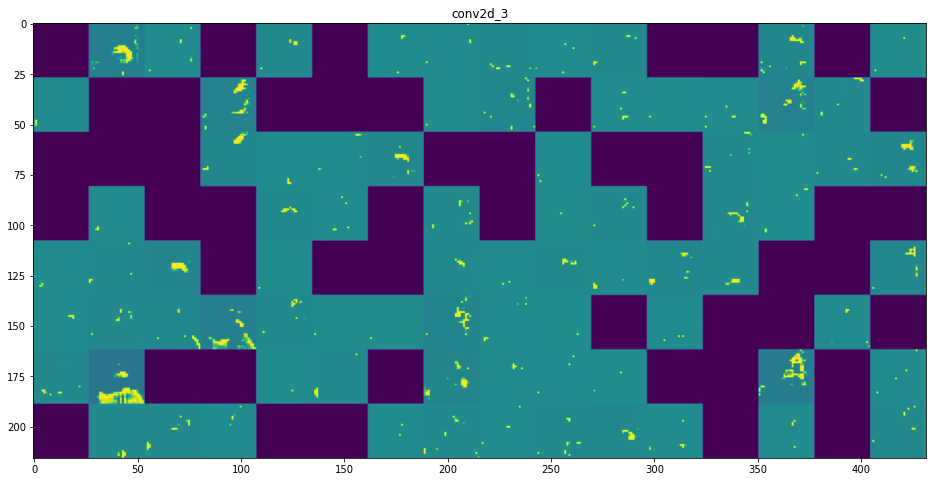

In [57]:
# name of the layers

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
   

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
   
    size = layer_activation.shape[1]
    size2 = layer_activation.shape[2]
    n_cols = n_features // images_per_row
   
    display_grid = np.zeros((size * n_cols, images_per_row * size2))
    print("n_col:", n_cols)
   
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
           # print("col: ", col)
            #print("row: ", row)
            #print("size: ", size)
            display_grid[col * size : (col+1) * size,
                         row * size2 : (row + 1) * size2] = channel_image
           
    scale = 1./ size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [58]:
'''
e) Visualize (display) convolutional filters: get the gradient of the loss with regard to 
the input, apply stochastic gradient edscent, include a code for filter visualizations and 
generate a grid of some filter response patterns in a layer.
'''

'\ne) Visualize (display) convolutional filters: get the gradient of the loss with regard to \nthe input, apply stochastic gradient edscent, include a code for filter visualizations and \ngenerate a grid of some filter response patterns in a layer.\n'

In [59]:
# ----------------------------------------------------
# DEFINING THE LOSS TENSOR FOR FILTER VISUALATIZATION |
# ----------------------------------------------------

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [60]:
# ------------------------------------------------------------
# OBTAINING THE GRADIENT OF THE LOSS WITH REGARD TO THE INPUT |
# ------------------------------------------------------------

grads = K.gradients(loss, model.input)[0]  
# the call to gradients returns a list of tensors (of size 1 in this case)
# keeps only the 1st elements which is a tensor

In [61]:
# -----------------------------
# GRADIENT-NORMALIZATION TRICK |
# -----------------------------

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
# add 1e-5 before dividing to avoid accidentally dividing by 0

In [62]:
# ------------------------------------------------------
# FETCHING NUMPY OUTPUT VALUES GIVEN NUMPY INPUT VALUES |
# ------------------------------------------------------

iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 250, 250, 3))])

In [63]:
# --------------------------------------------------
# LOSS MAXIMIZATION VIA STOCHASTIC GRADIENT DESCENT |
# --------------------------------------------------

input_img_data = np.random.random((1, 250, 250, 3)) * 20 + 128.
# starts from a grey image with some noise

step = 1.  # magnitude of each gradient update
for i in range(40):  # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])
    # computes the loss value and gradient value
    
    input_img_data += grads_value * step
    # adjusts the input image in the direction that maximizes the loss

In [64]:
# --------------------------------------------------------
# UTILITY FUNCTION TO CONVERT A TENSOR INTO A VALID IMAGE |
# --------------------------------------------------------

def deprocess_image(x):
    # Normalizes the tensorL centers on 0, ensure that std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # Clips to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # Converts to an RBG array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

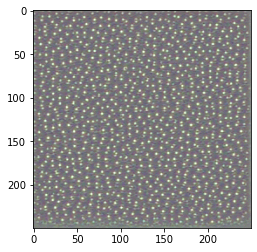

In [65]:
# -------------------------------------------
# FUNCTION TO GENERATE FILTER VISUALIZATIONS |
# -------------------------------------------

def generate_pattern(layer_name, filter_index, size=250):
    # Builds a loss function that maximizes that activation of the nth
    # filter of the layer under consideration
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Computes the gradient of the input picture with regard to this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalization trickL normalizes the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # Returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # Starts from a grey image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    # Runs gradient ascent for 30 steps
    step = 1.
    for i in range(30):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

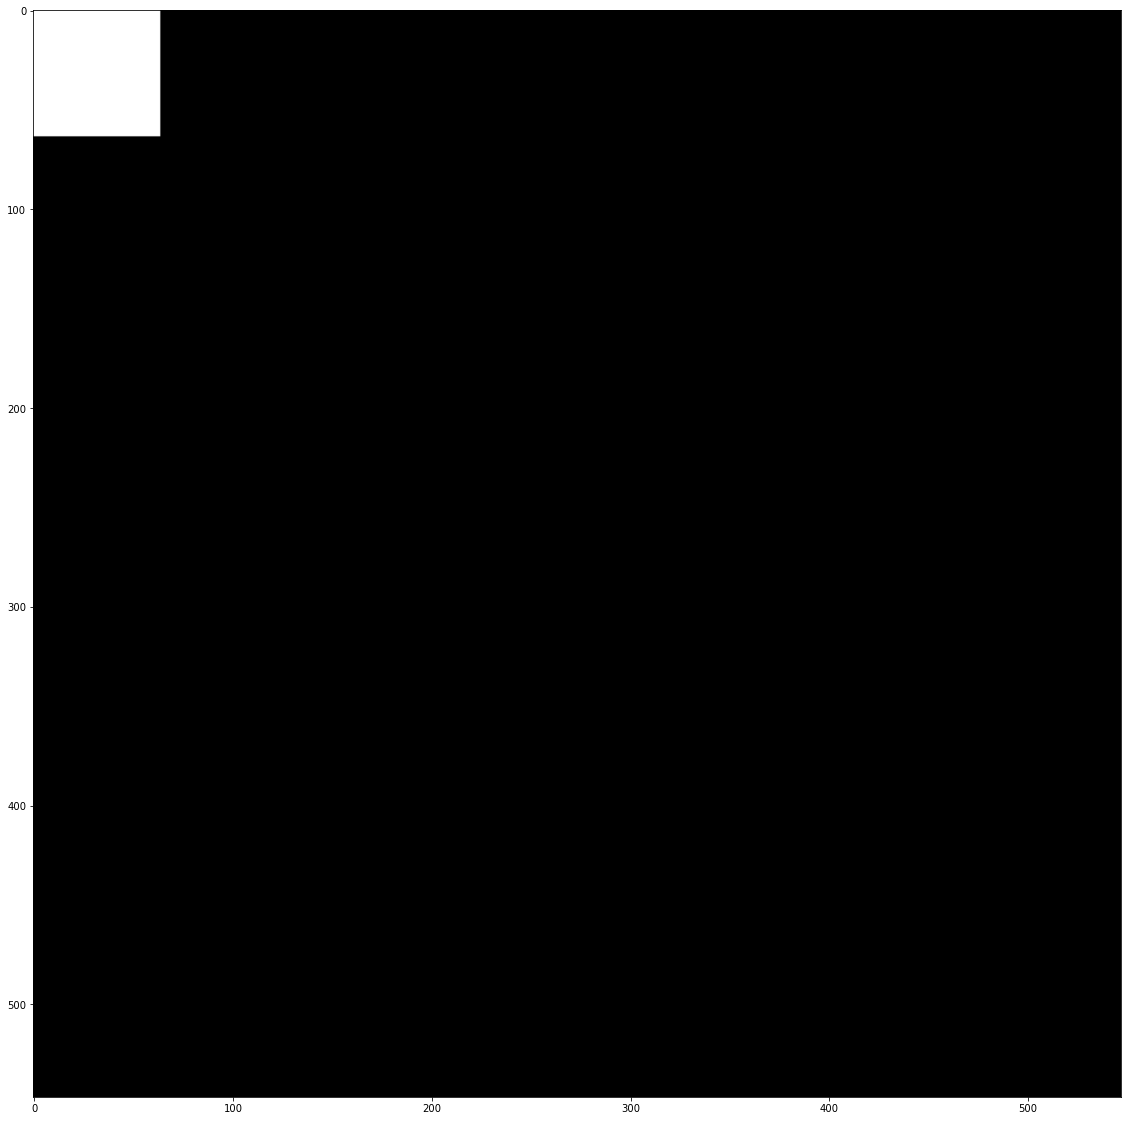

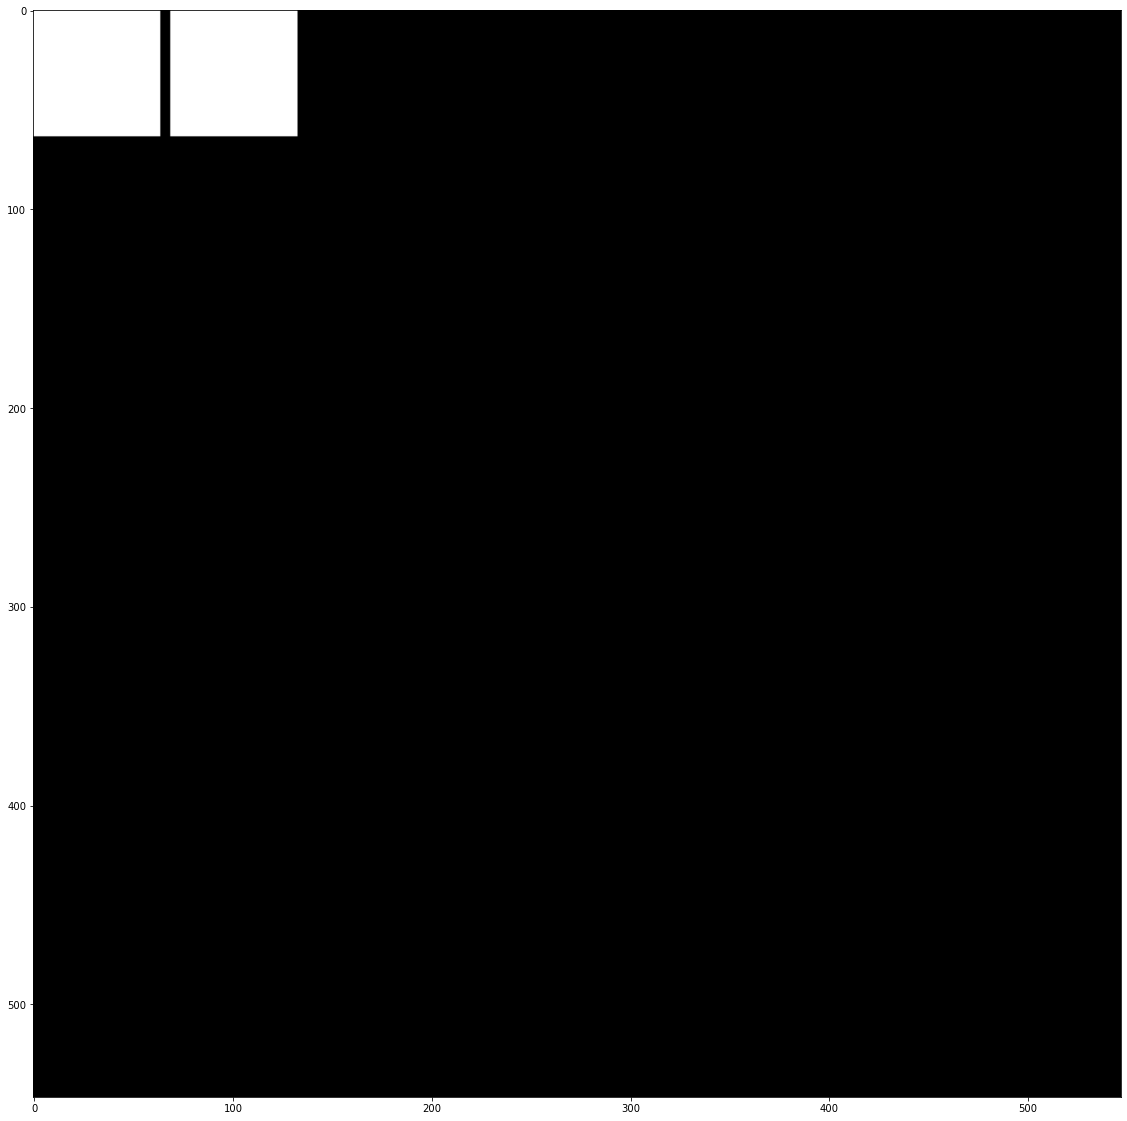

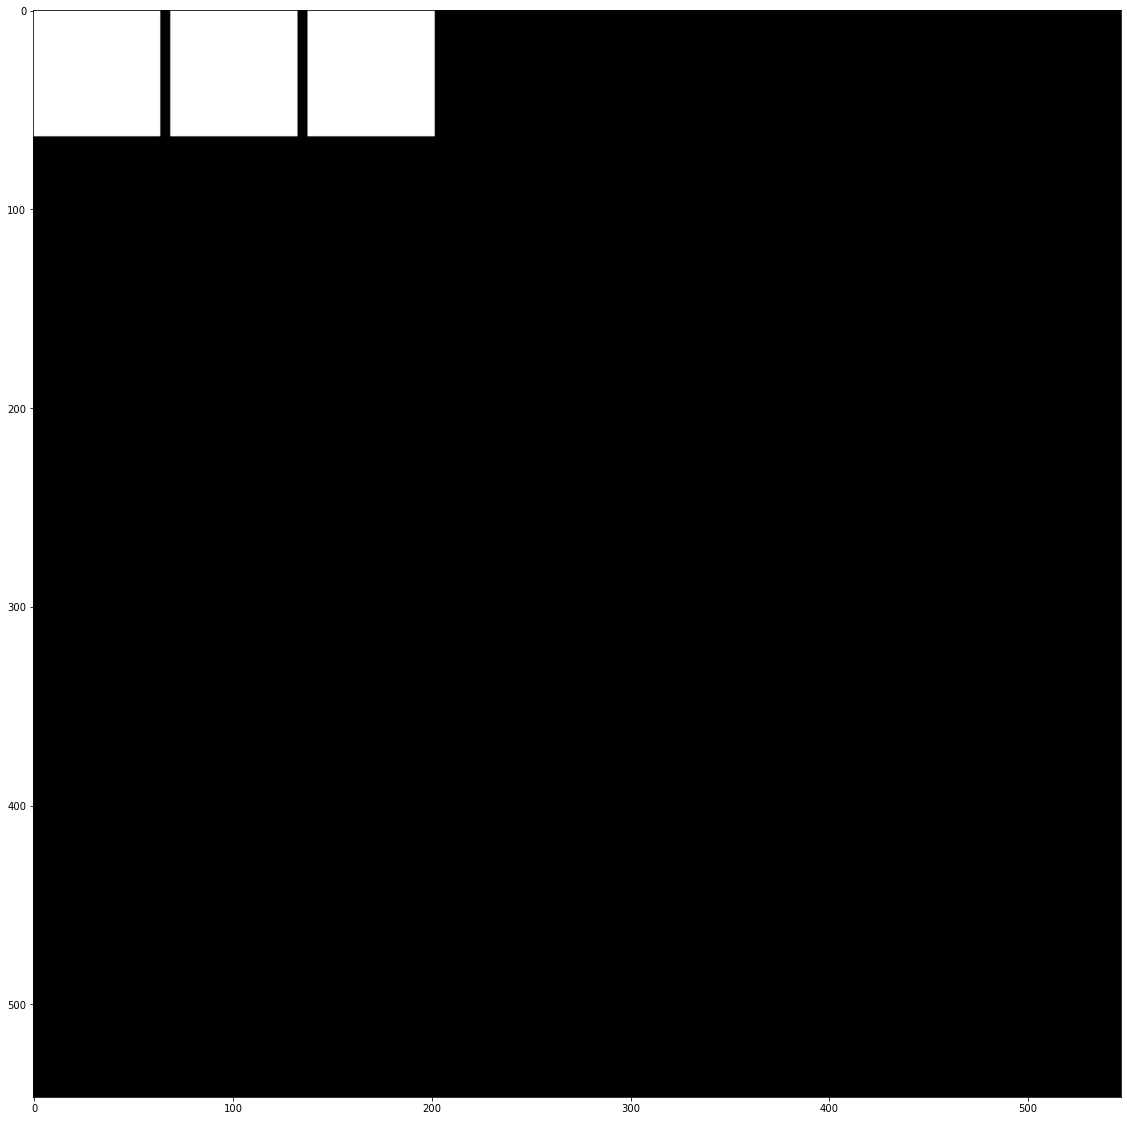

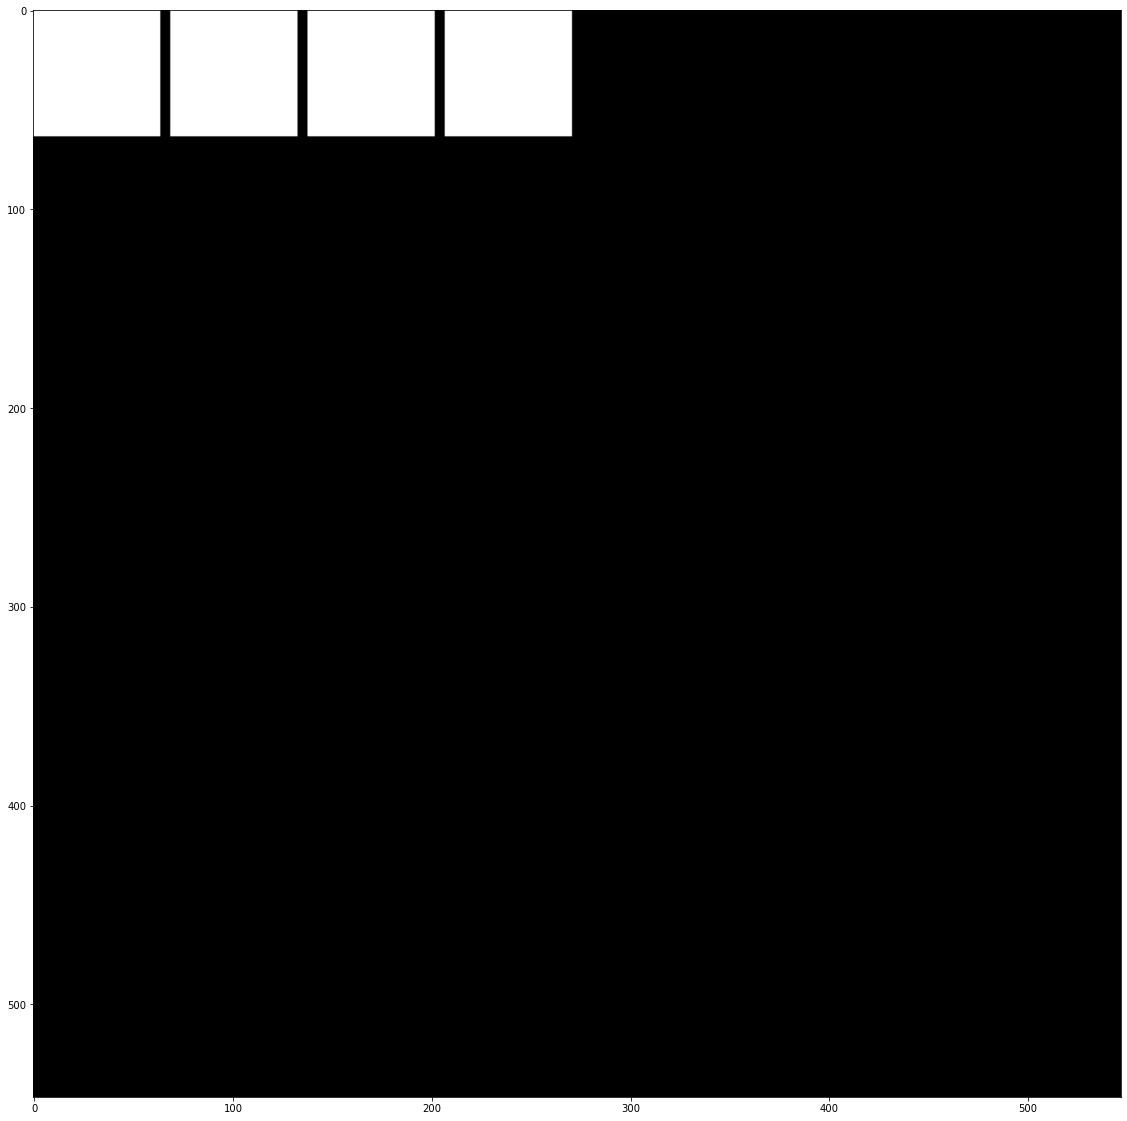

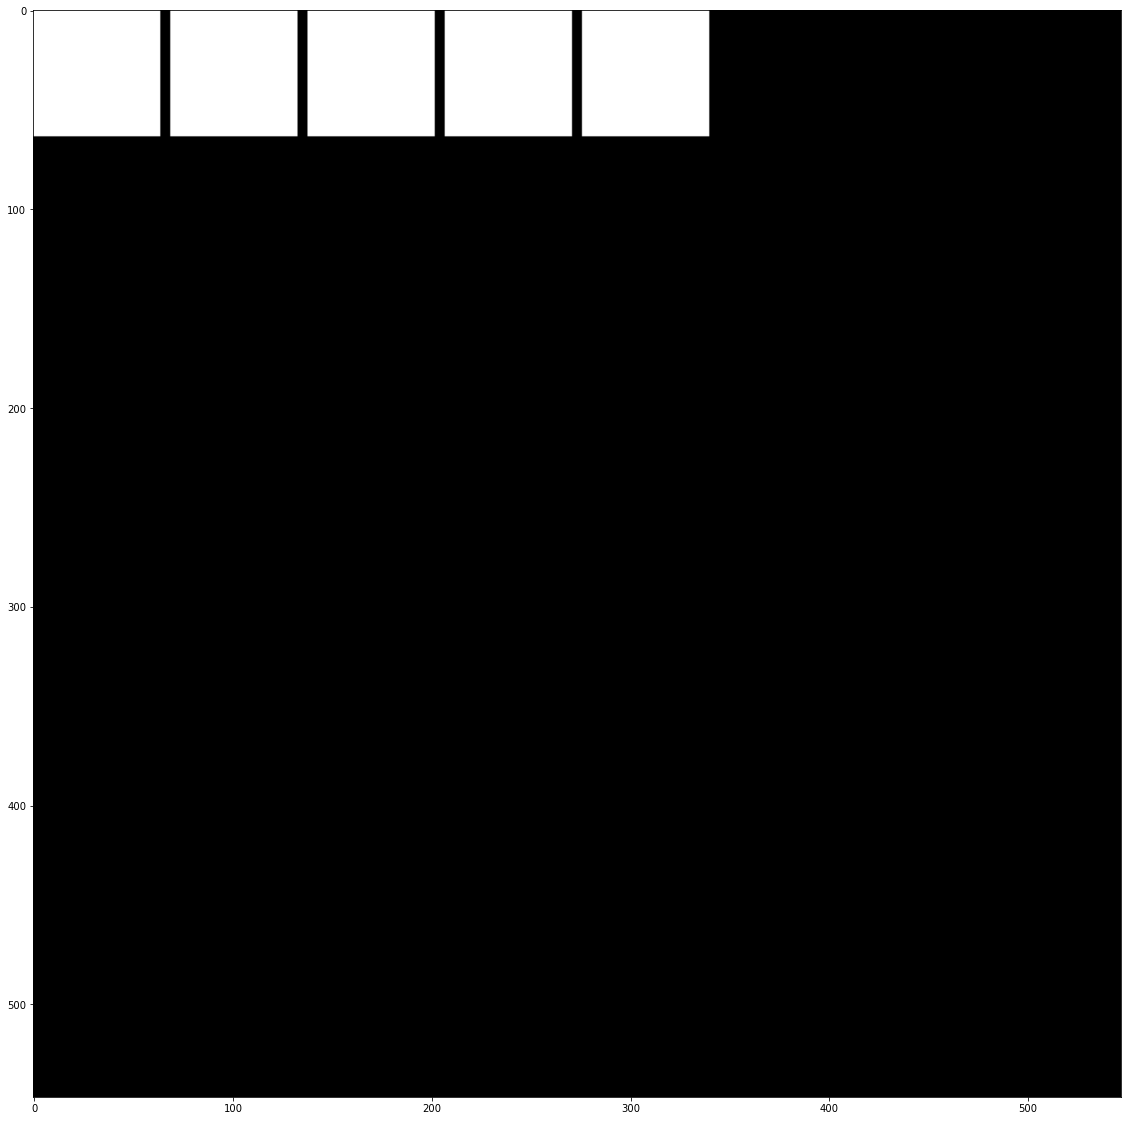

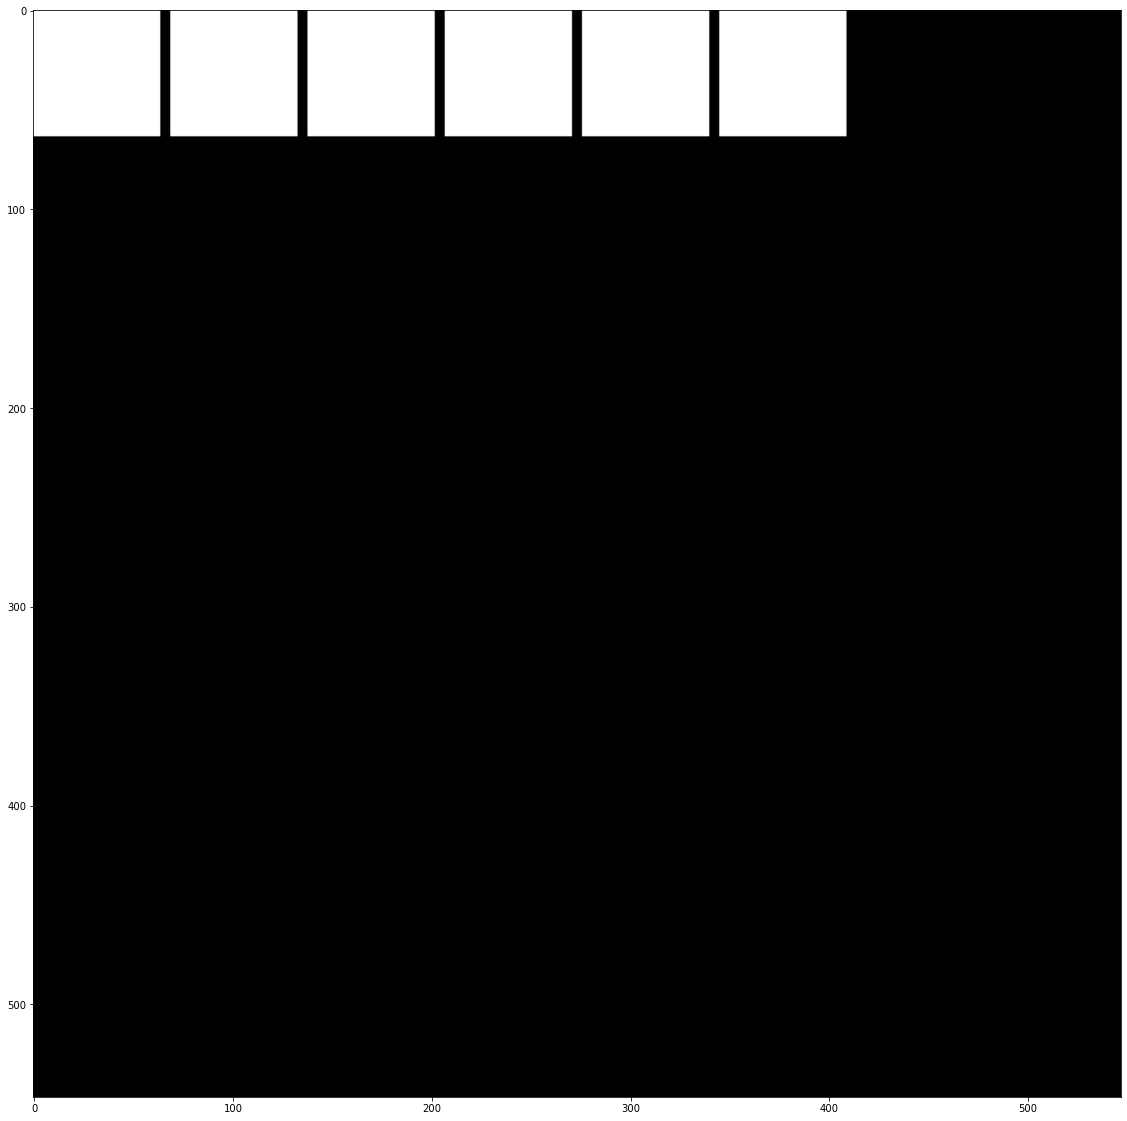

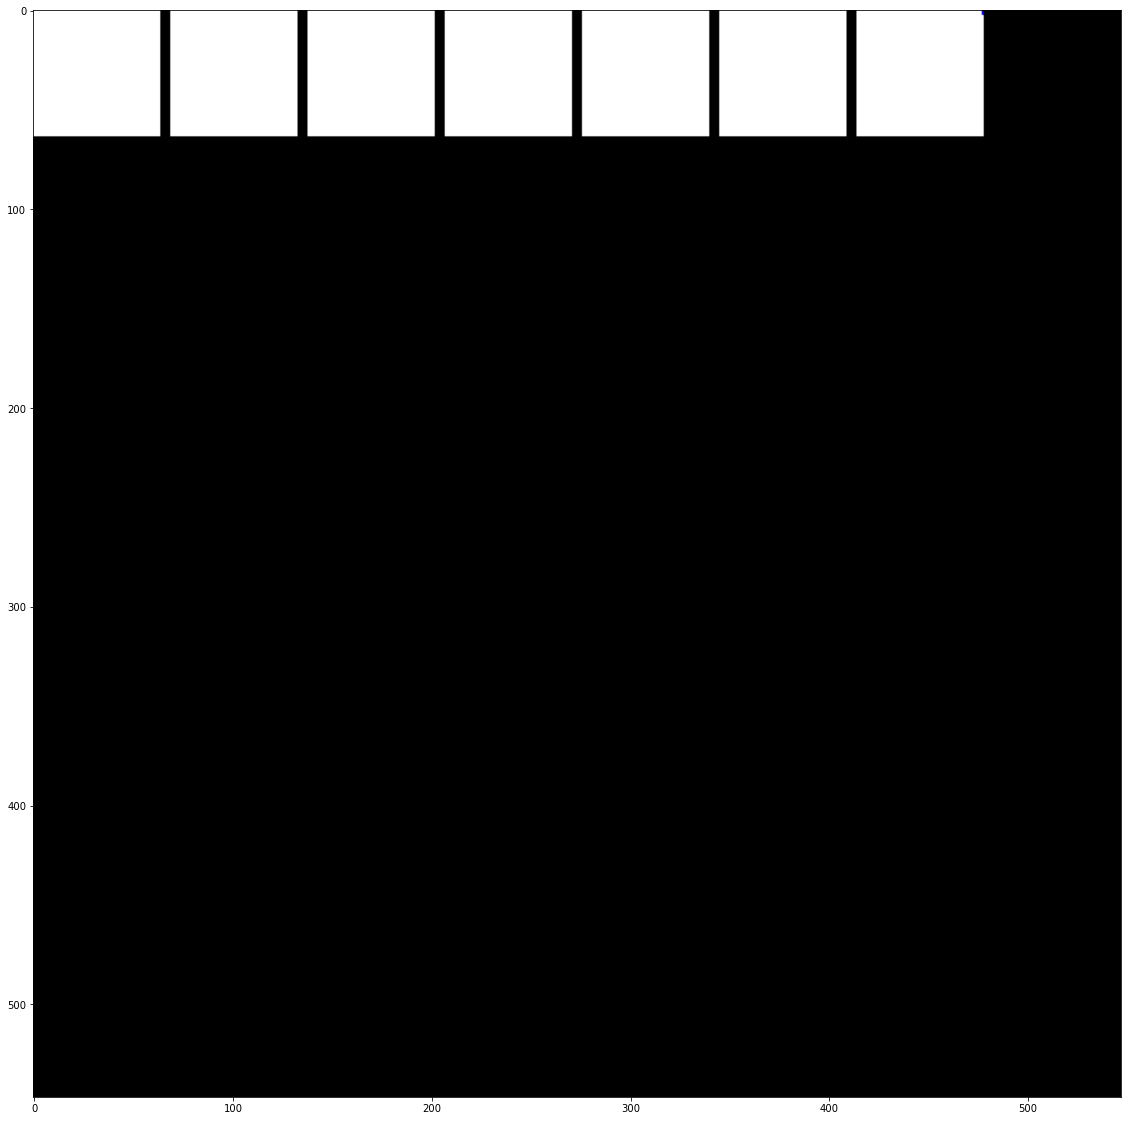

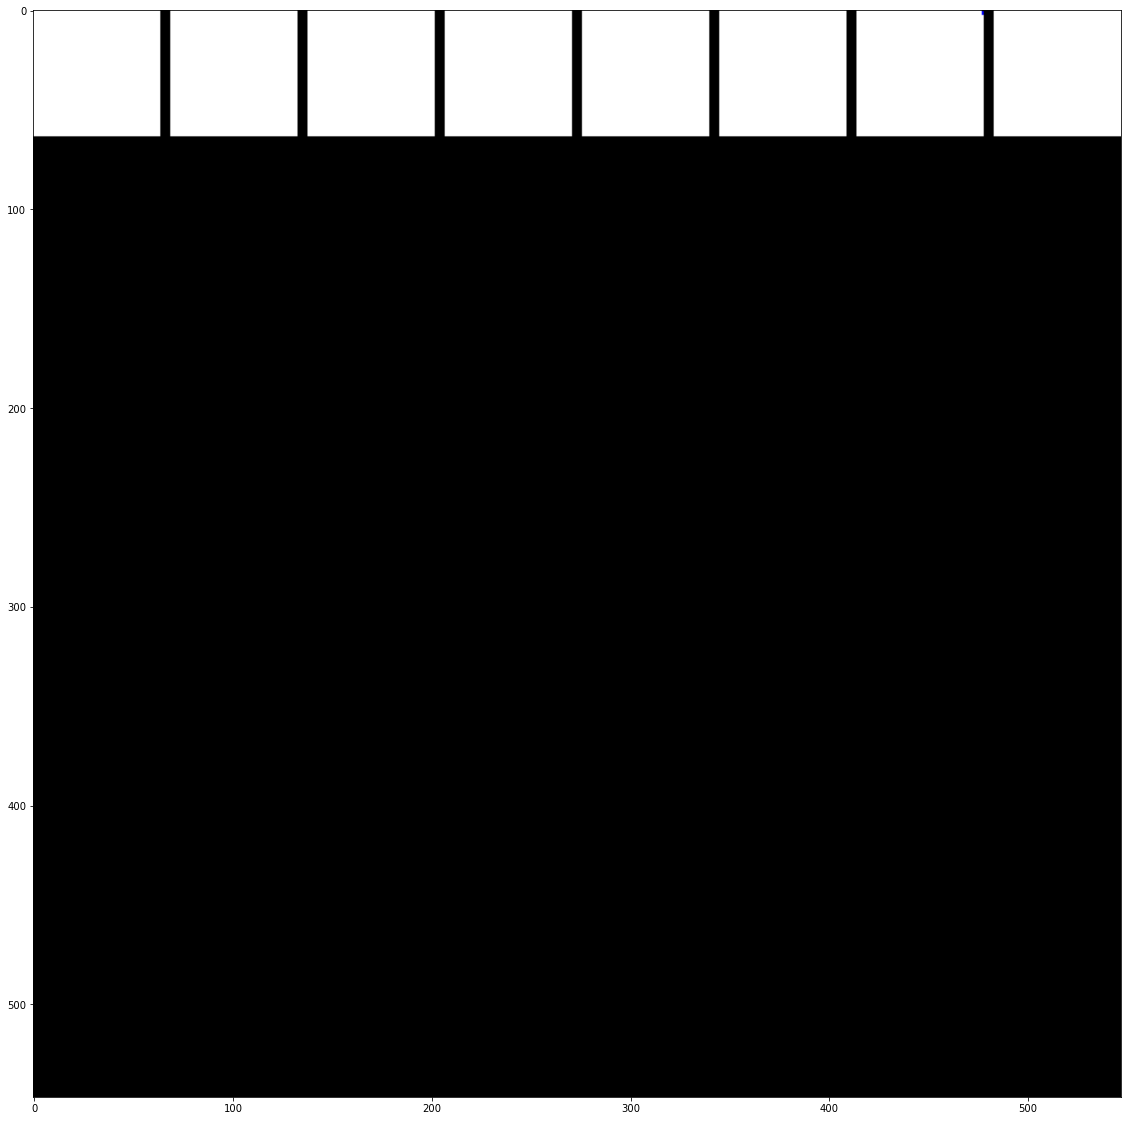

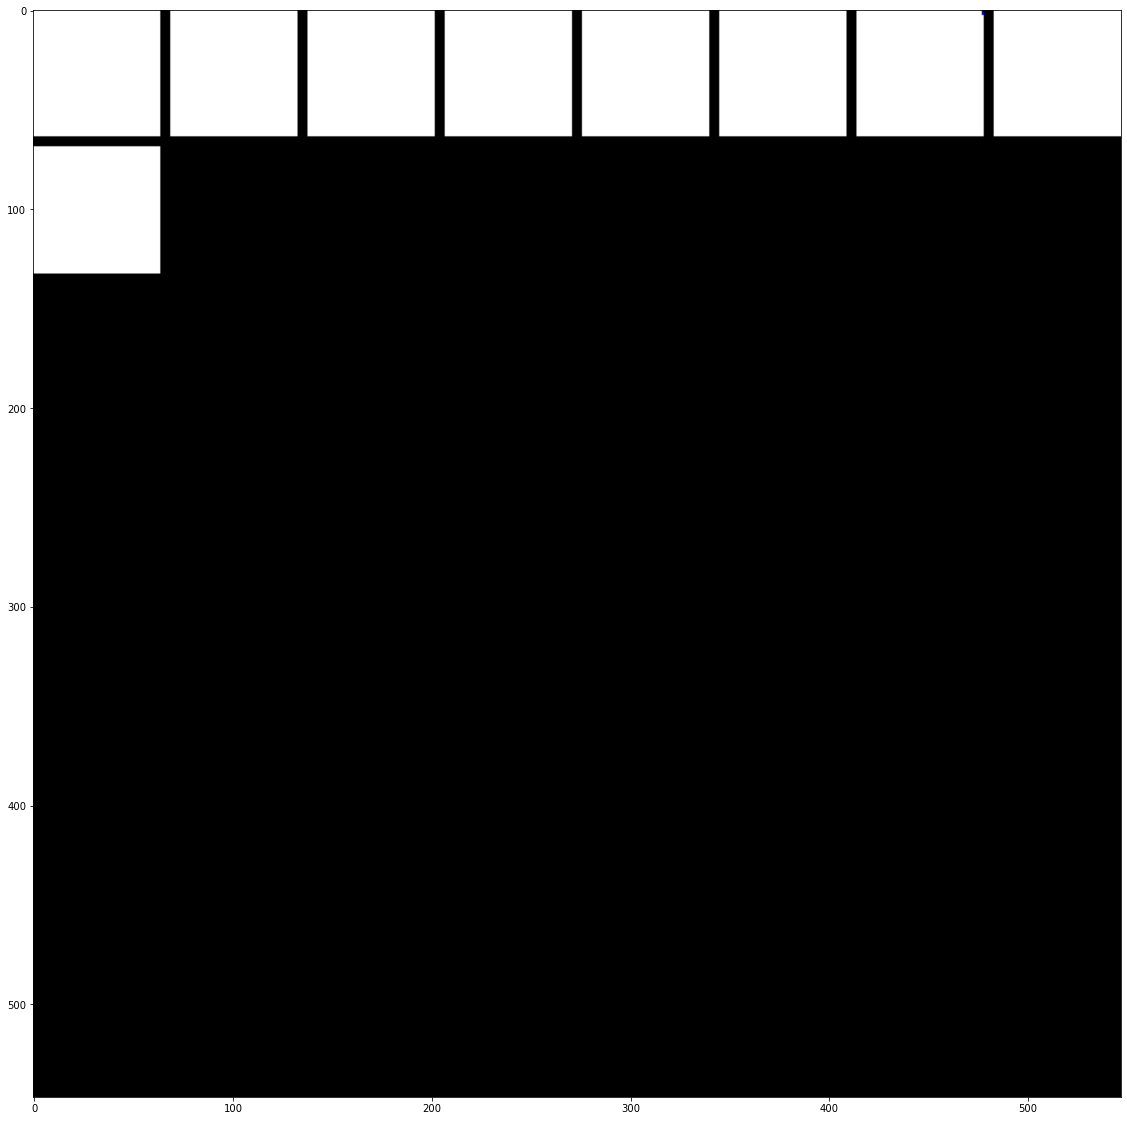

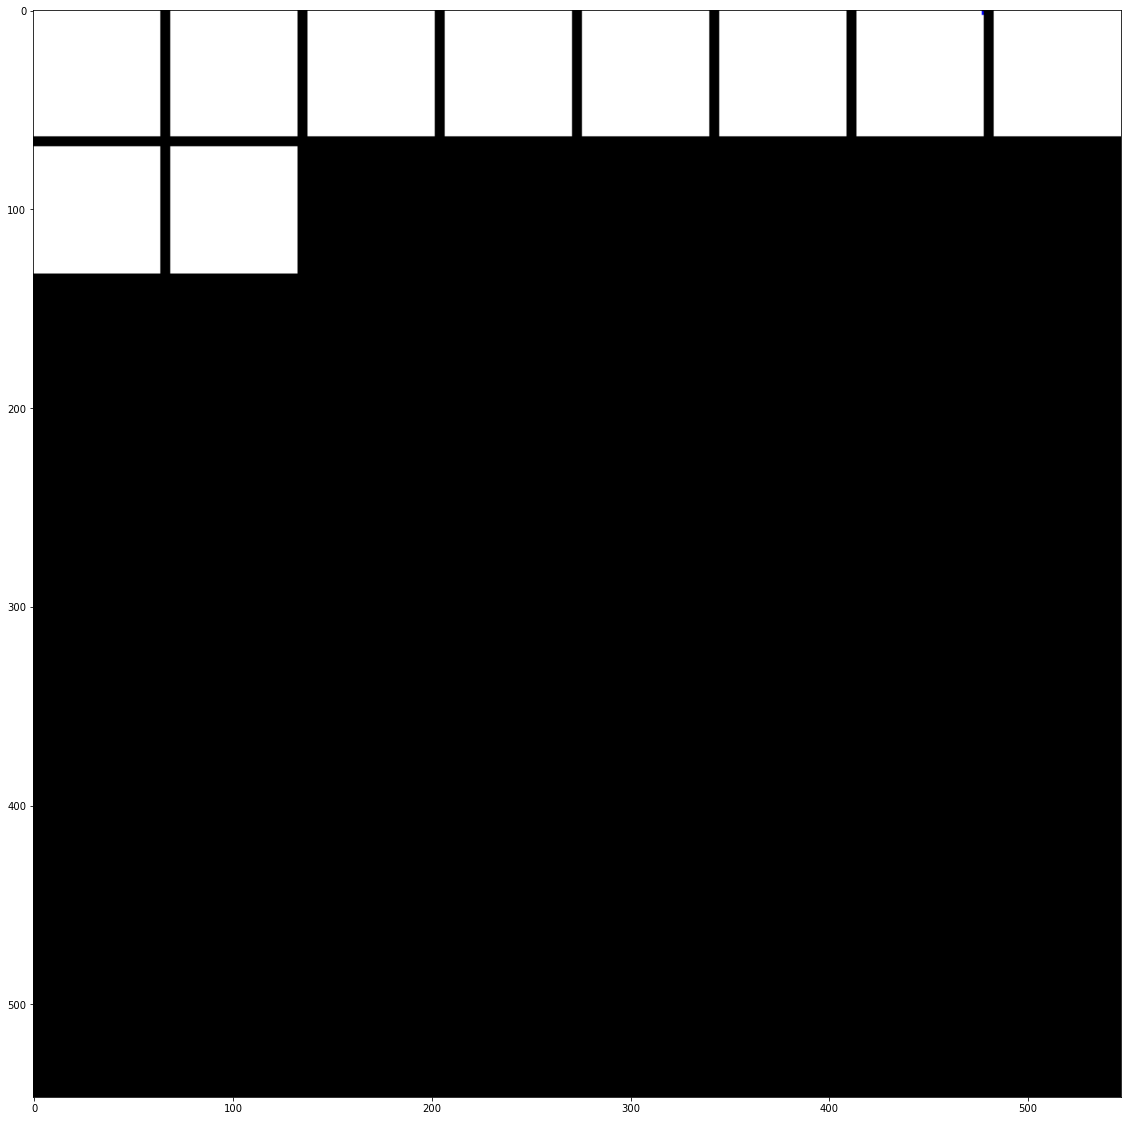

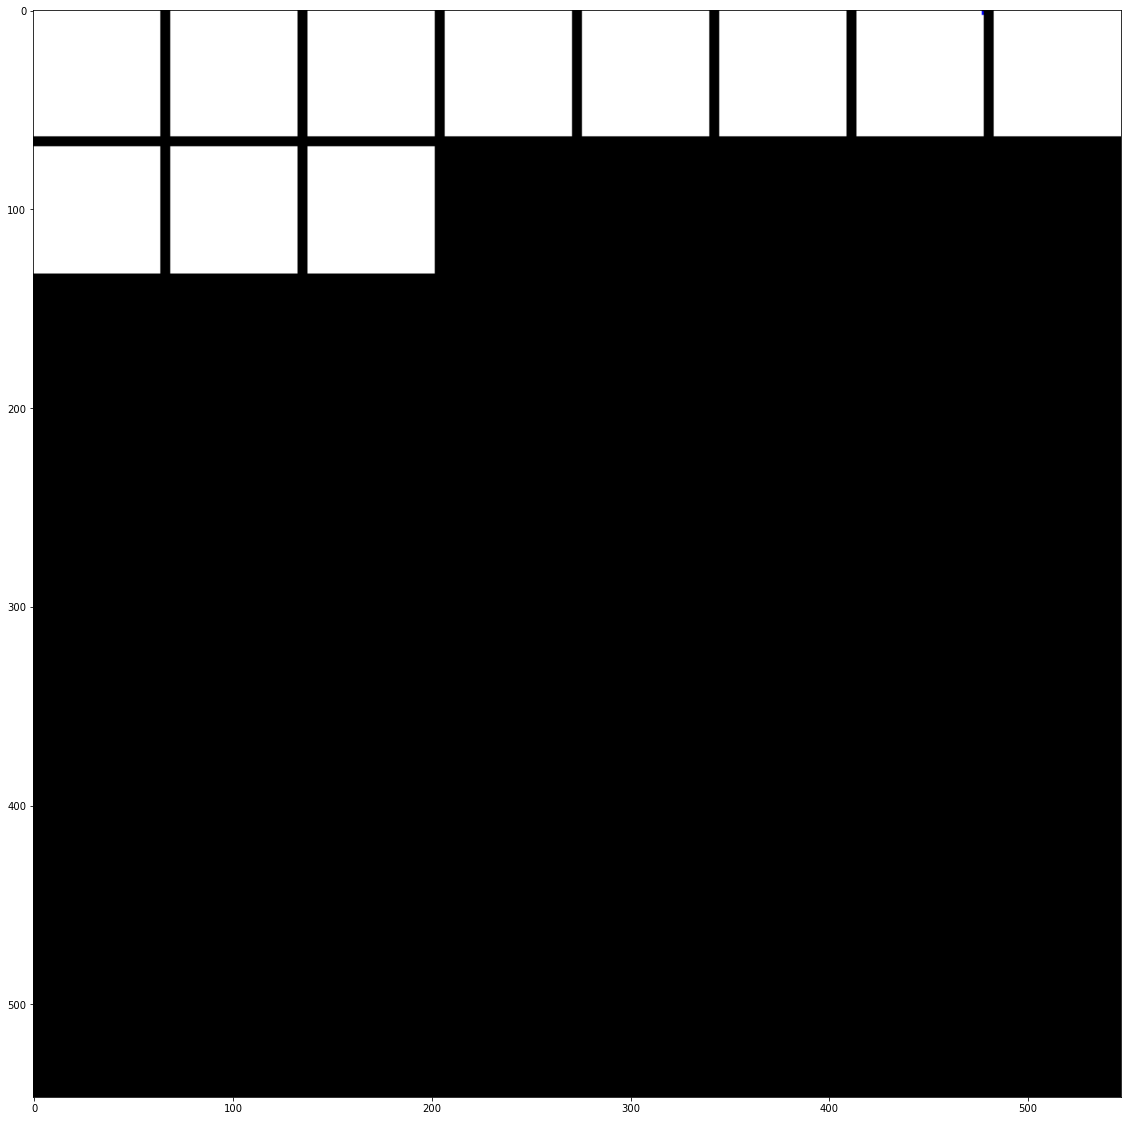

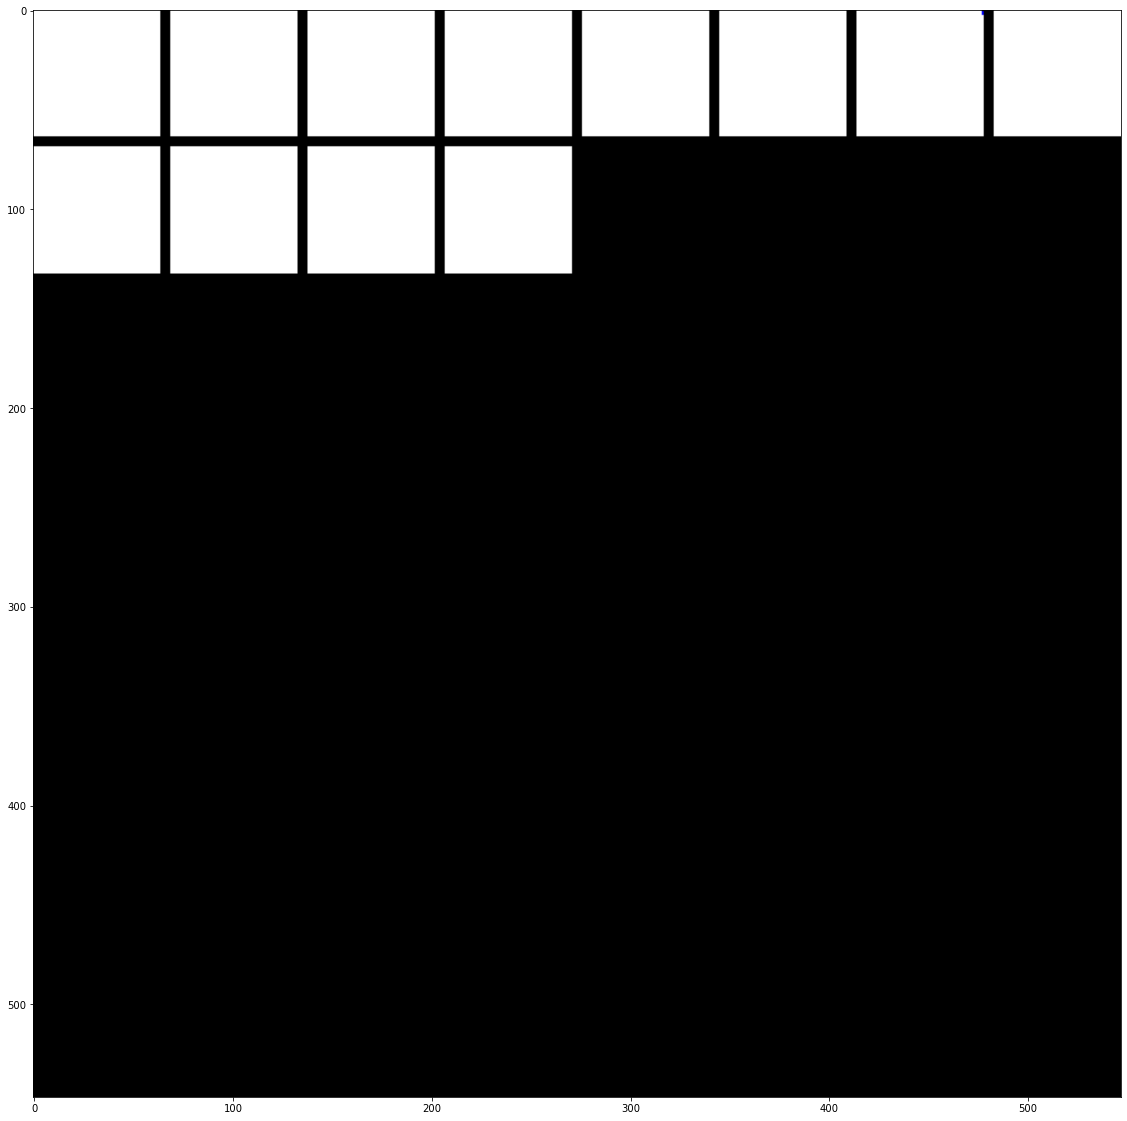

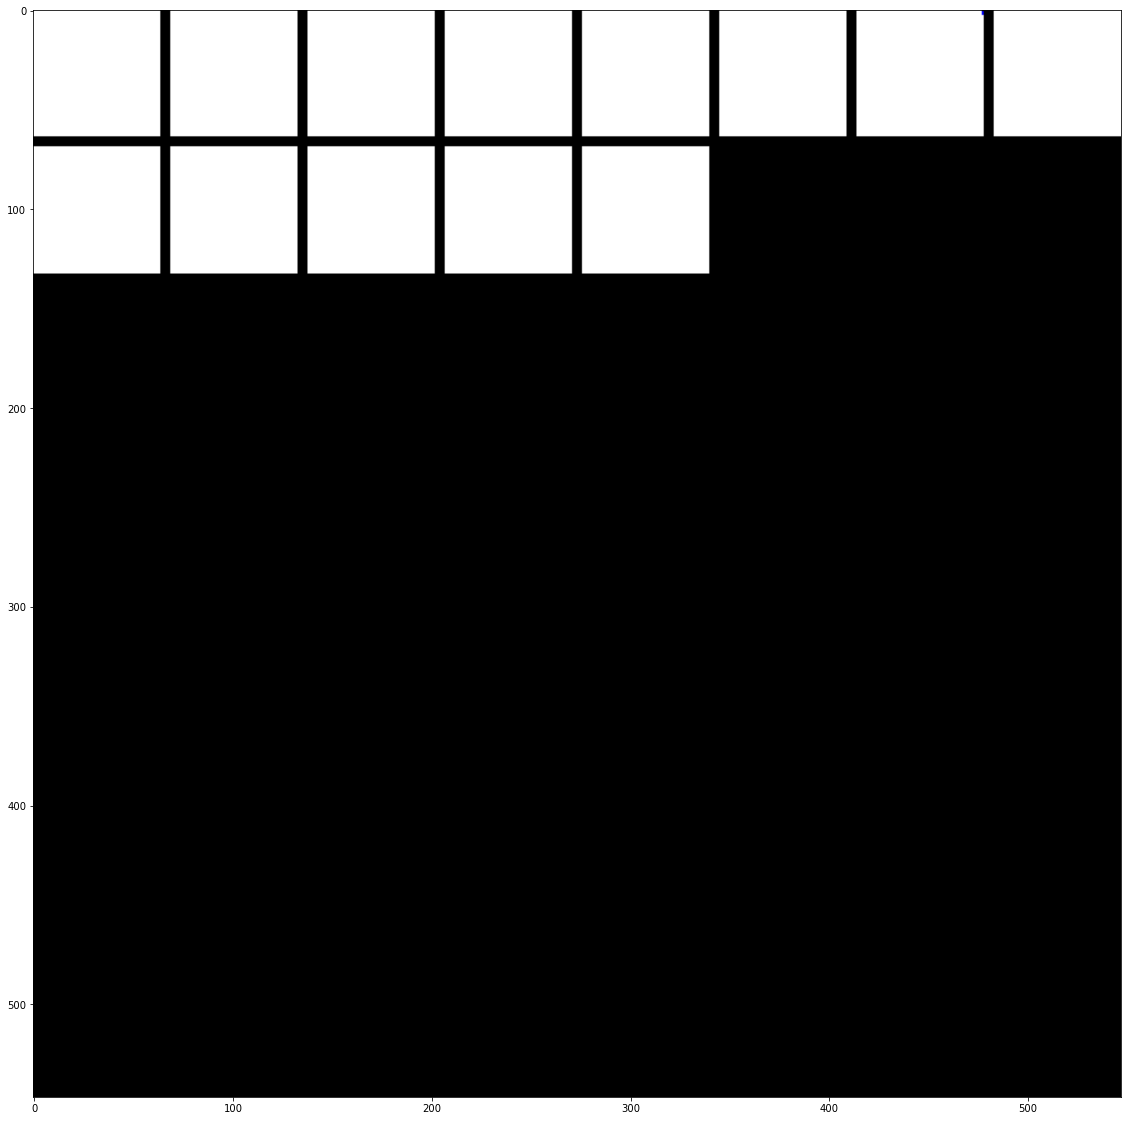

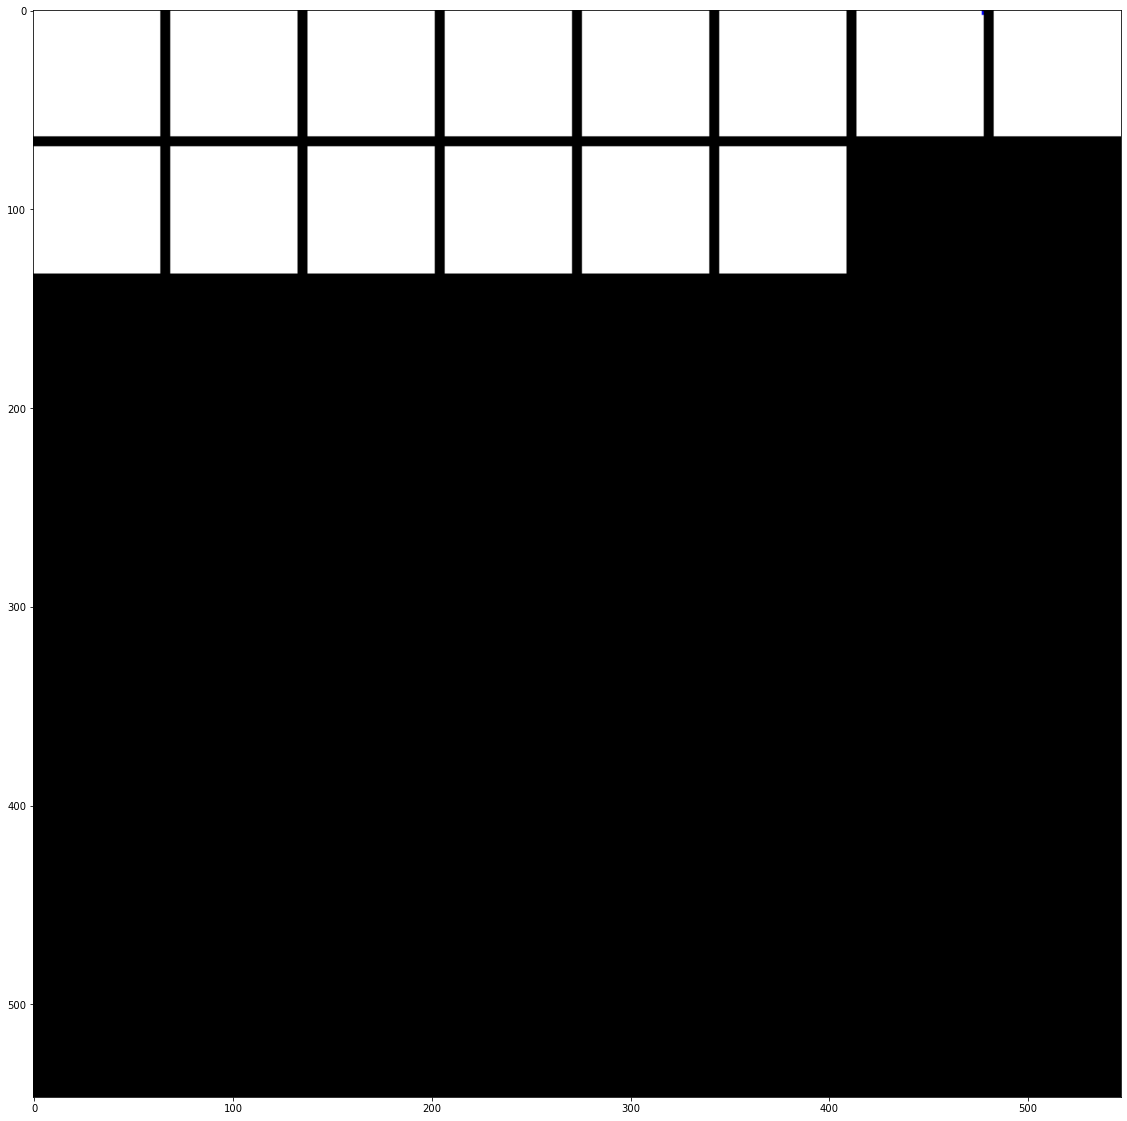

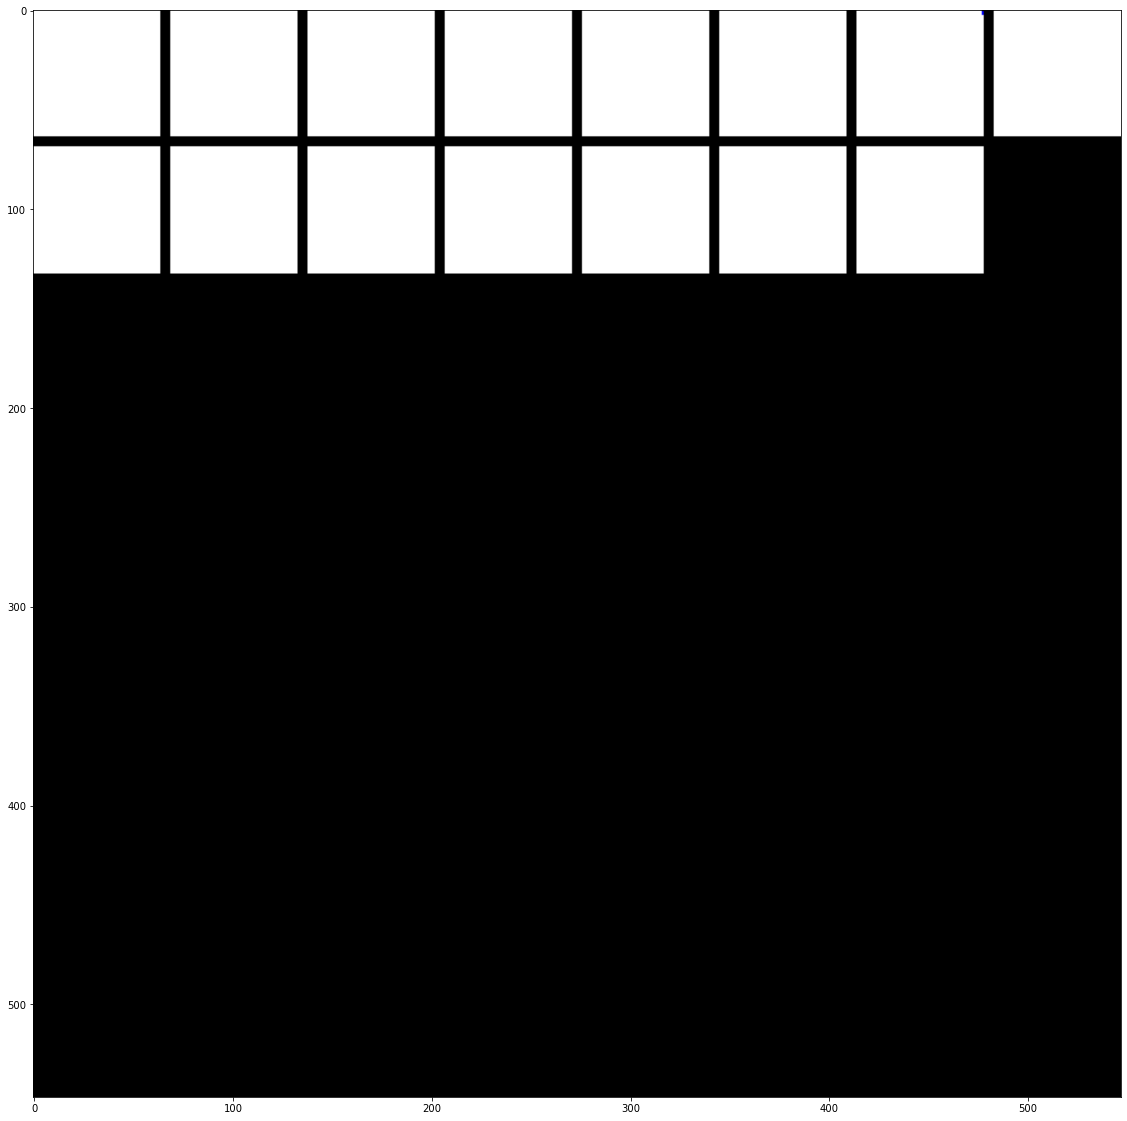

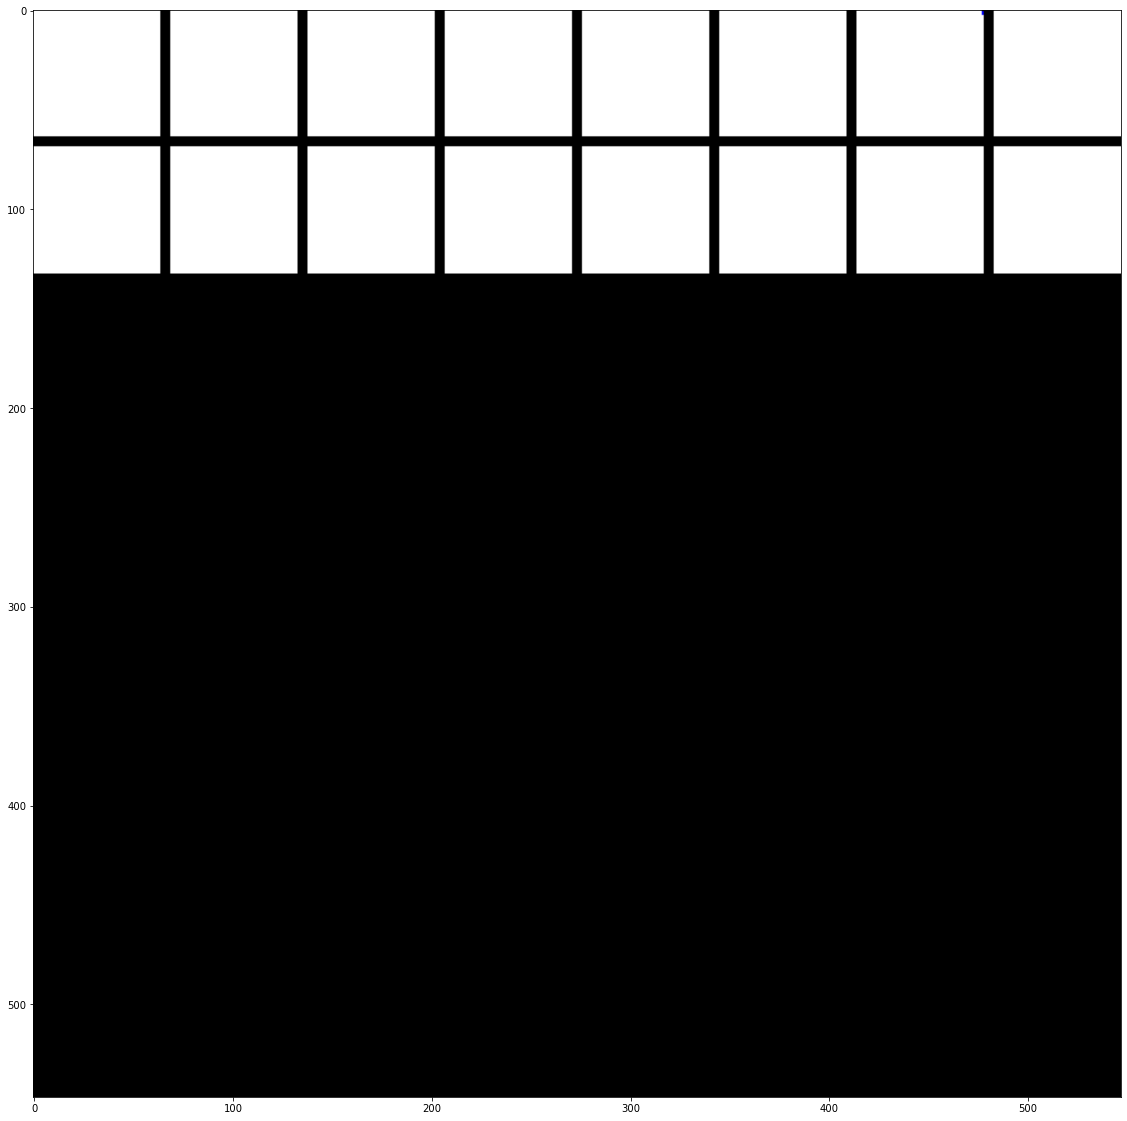

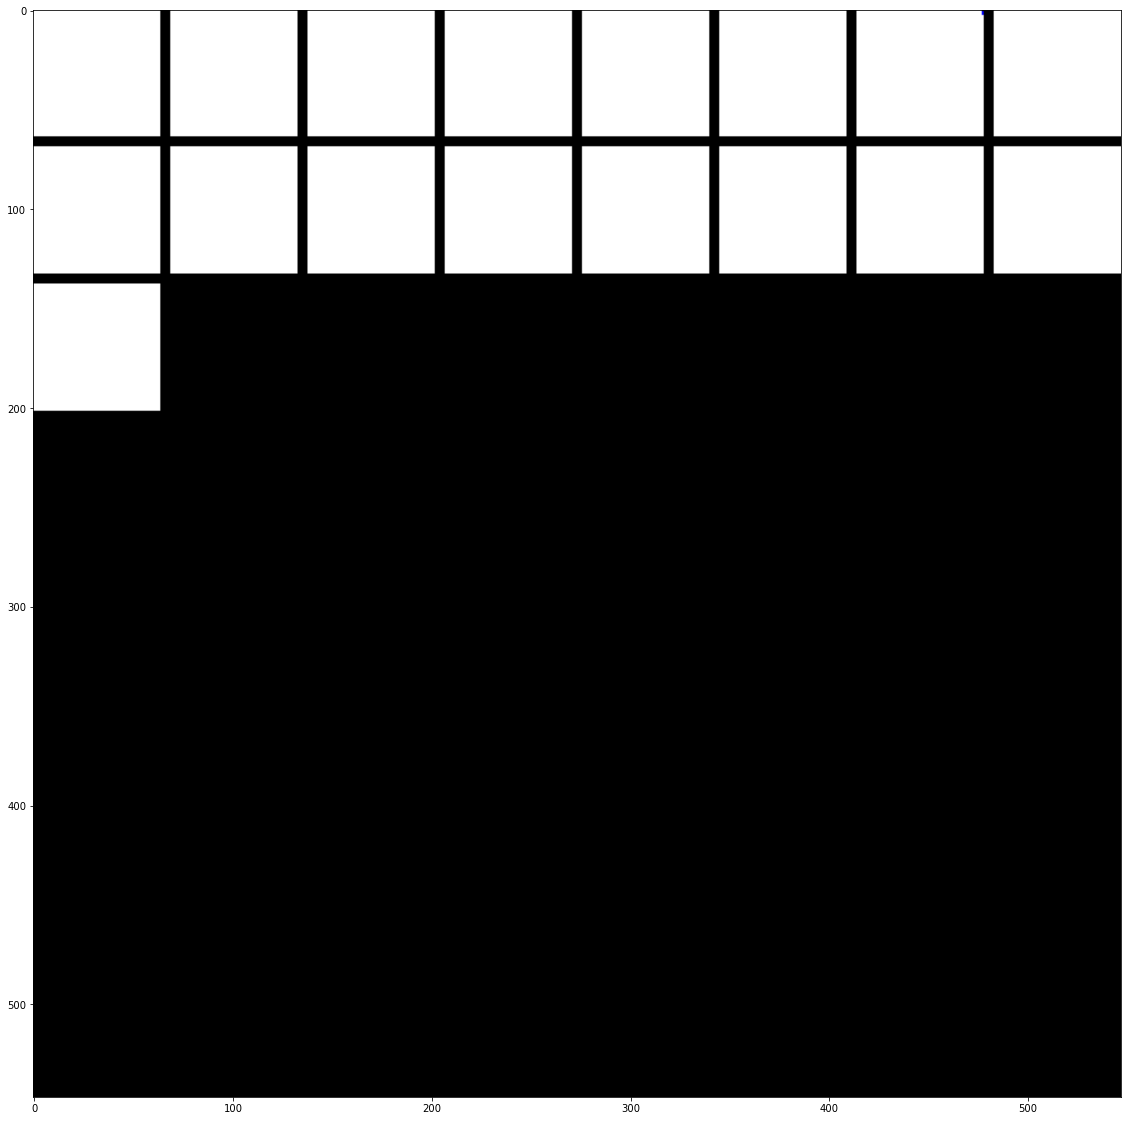

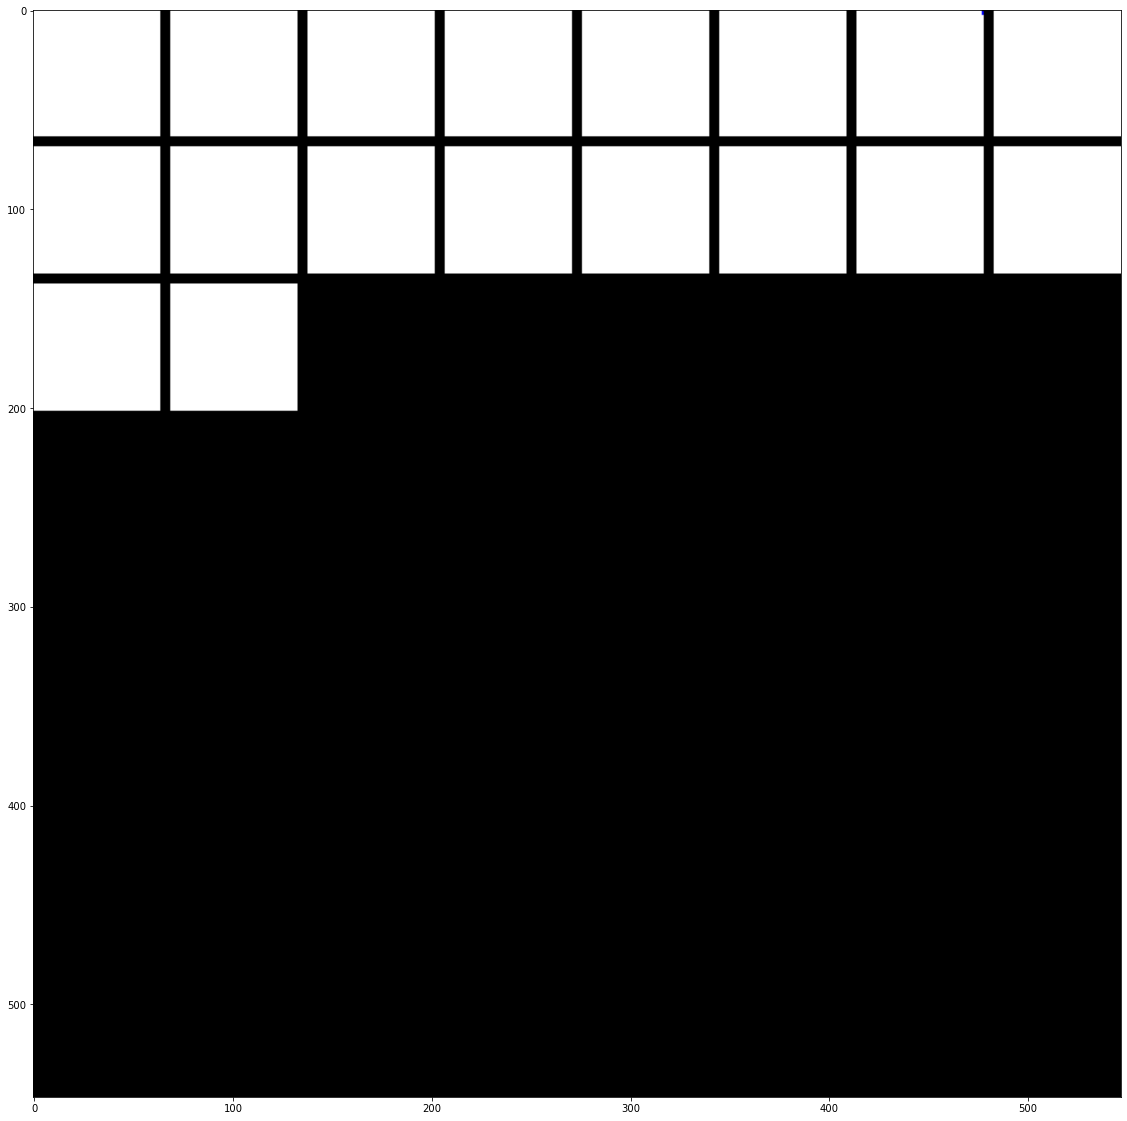

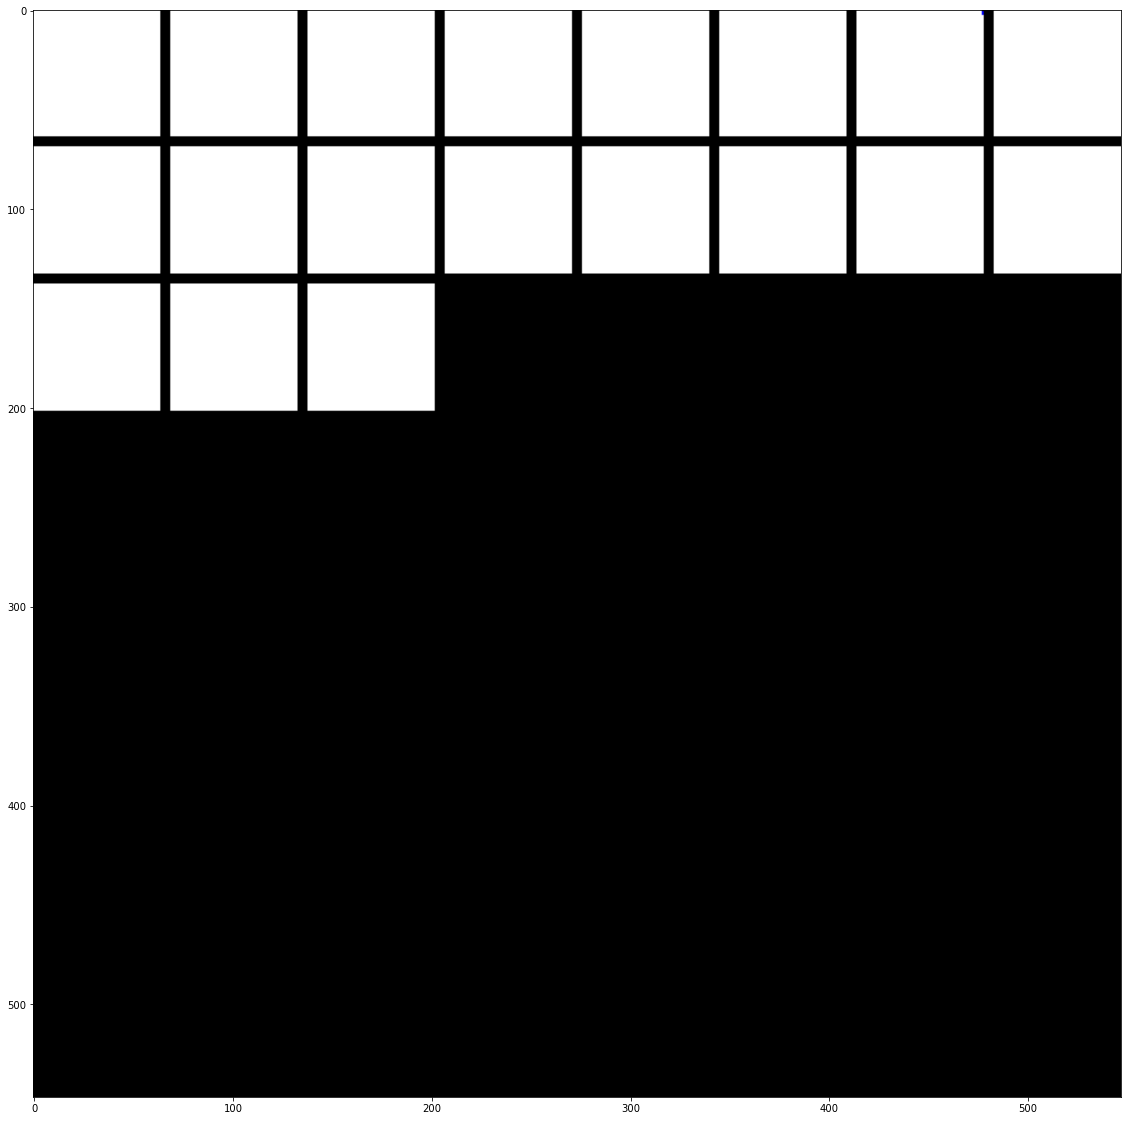

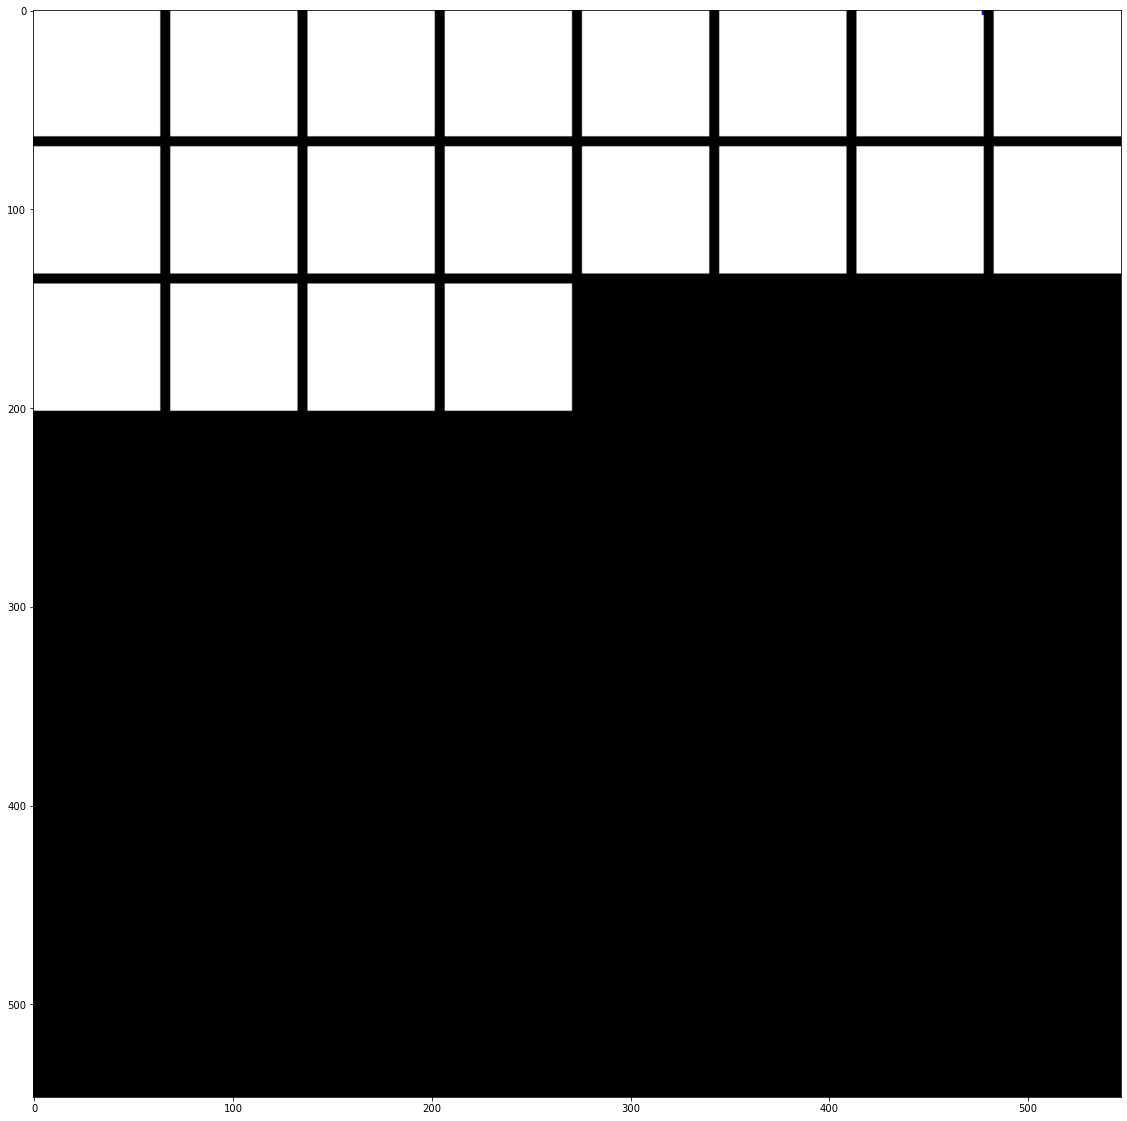

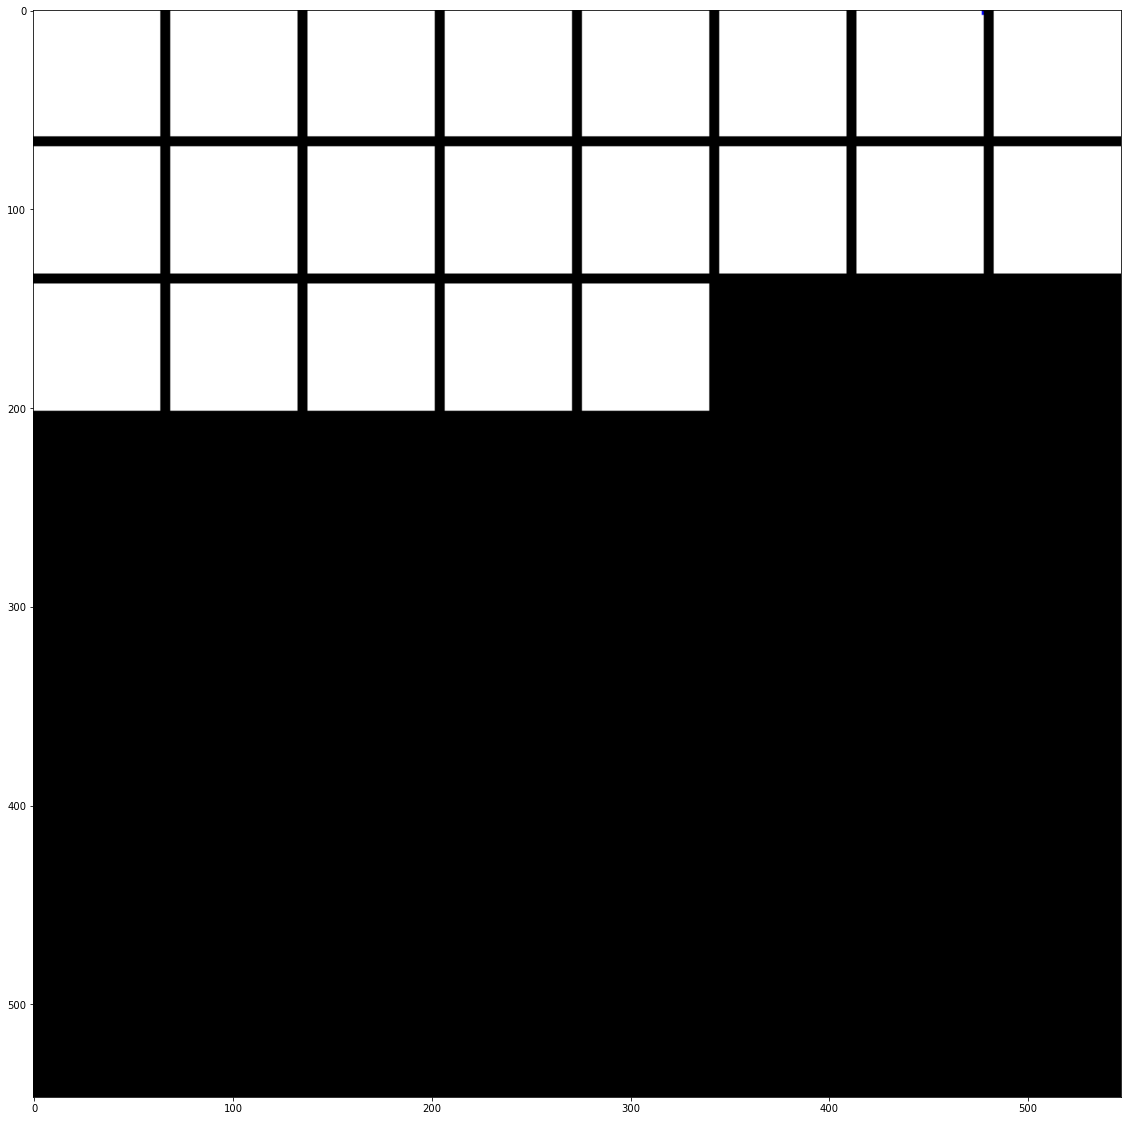

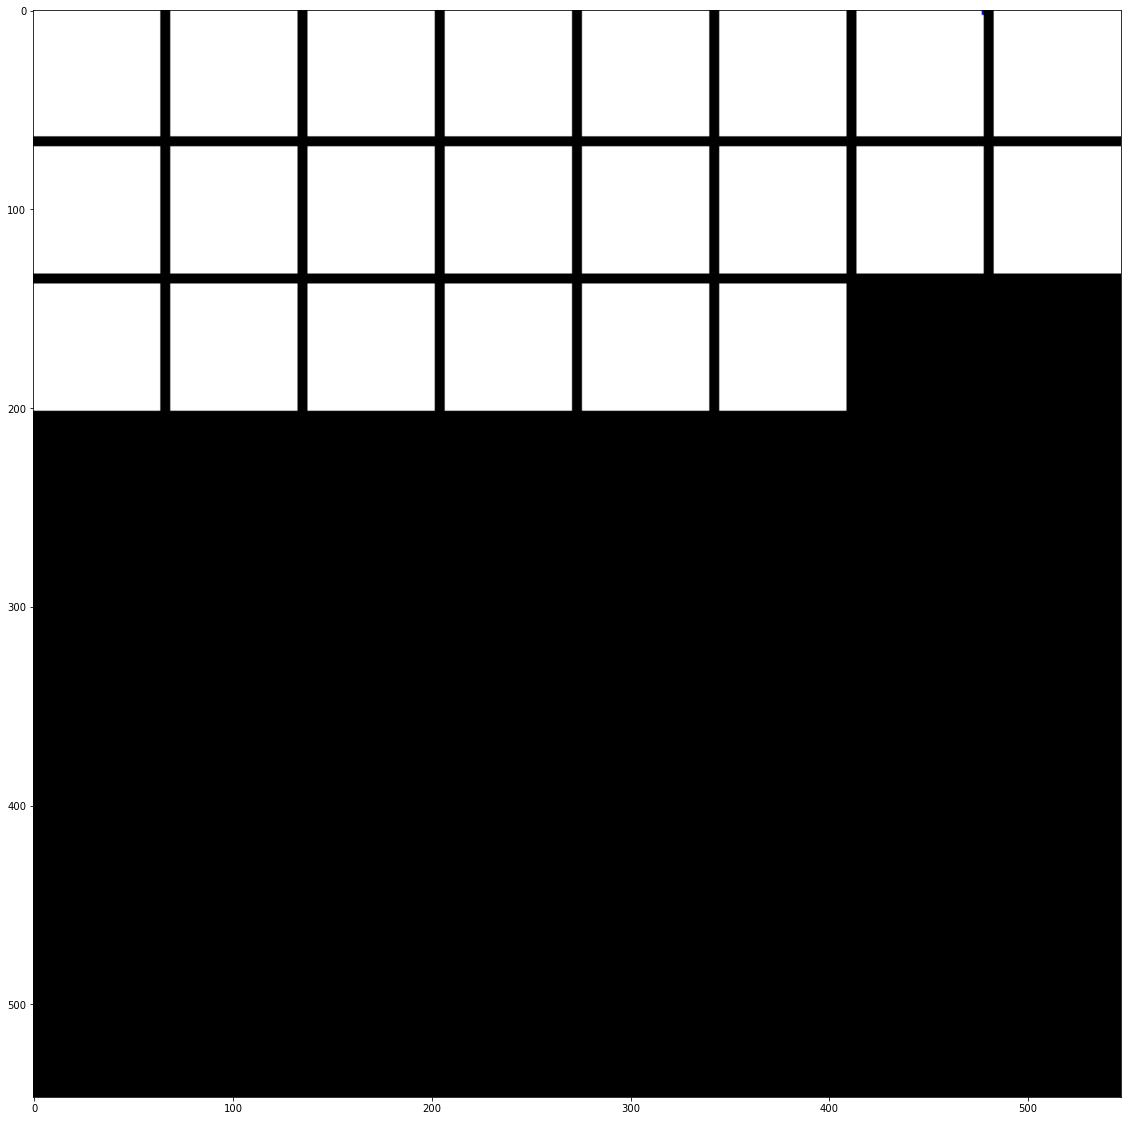

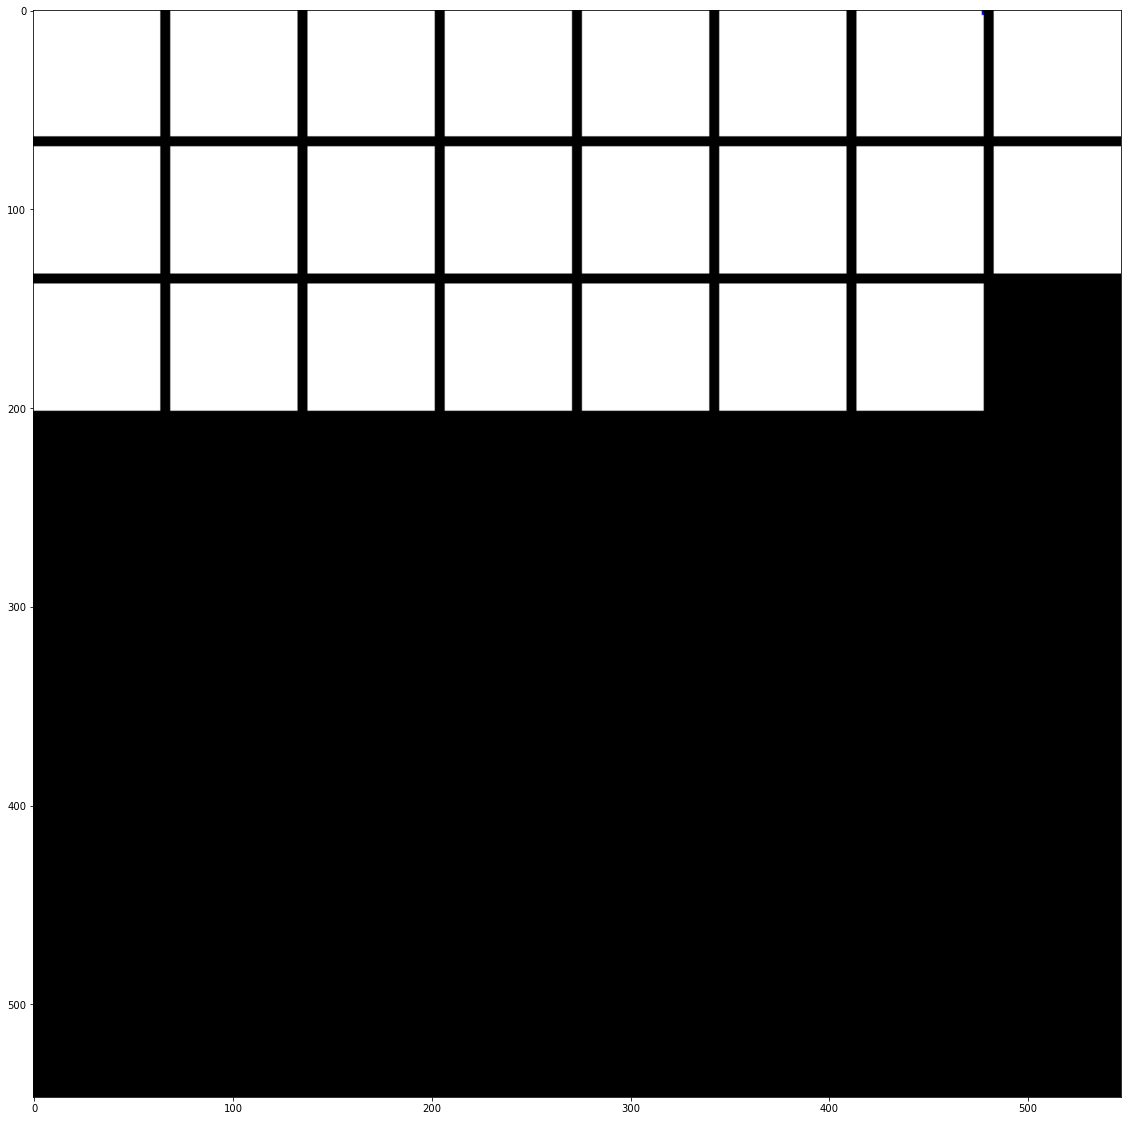

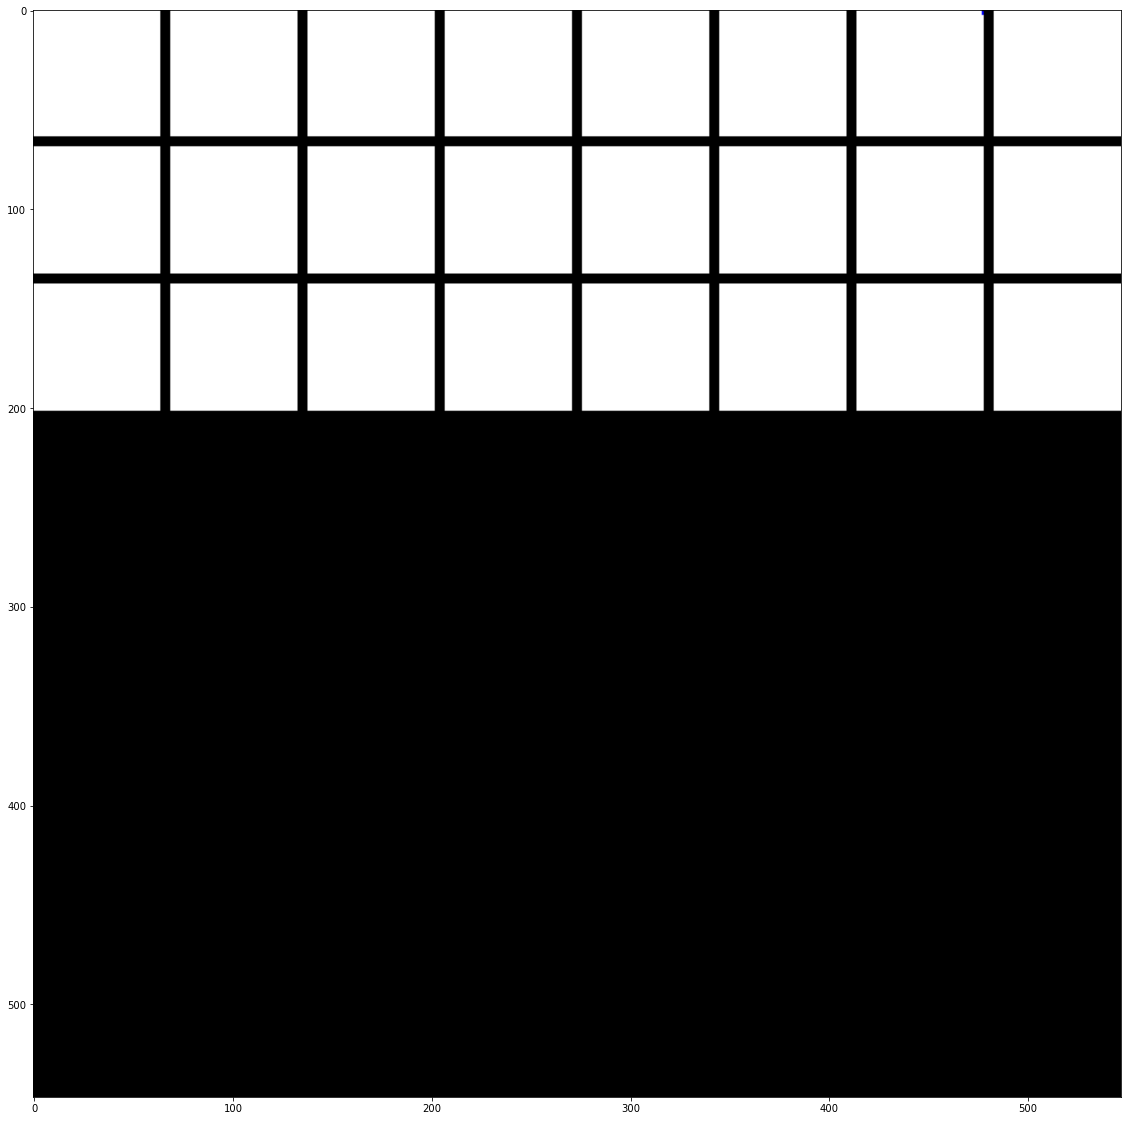

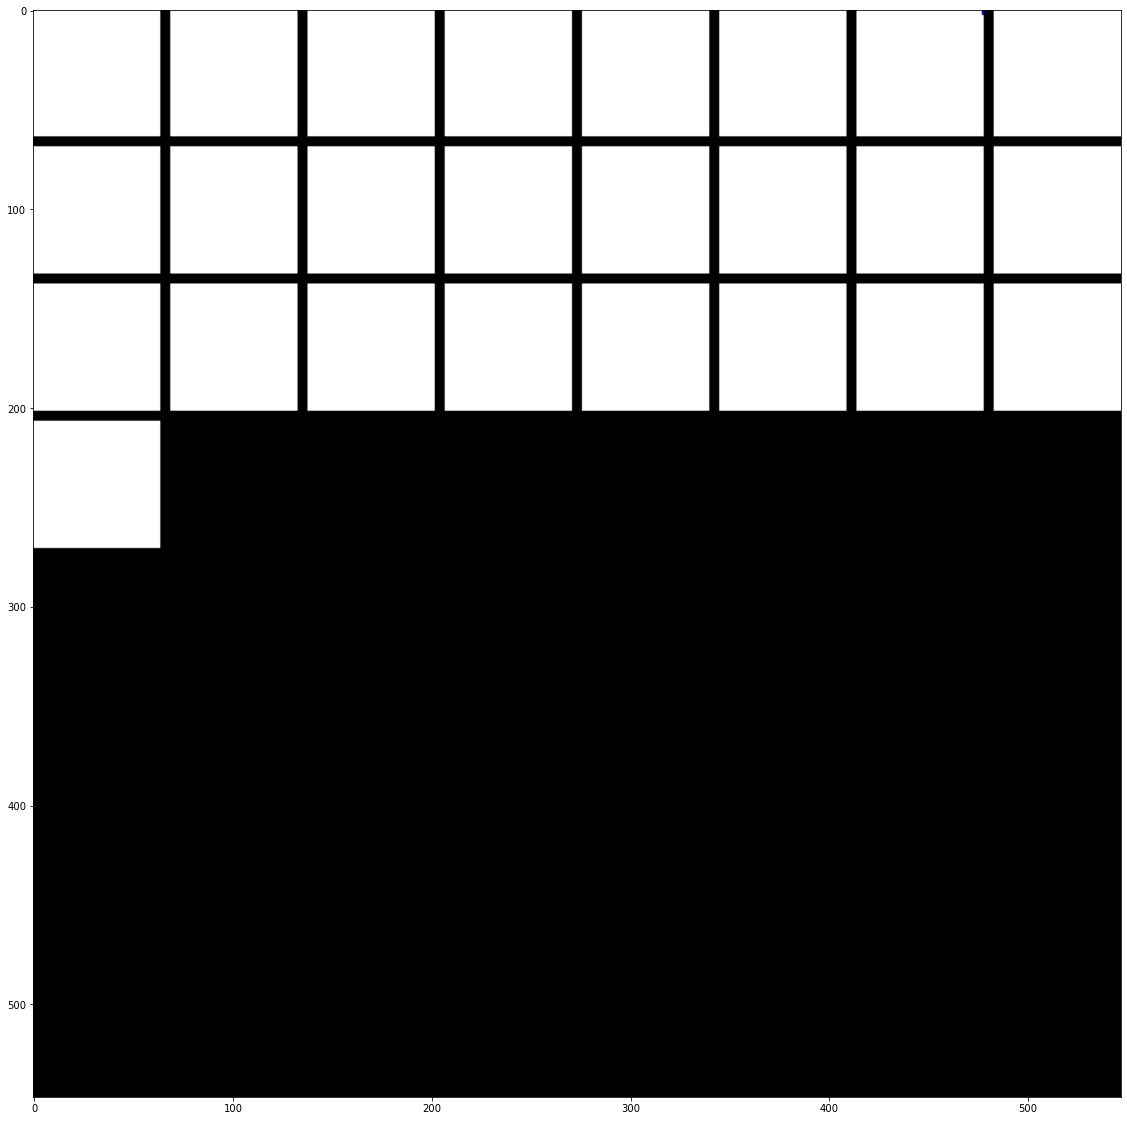

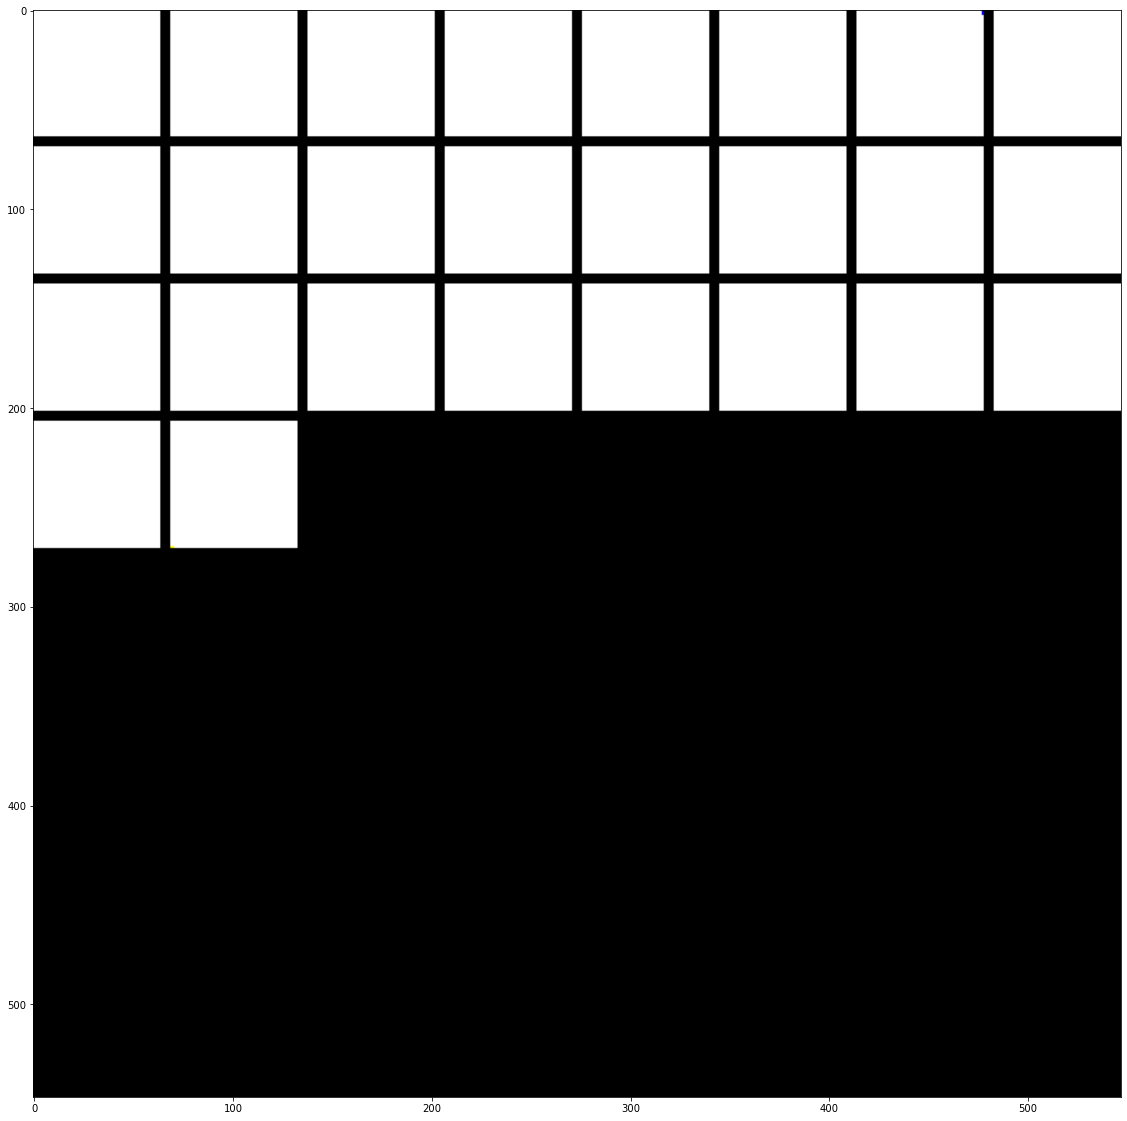

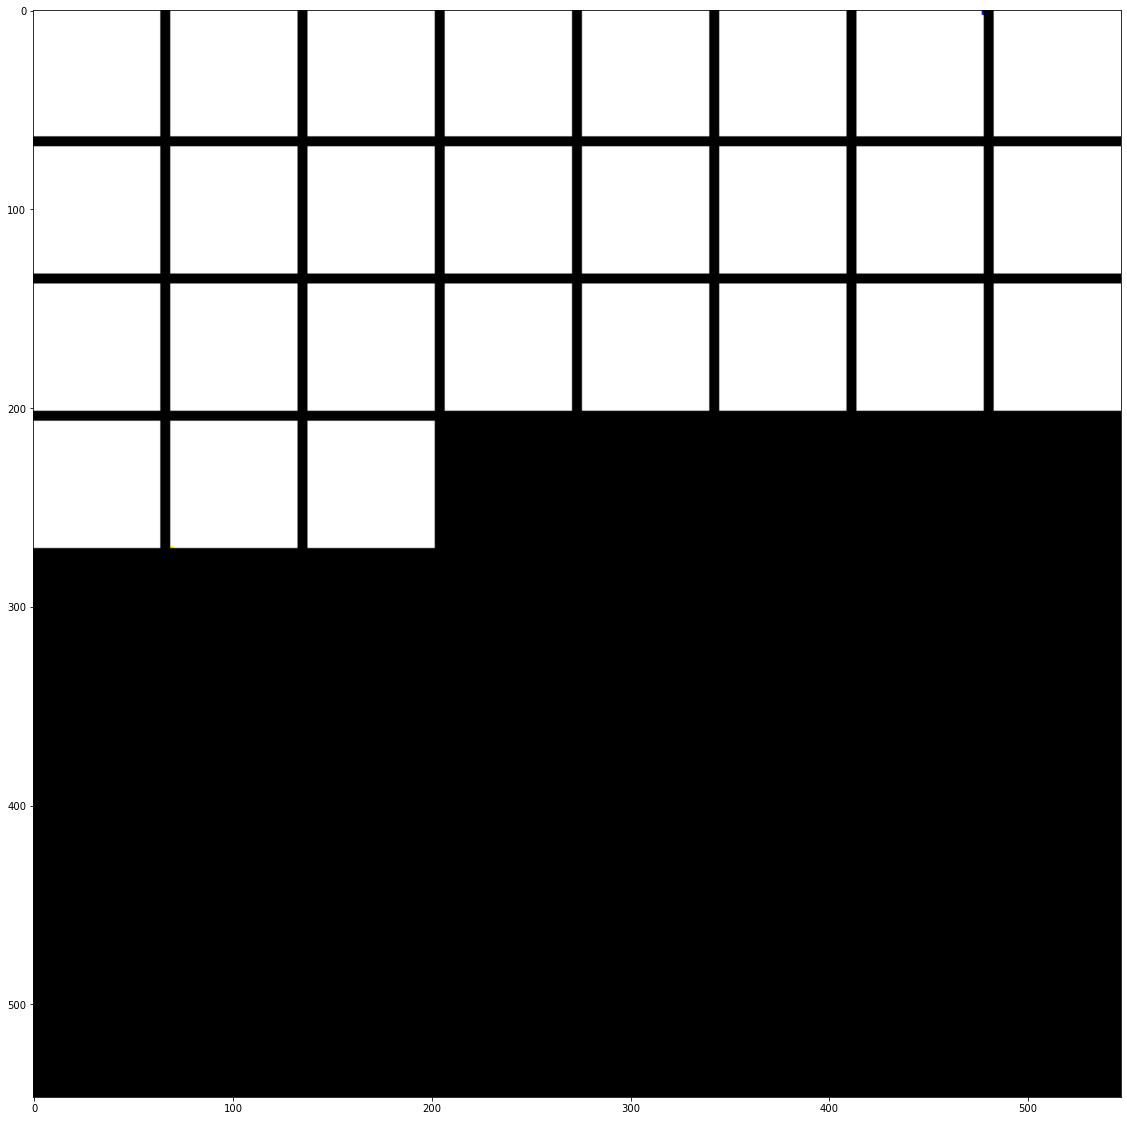

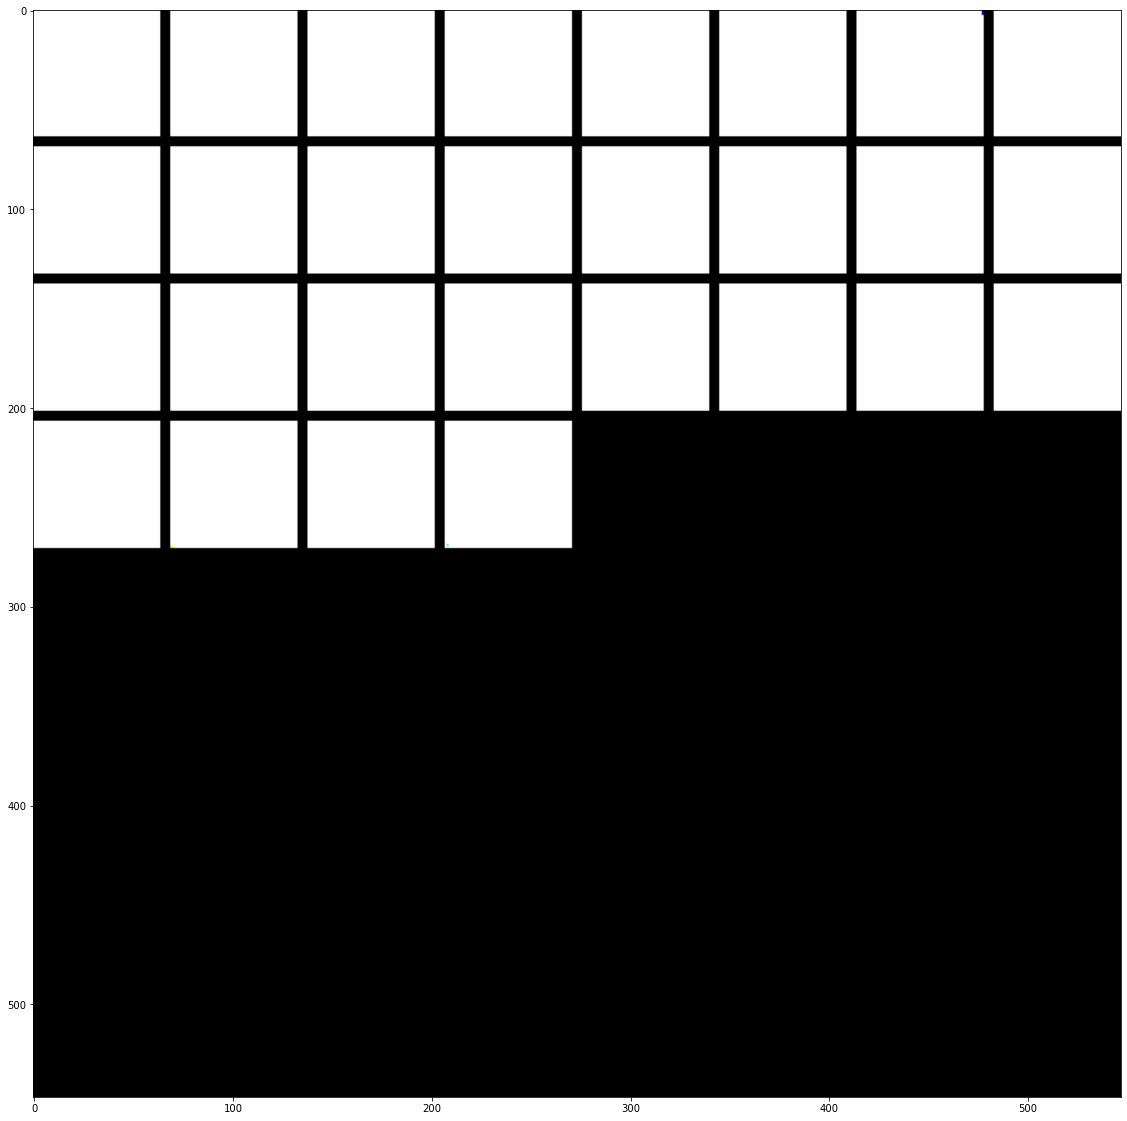

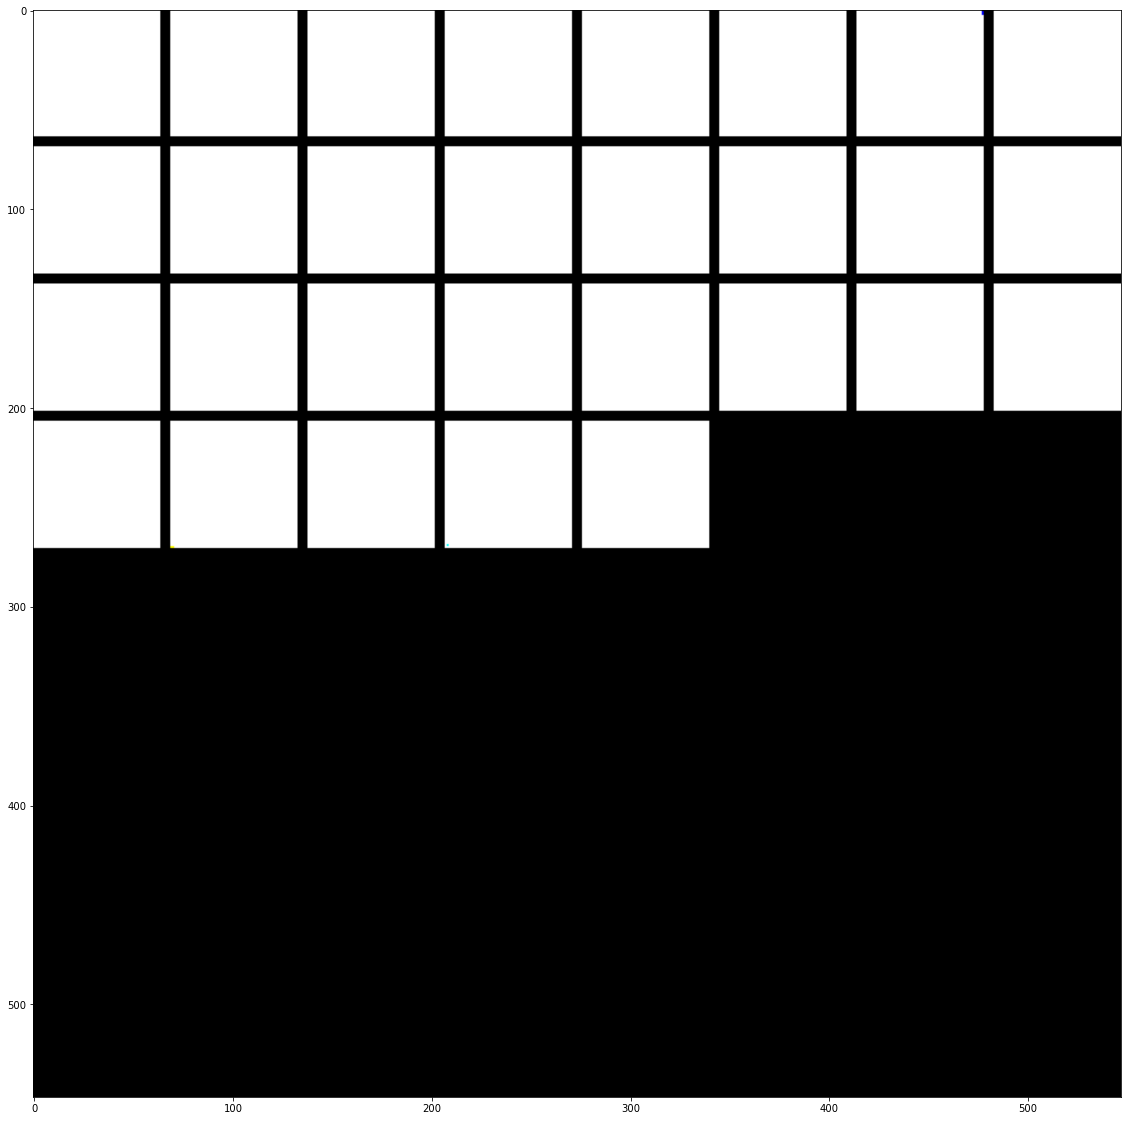

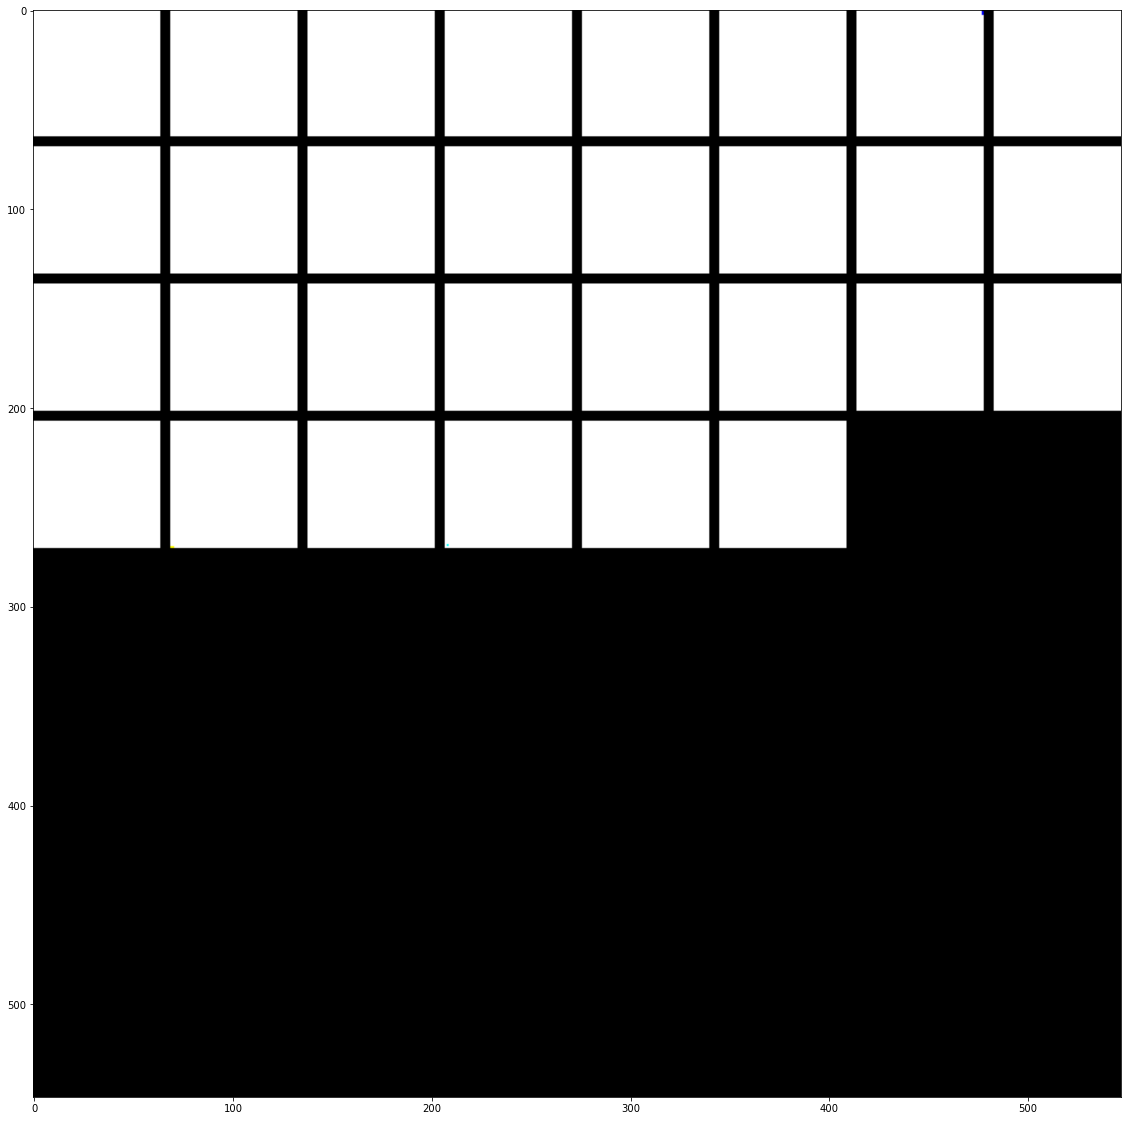

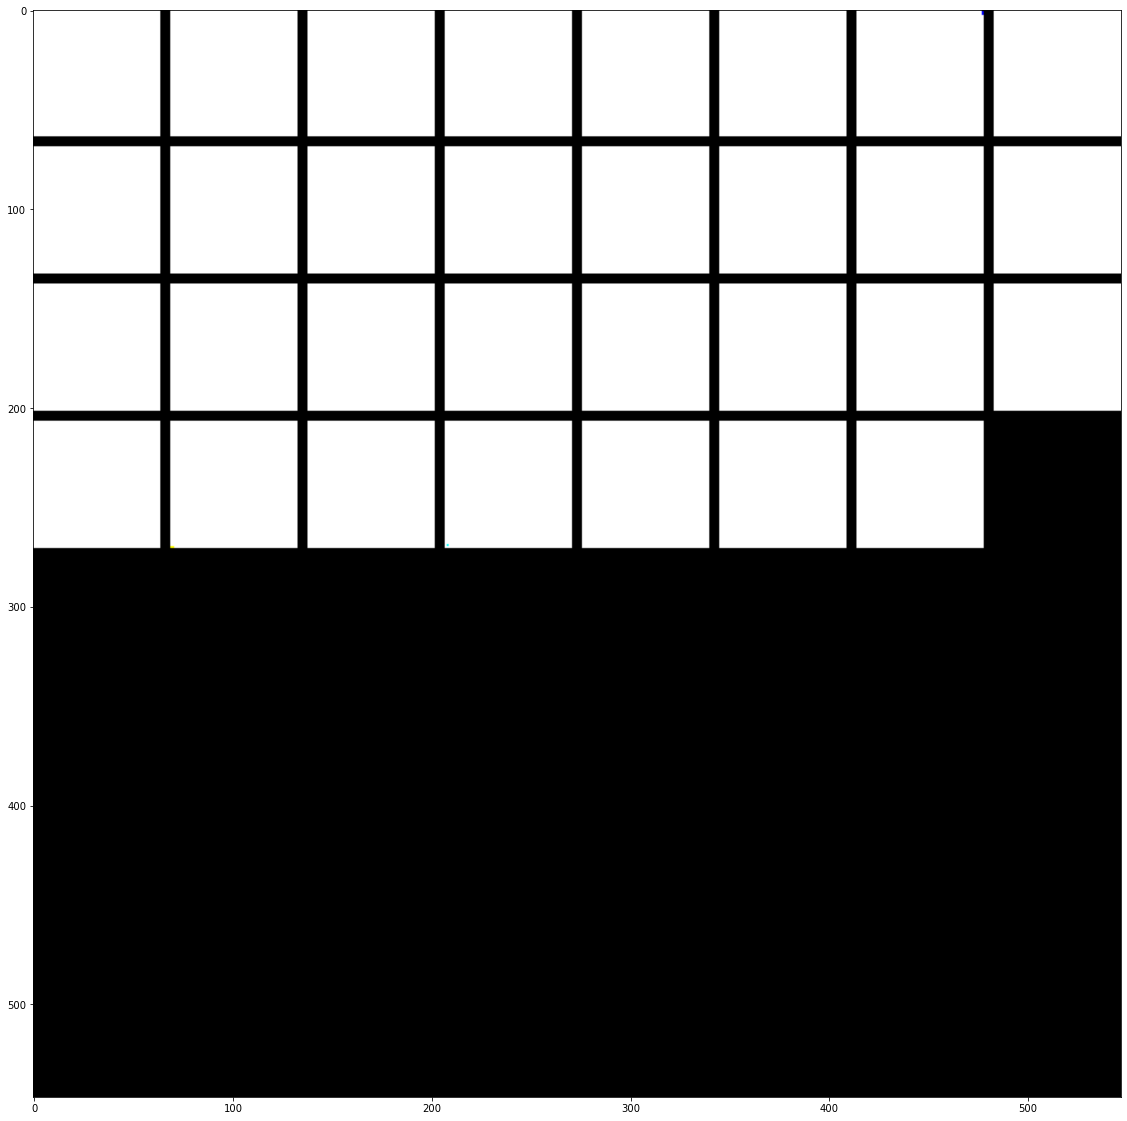

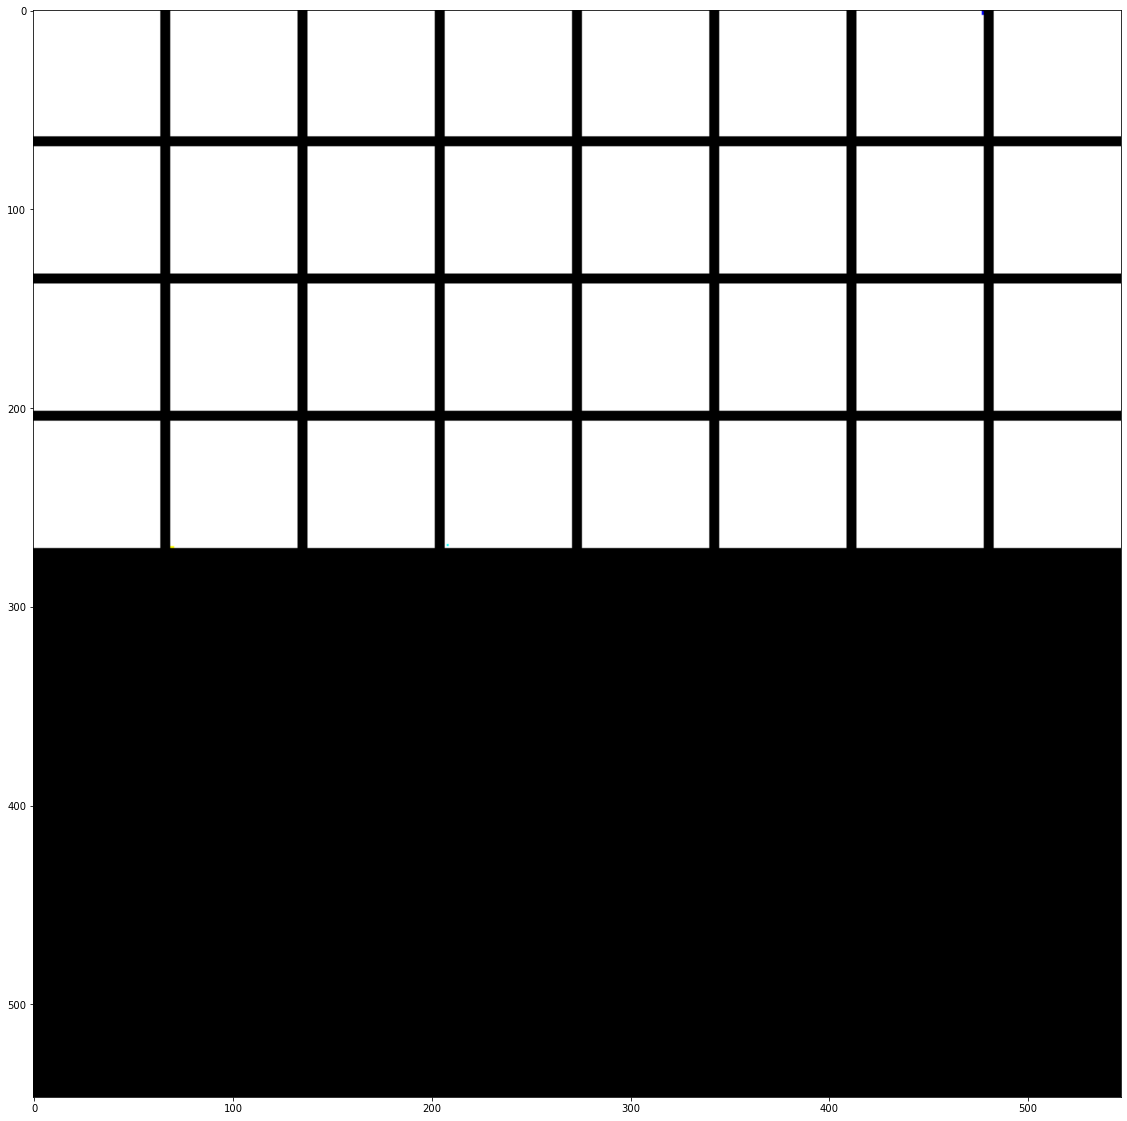

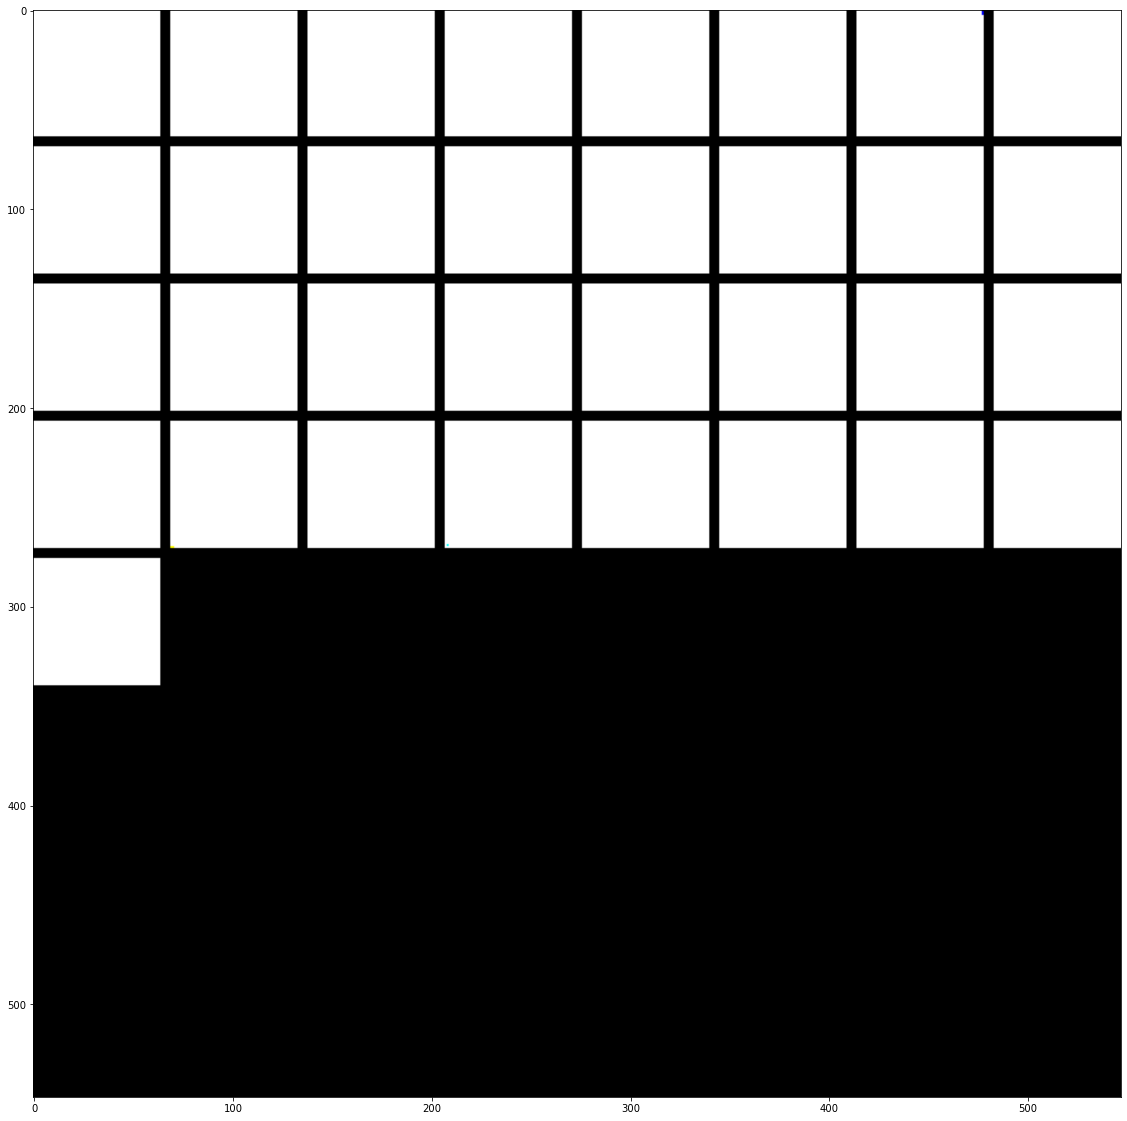

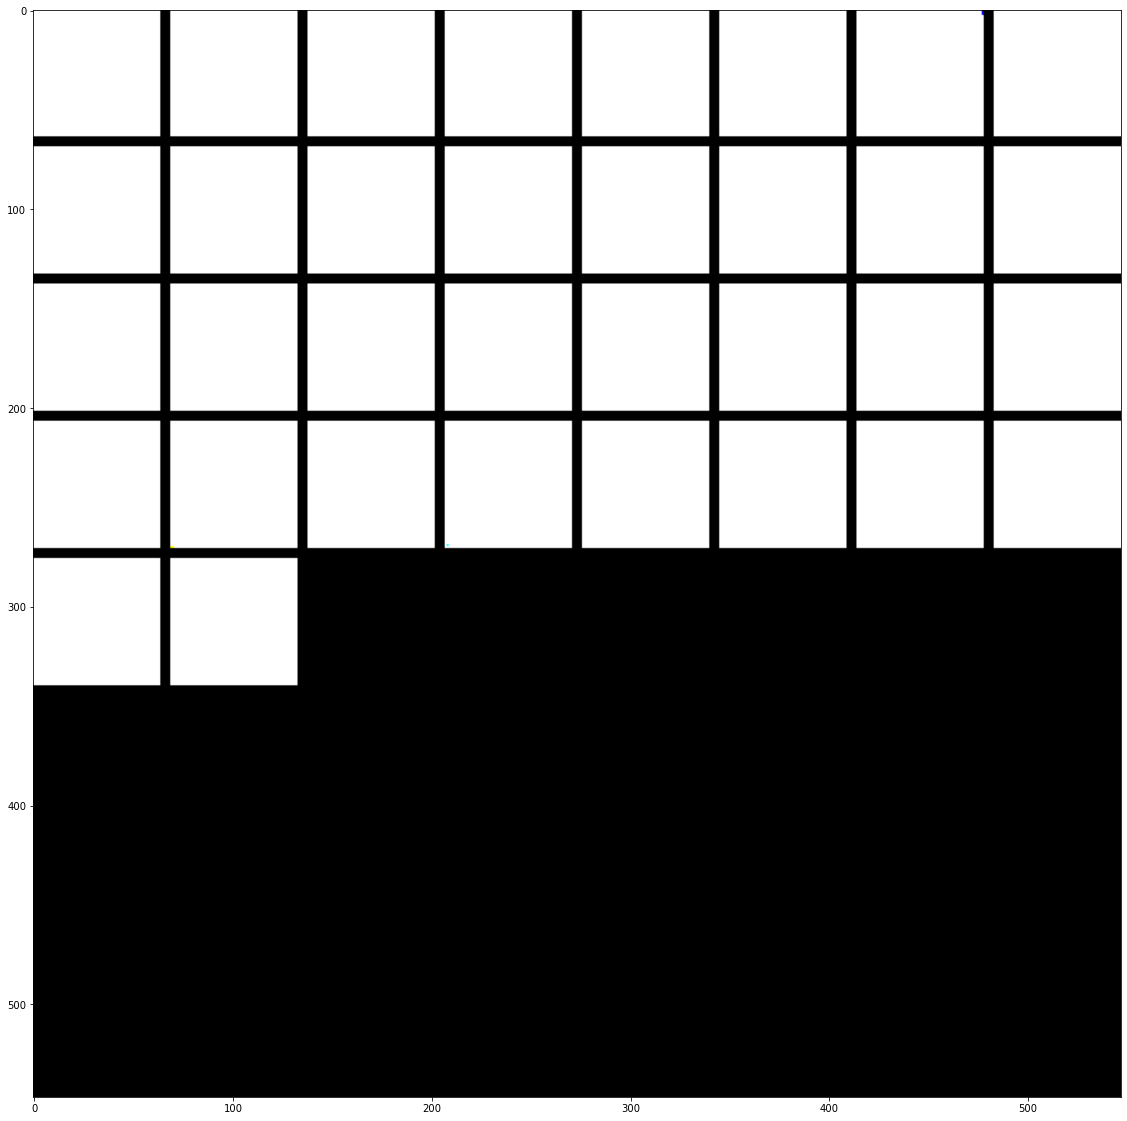

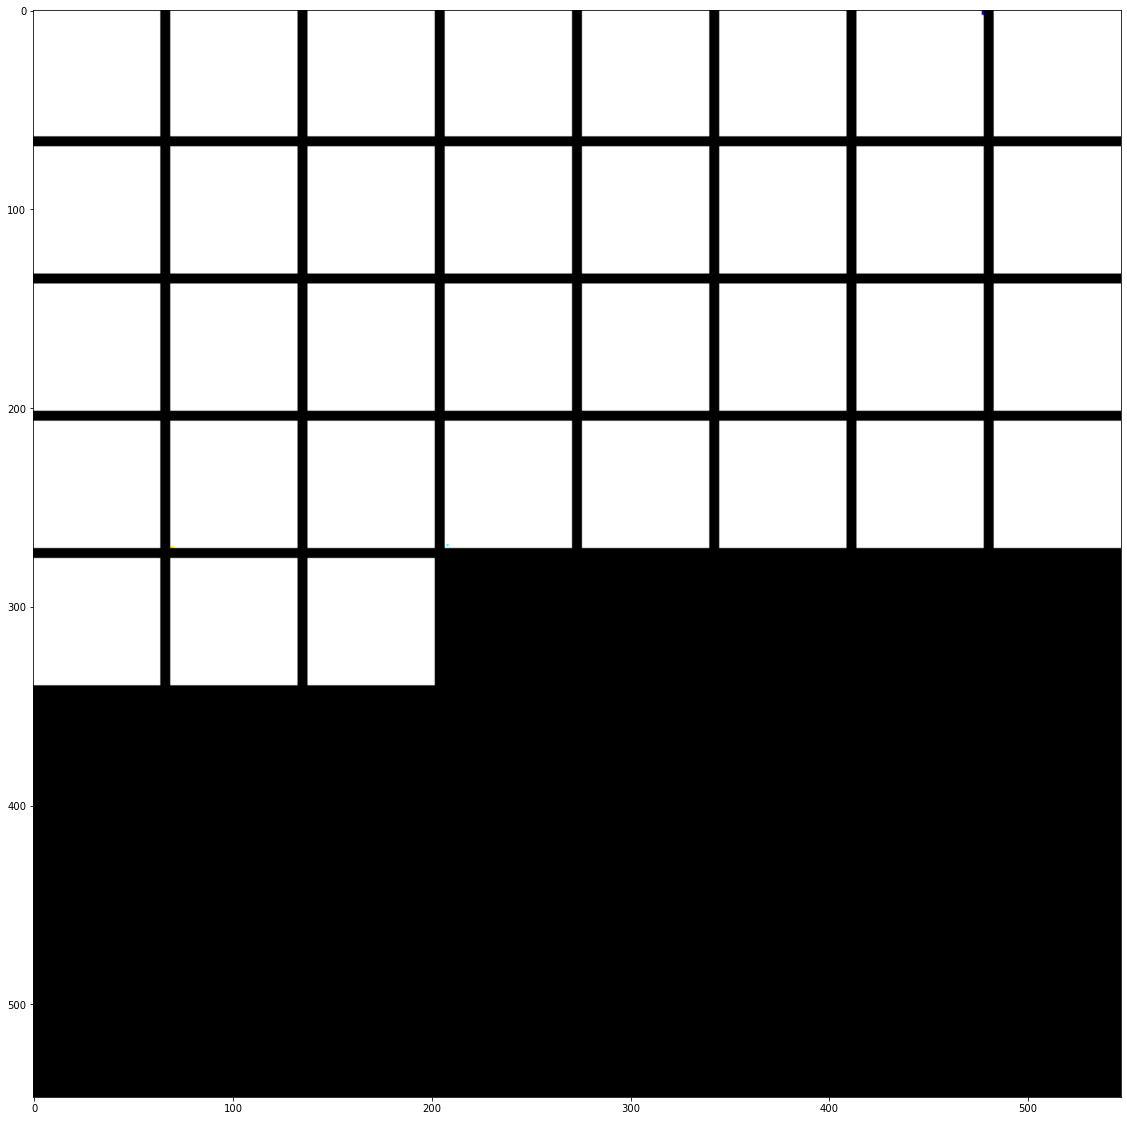

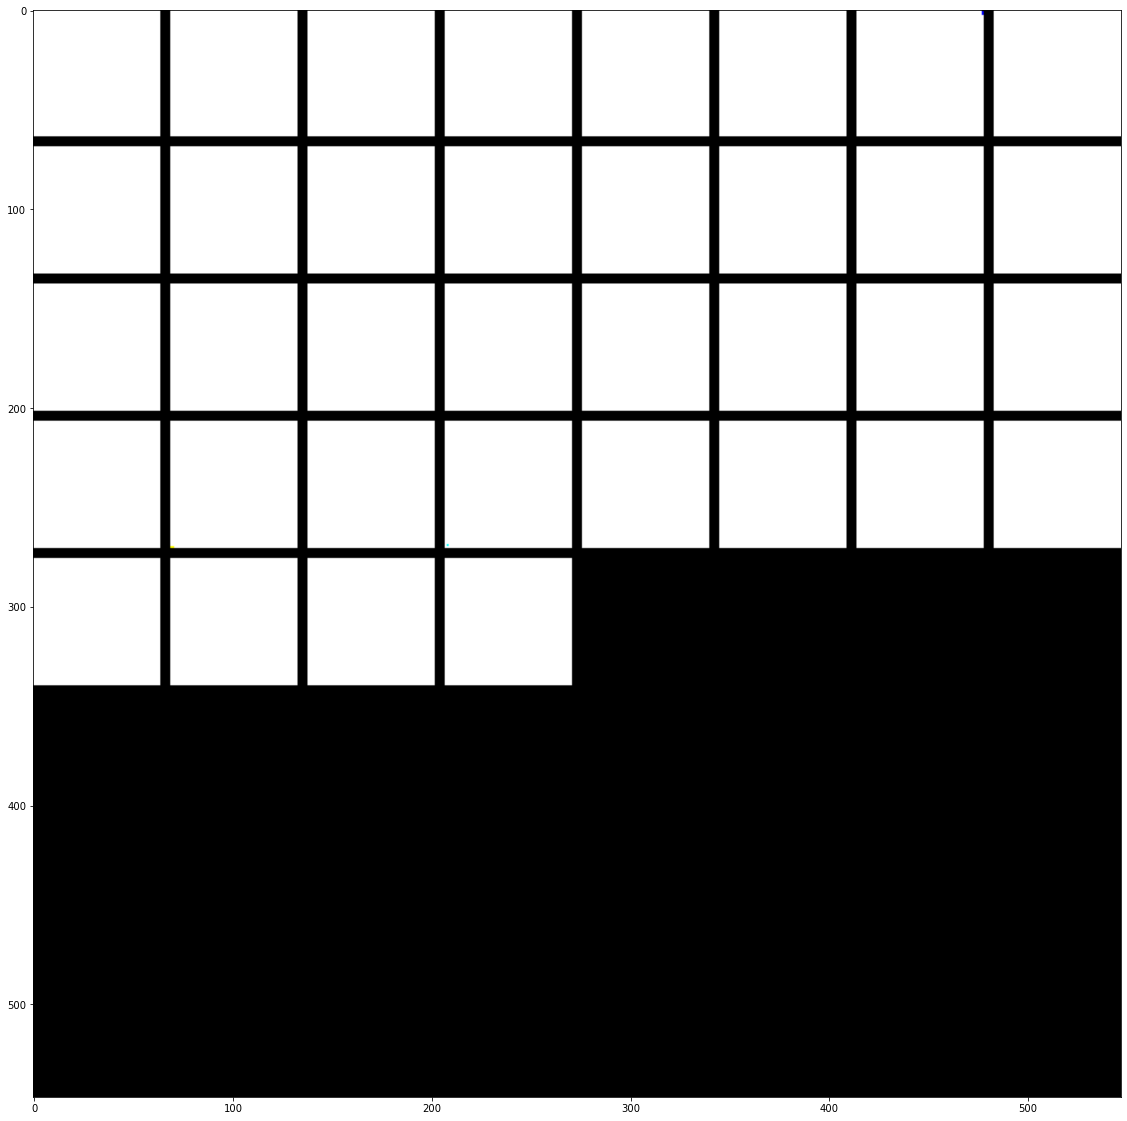

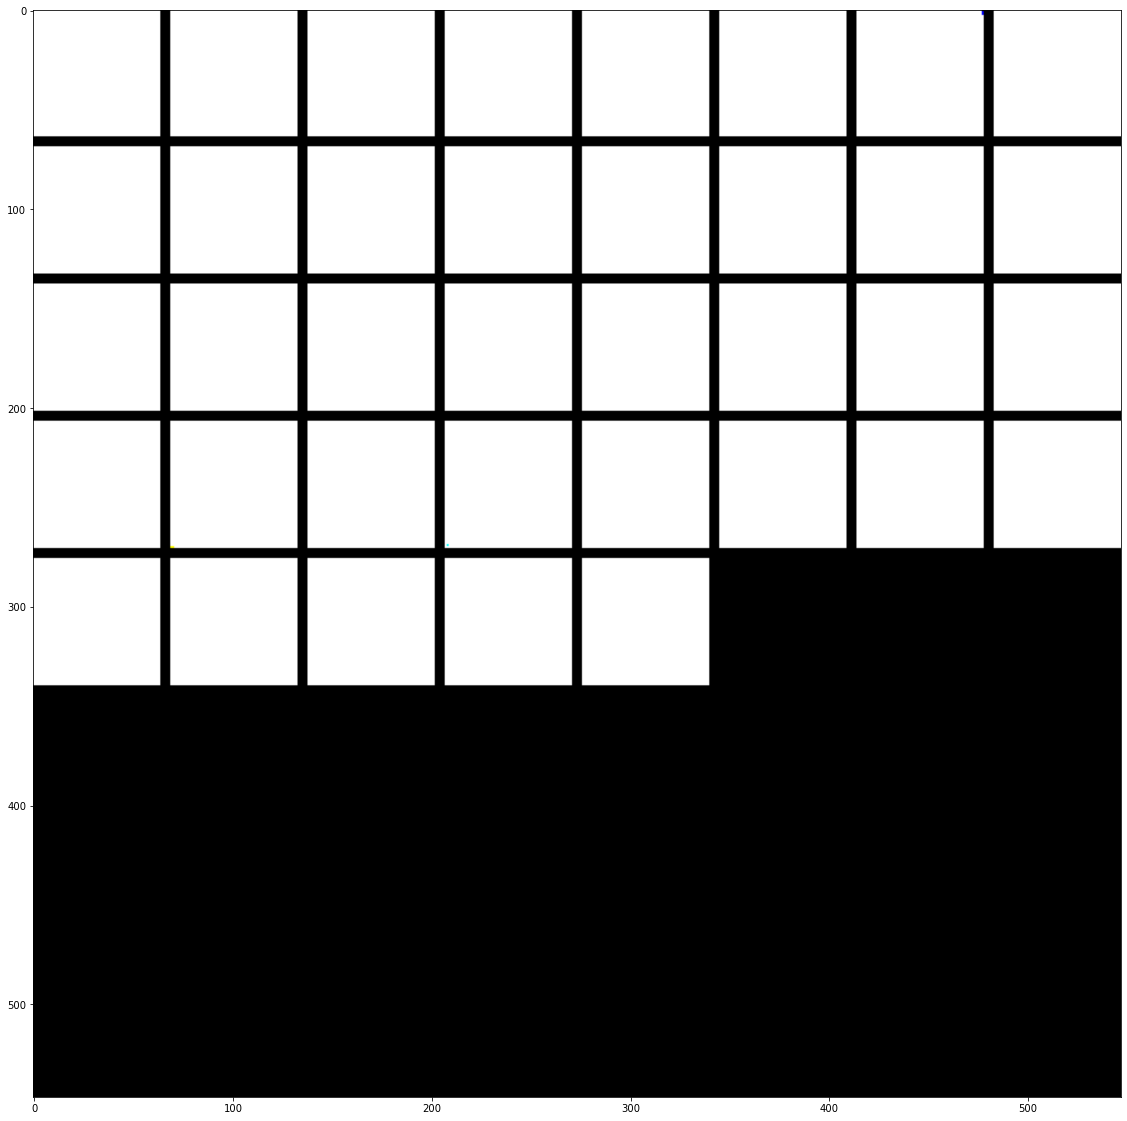

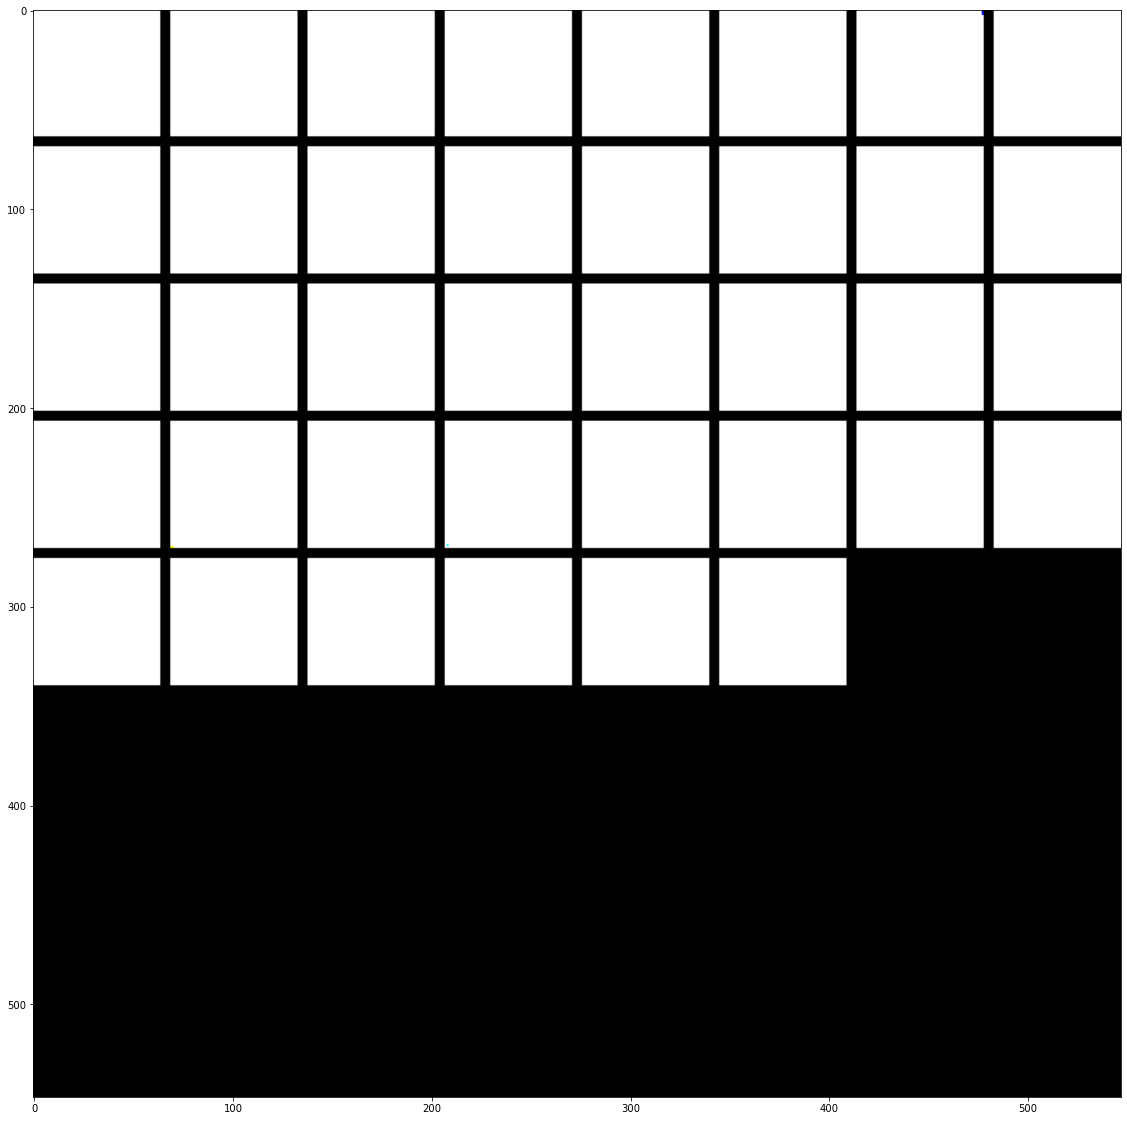

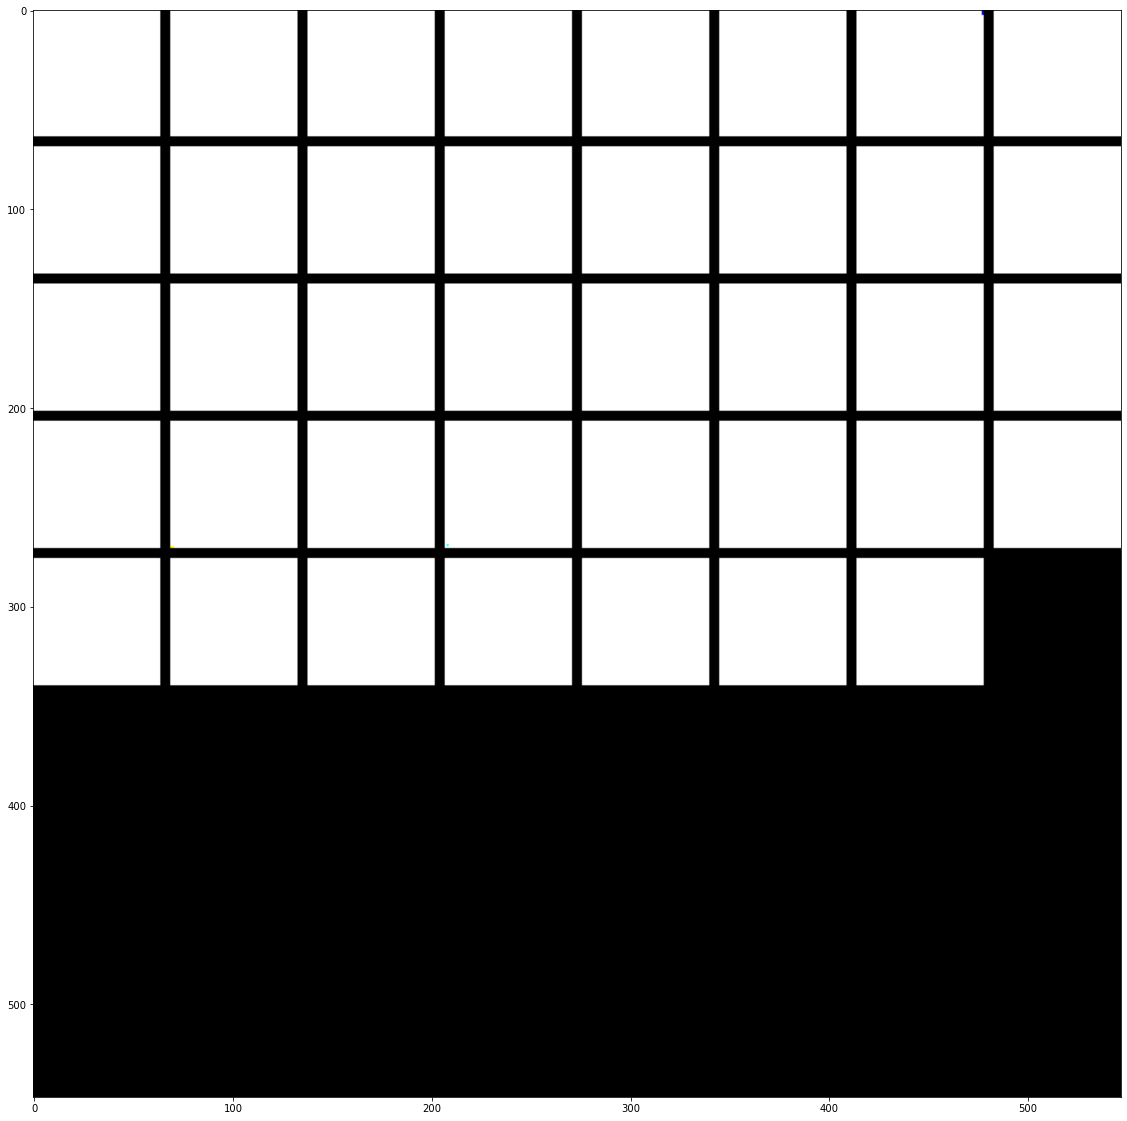

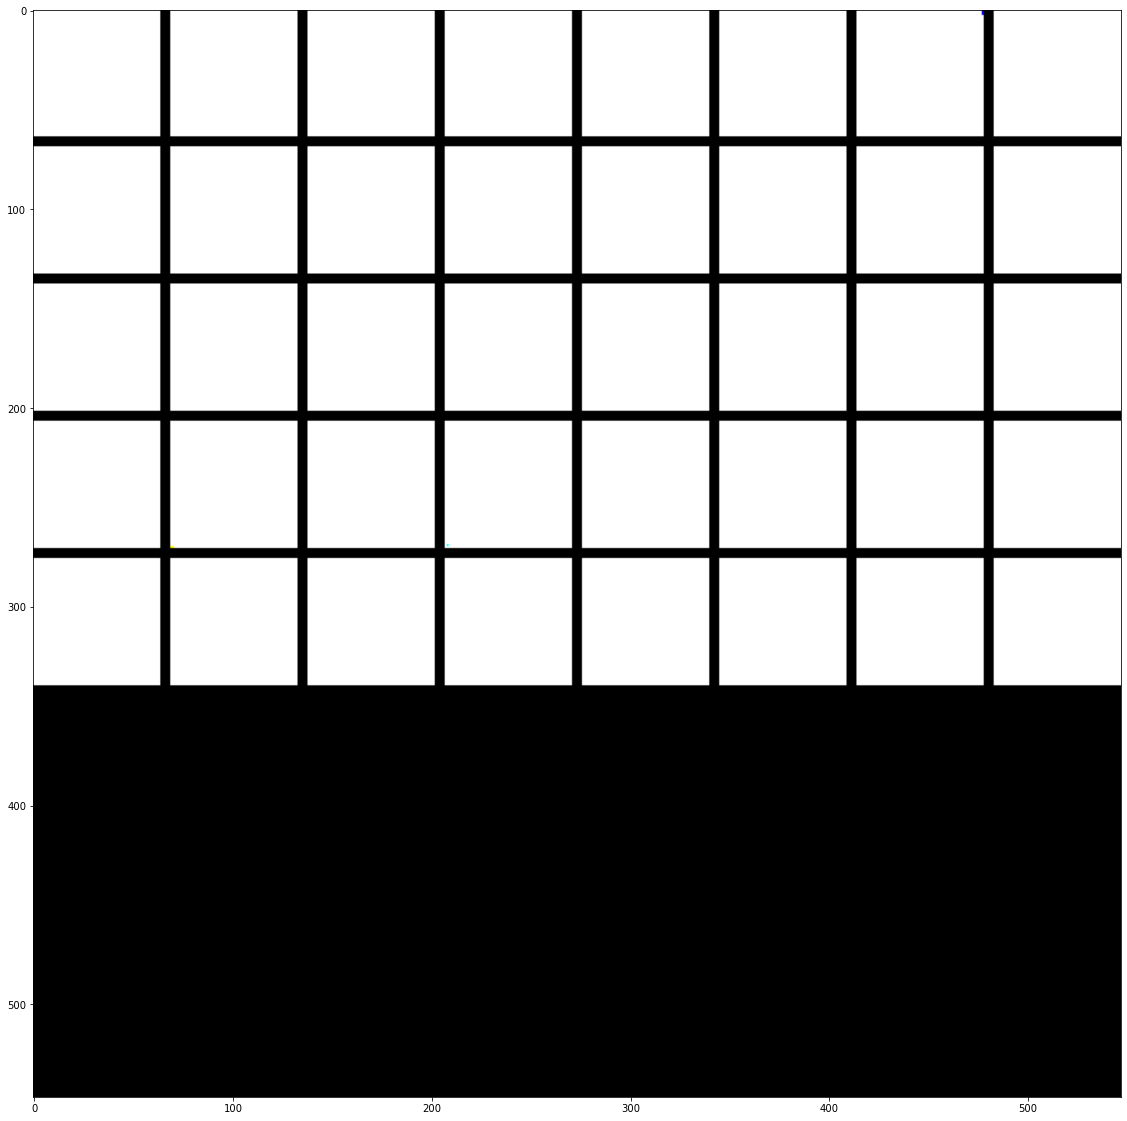

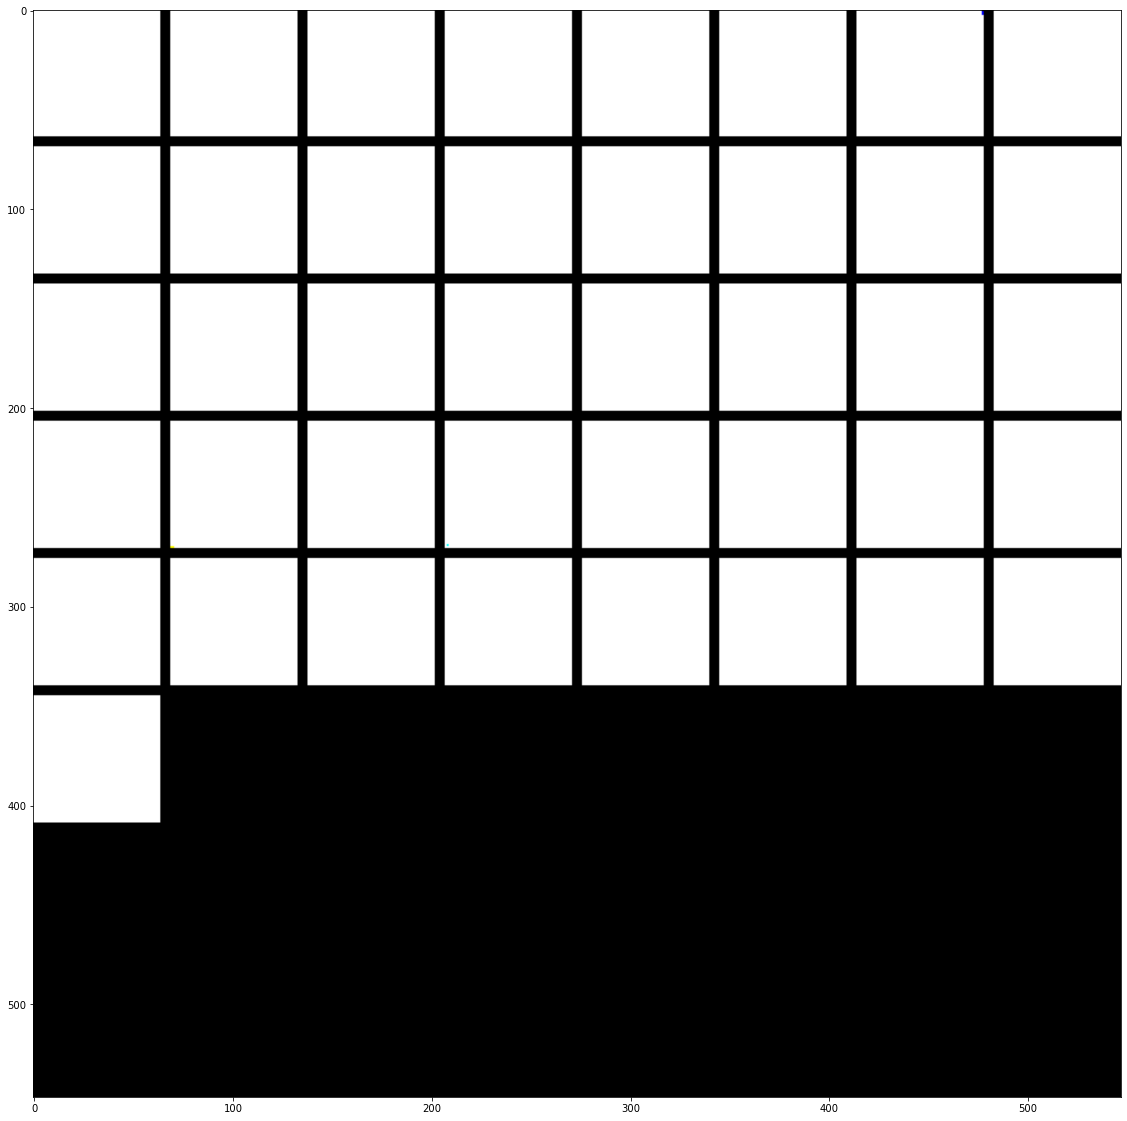

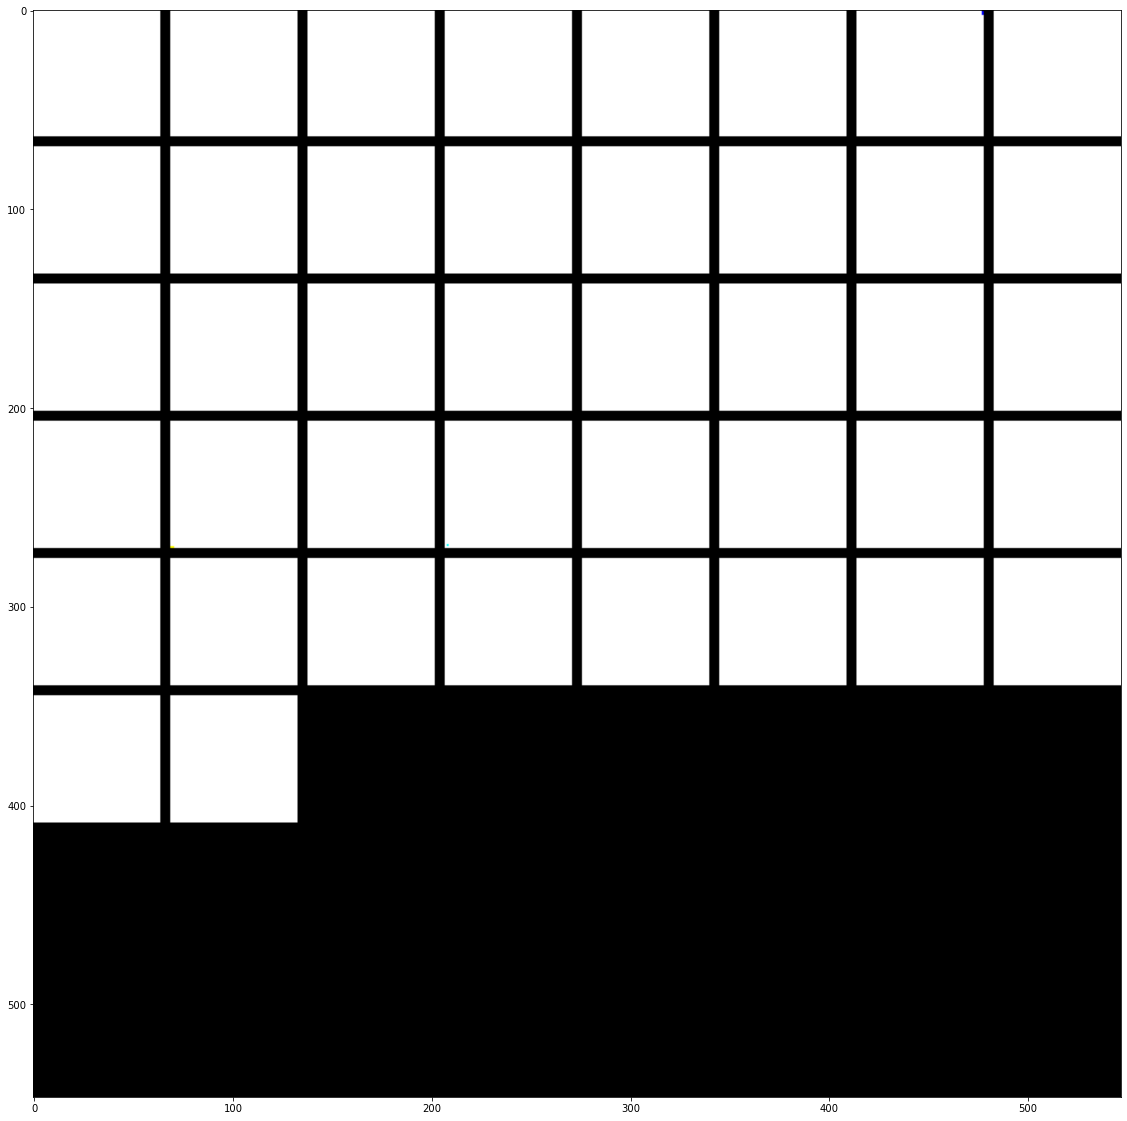

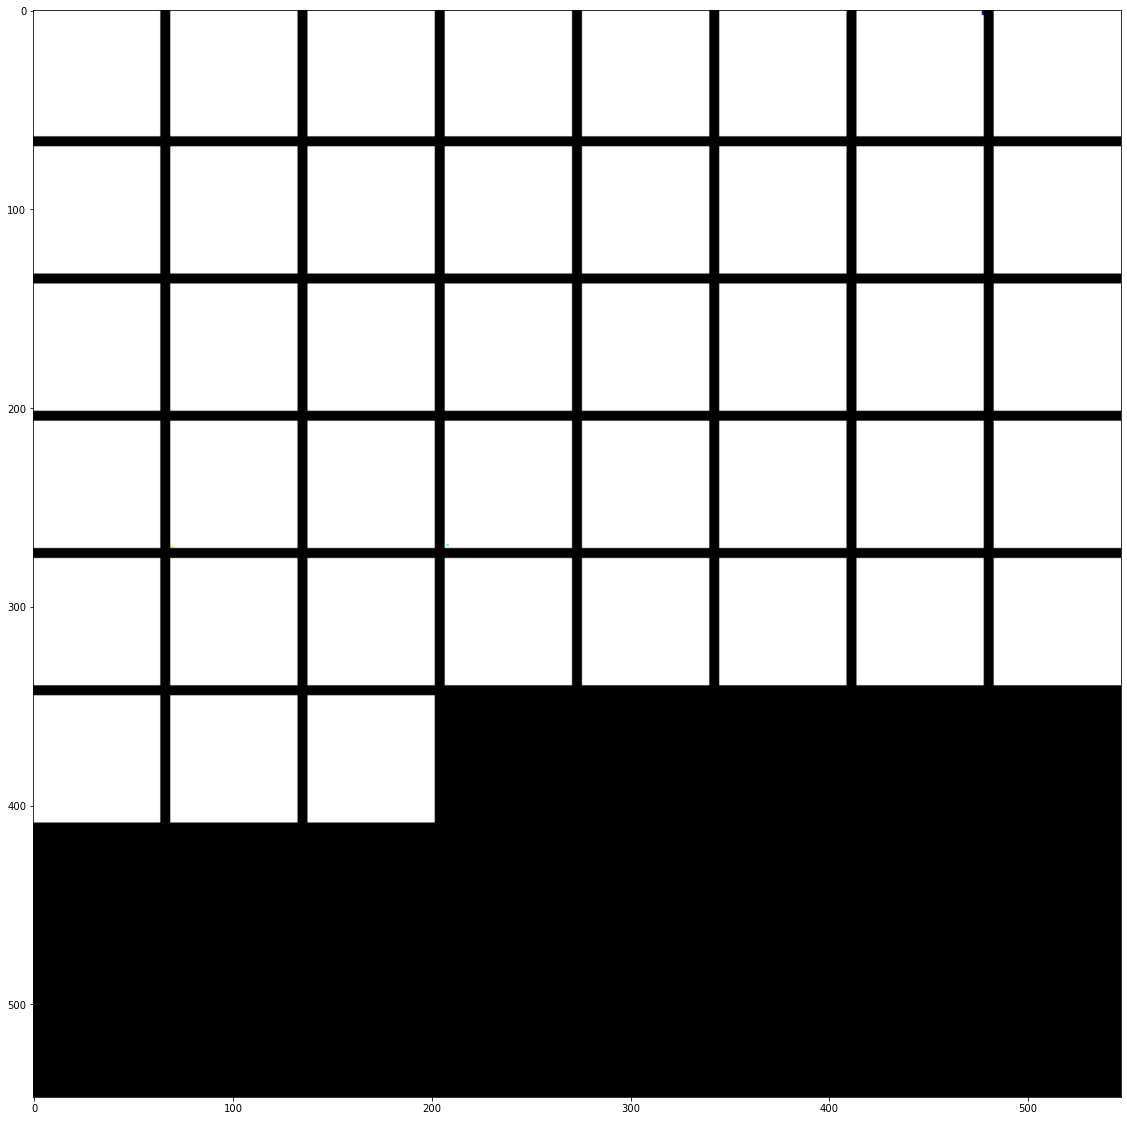

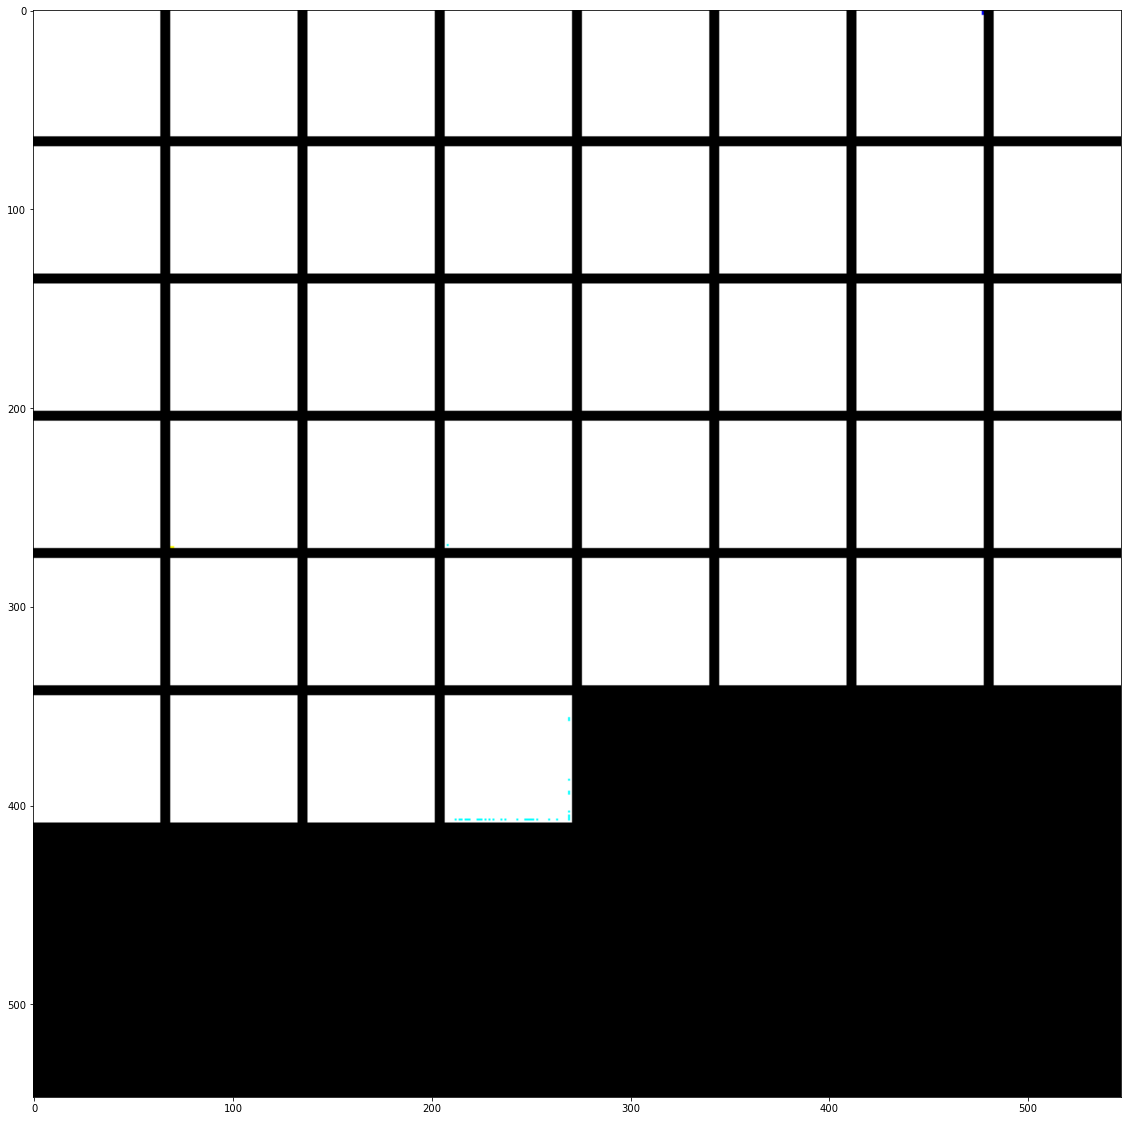

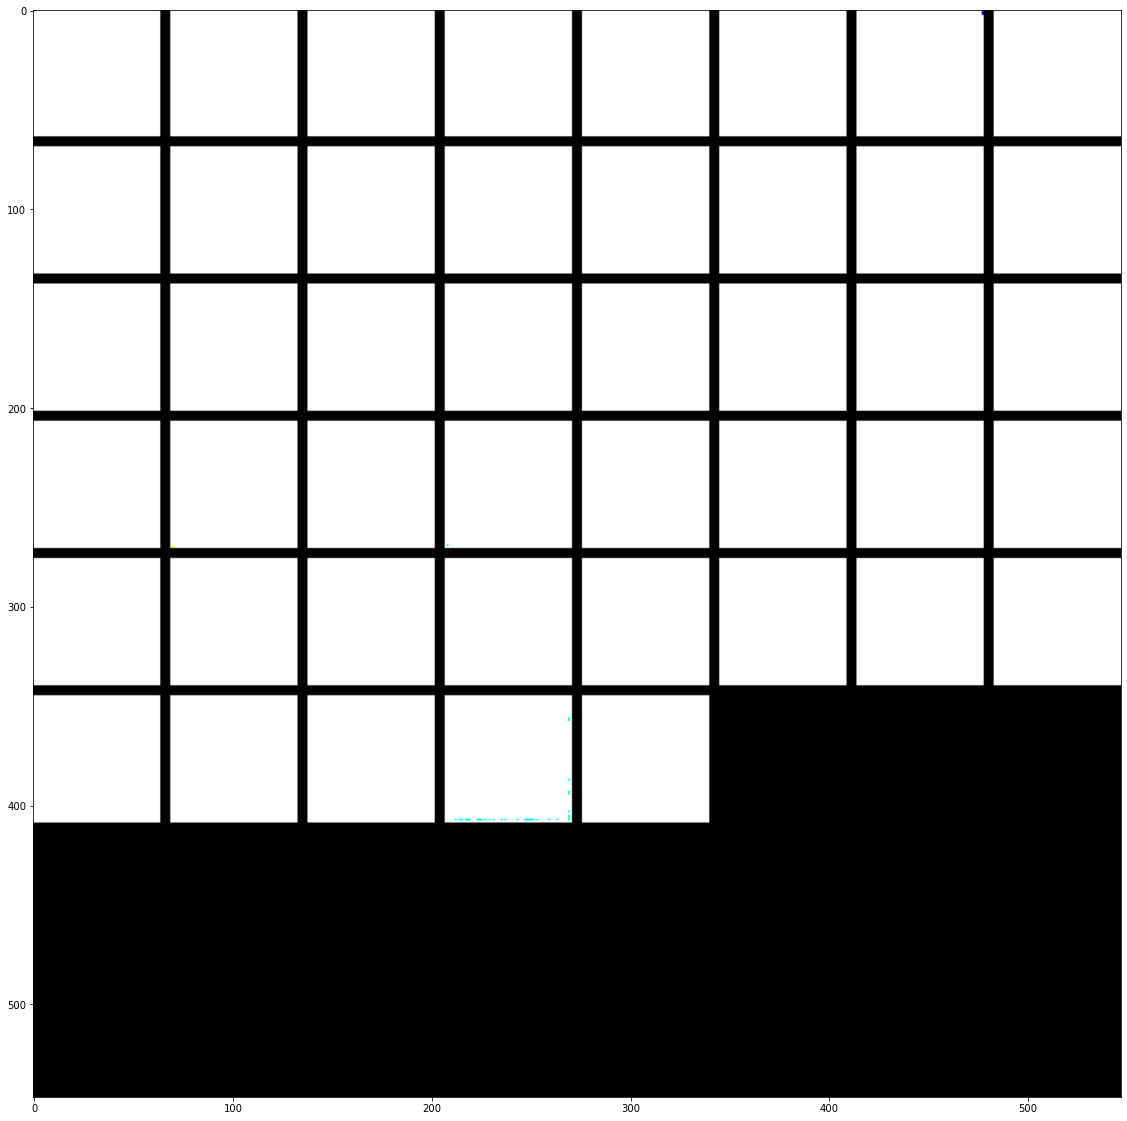

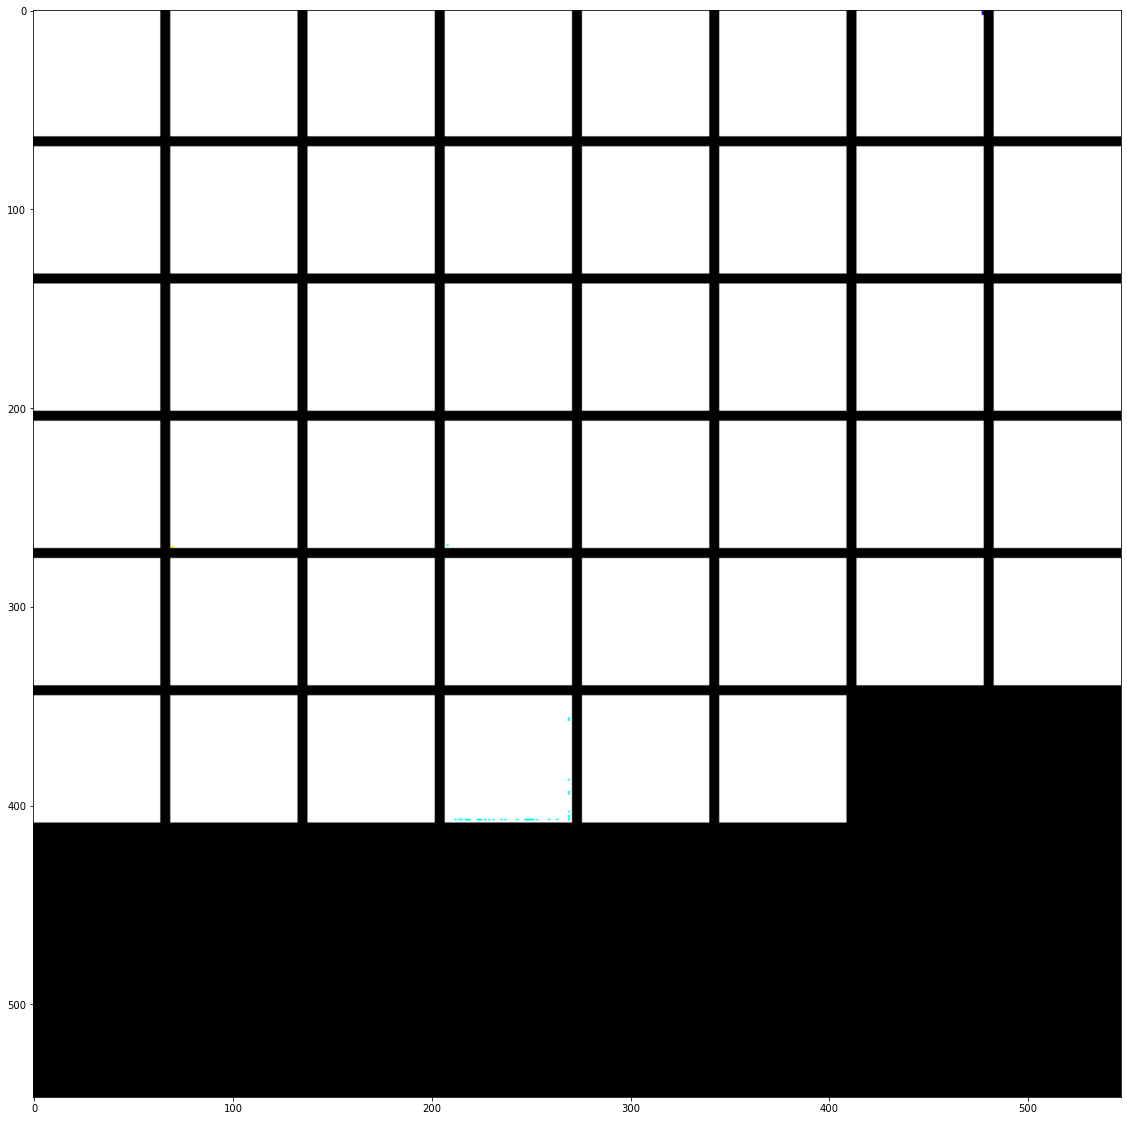

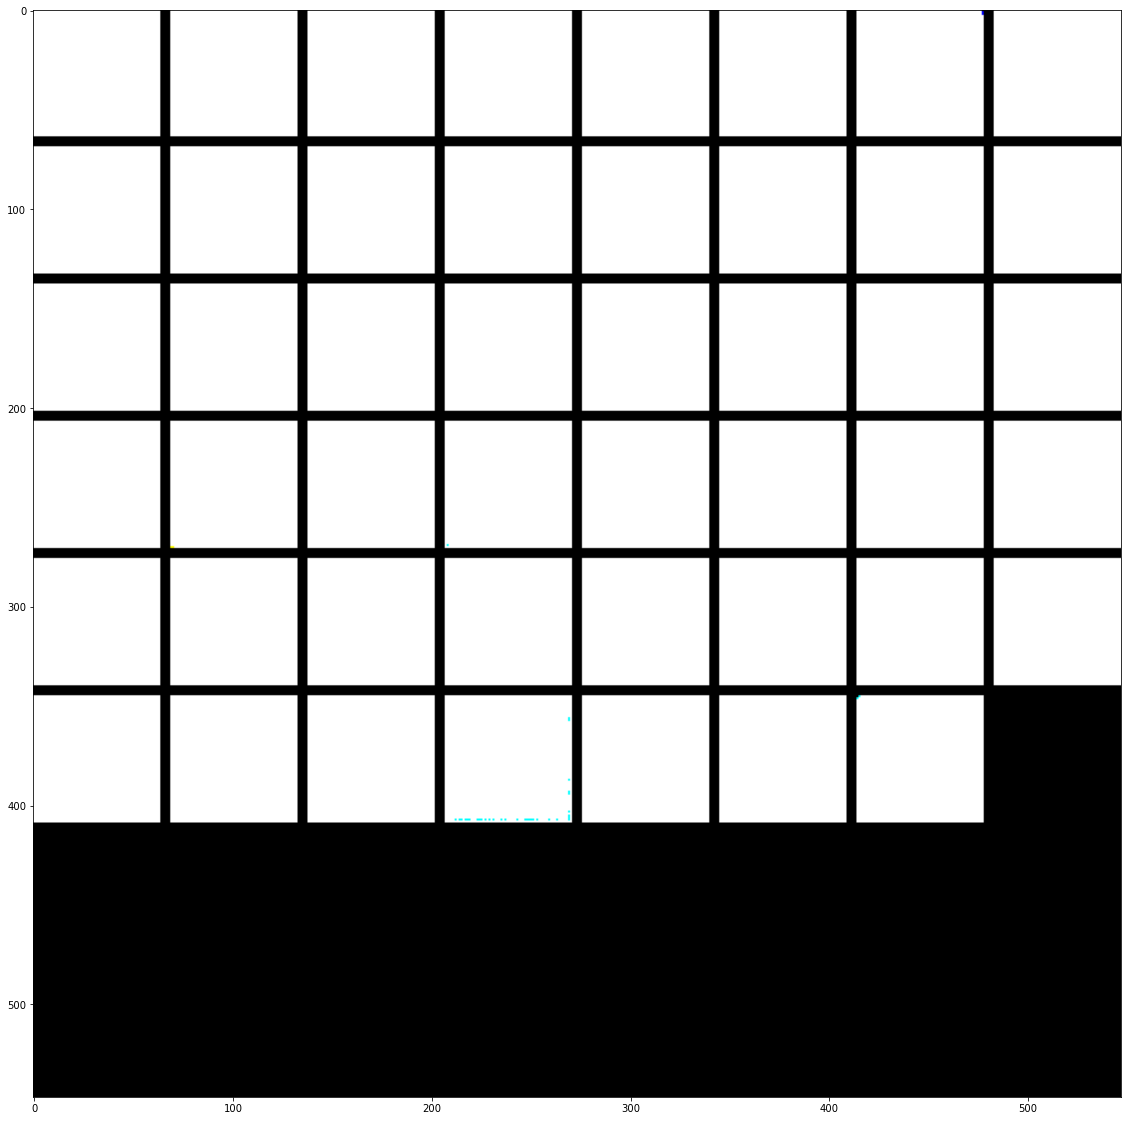

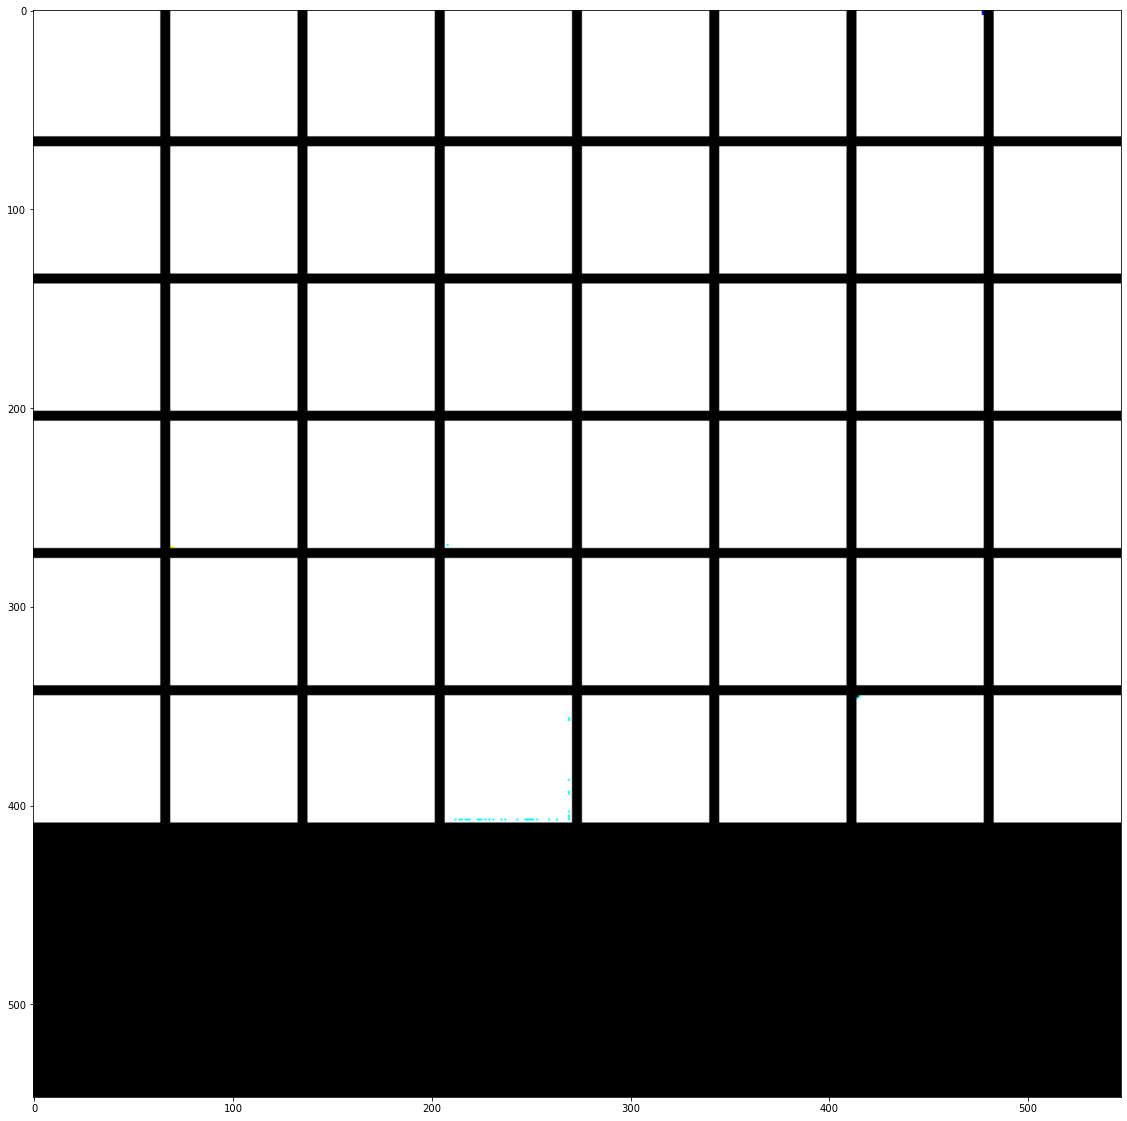

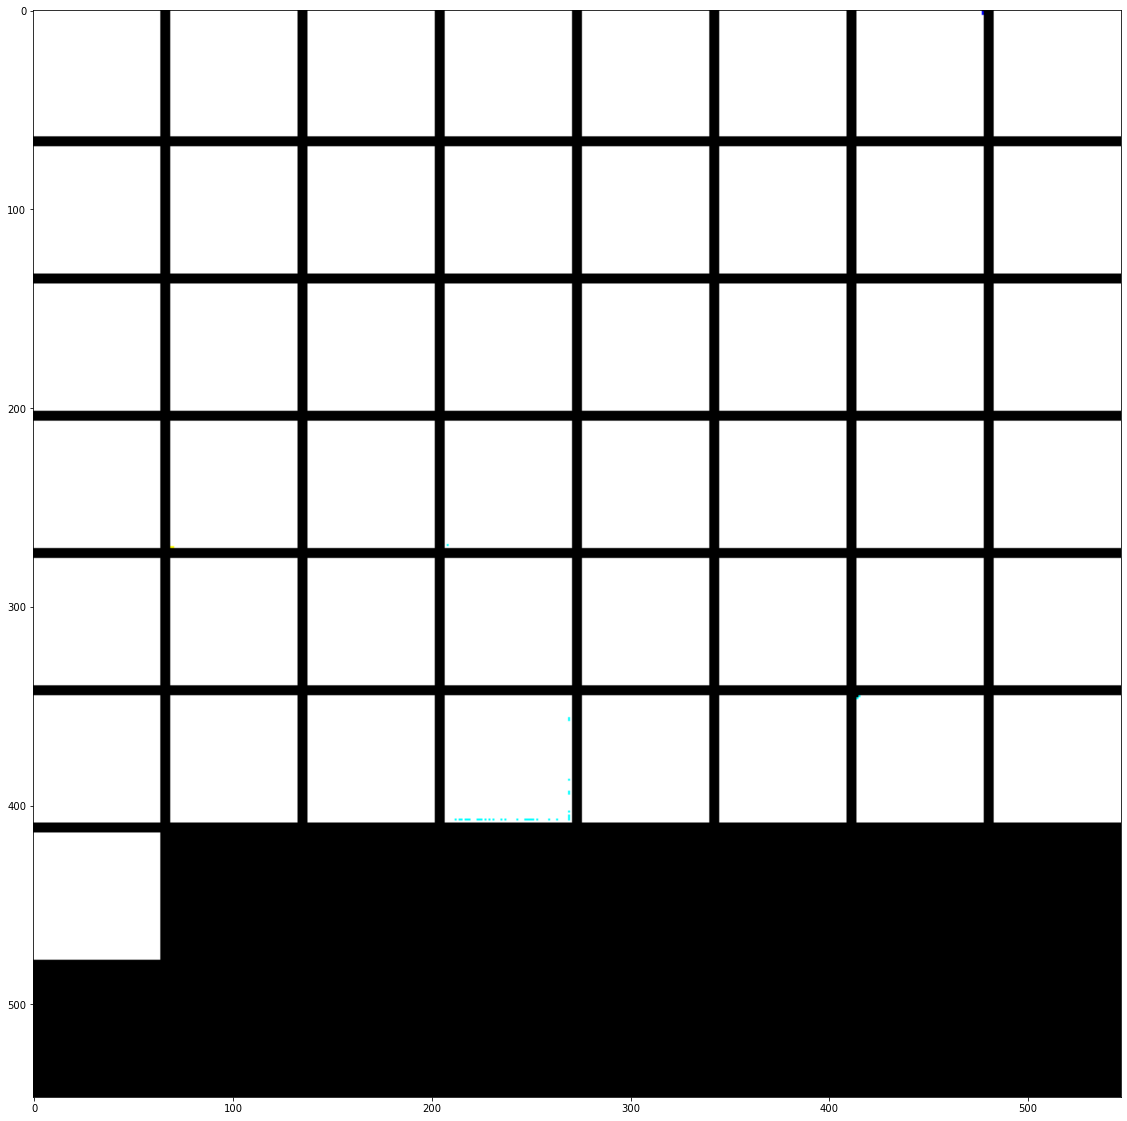

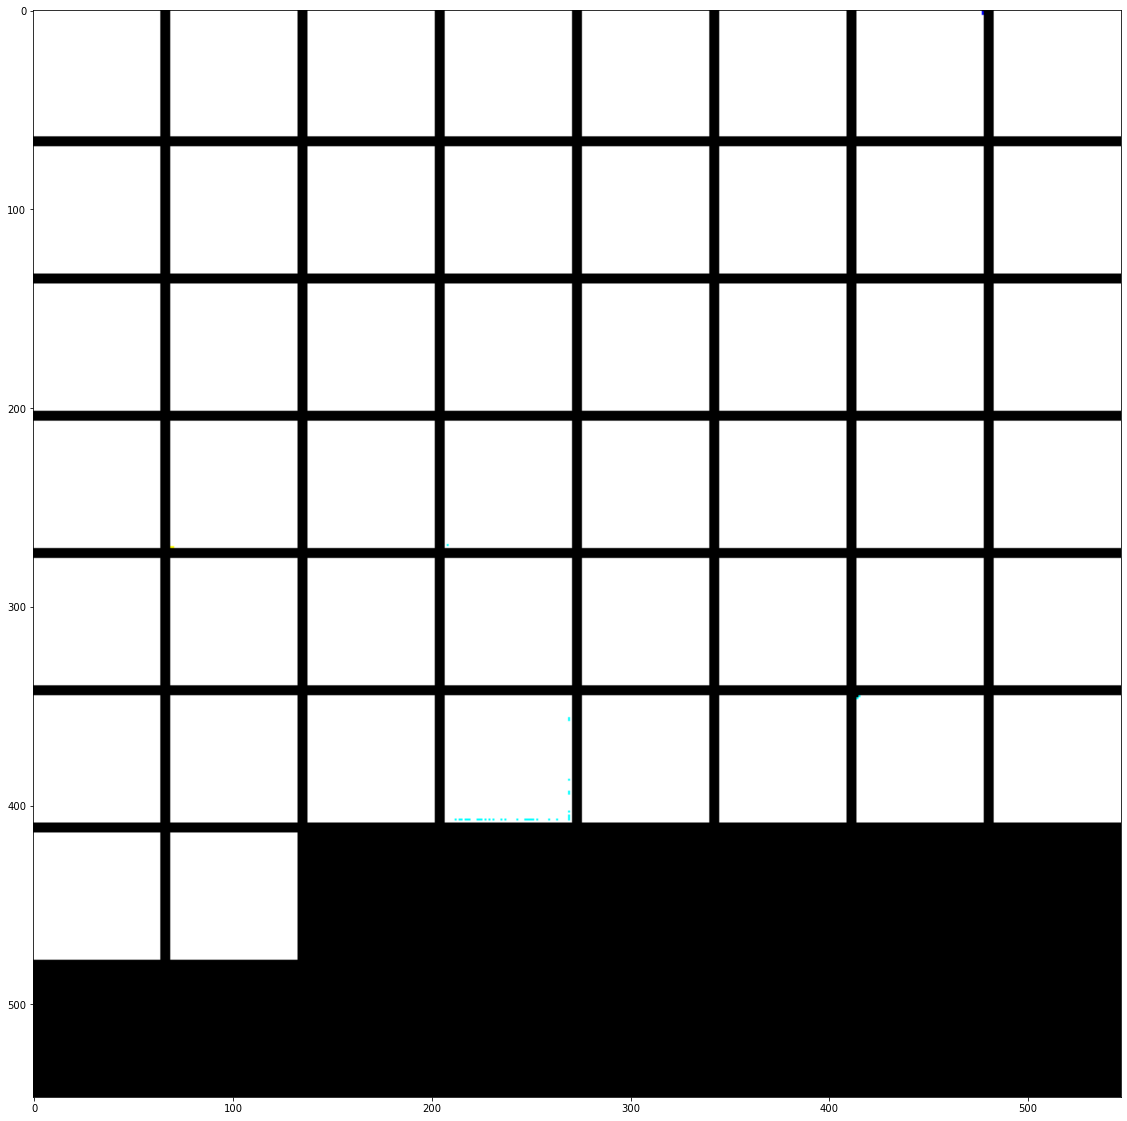

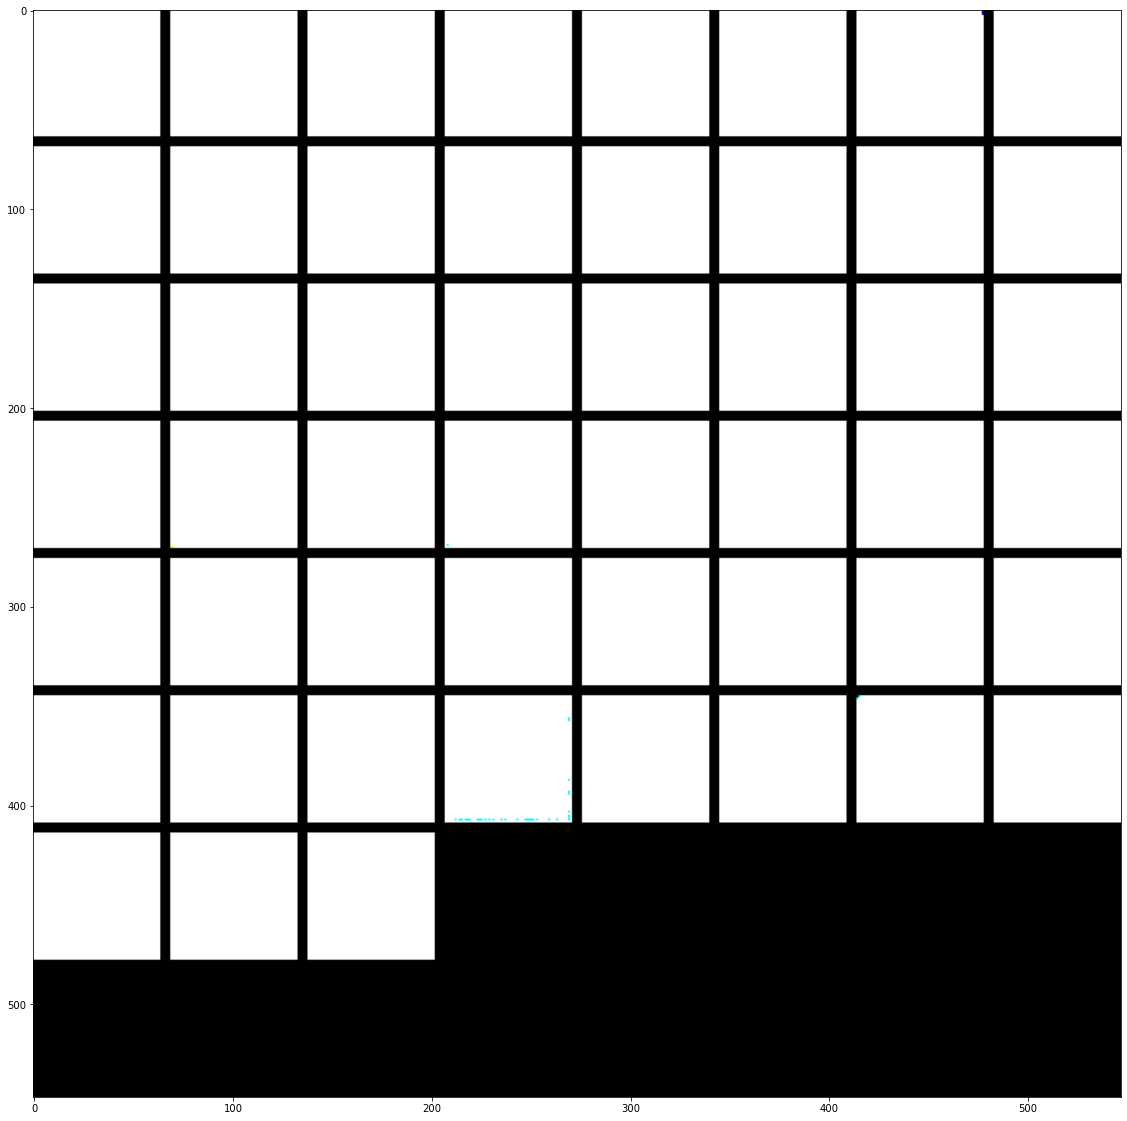

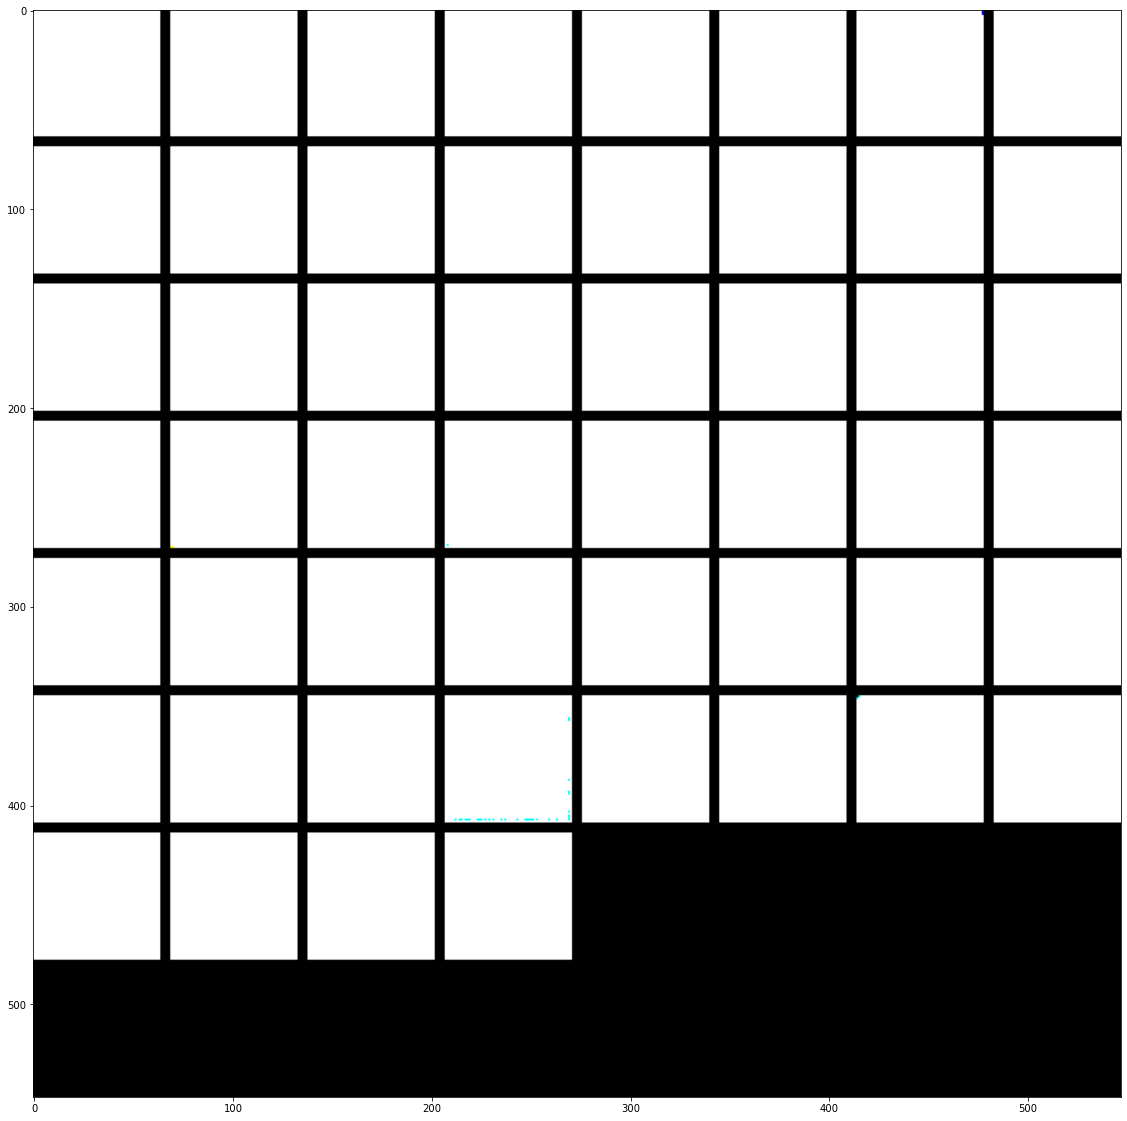

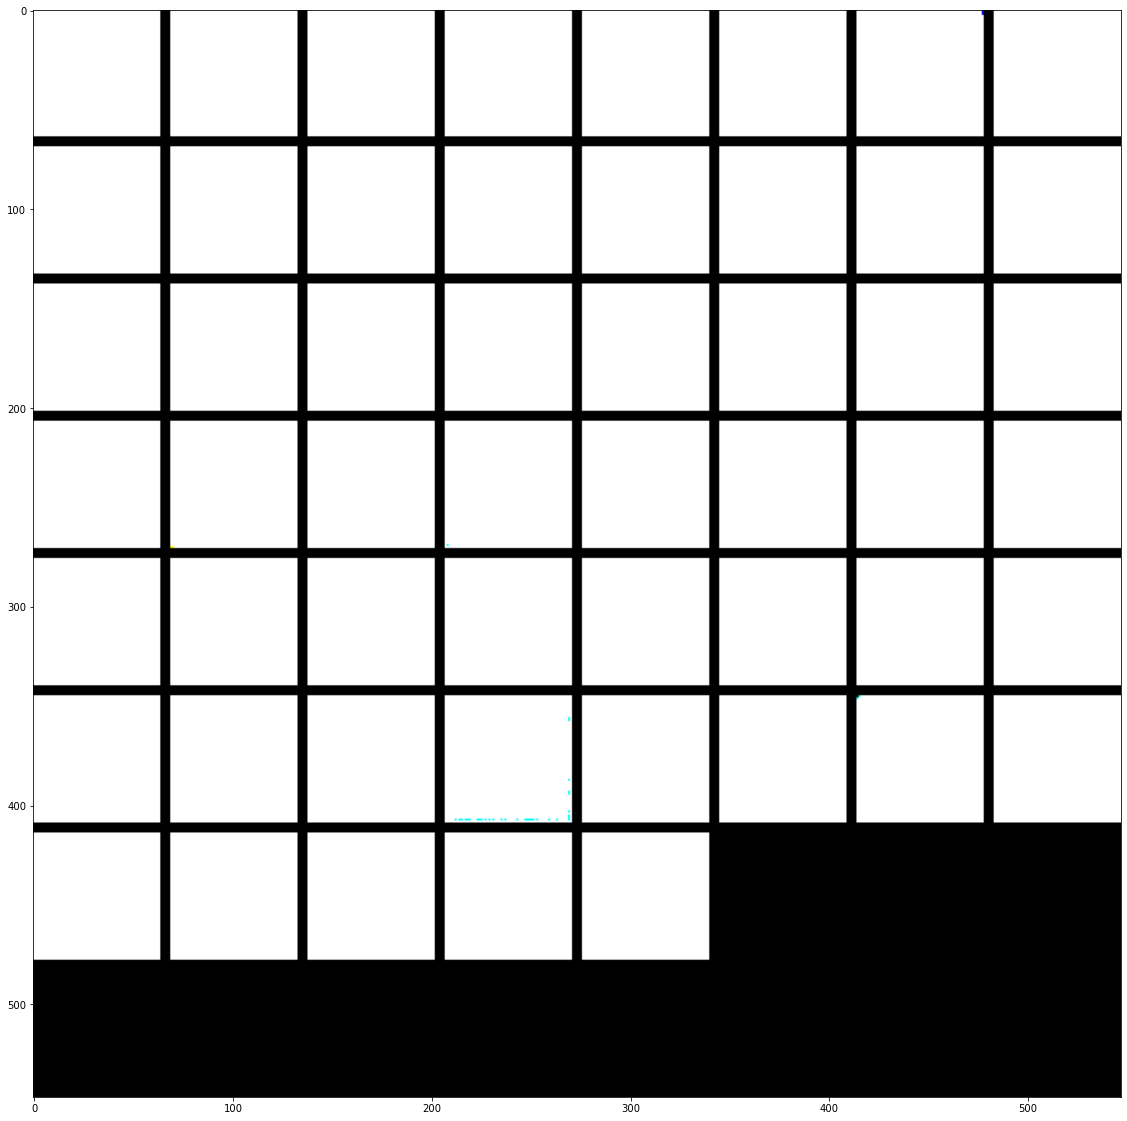

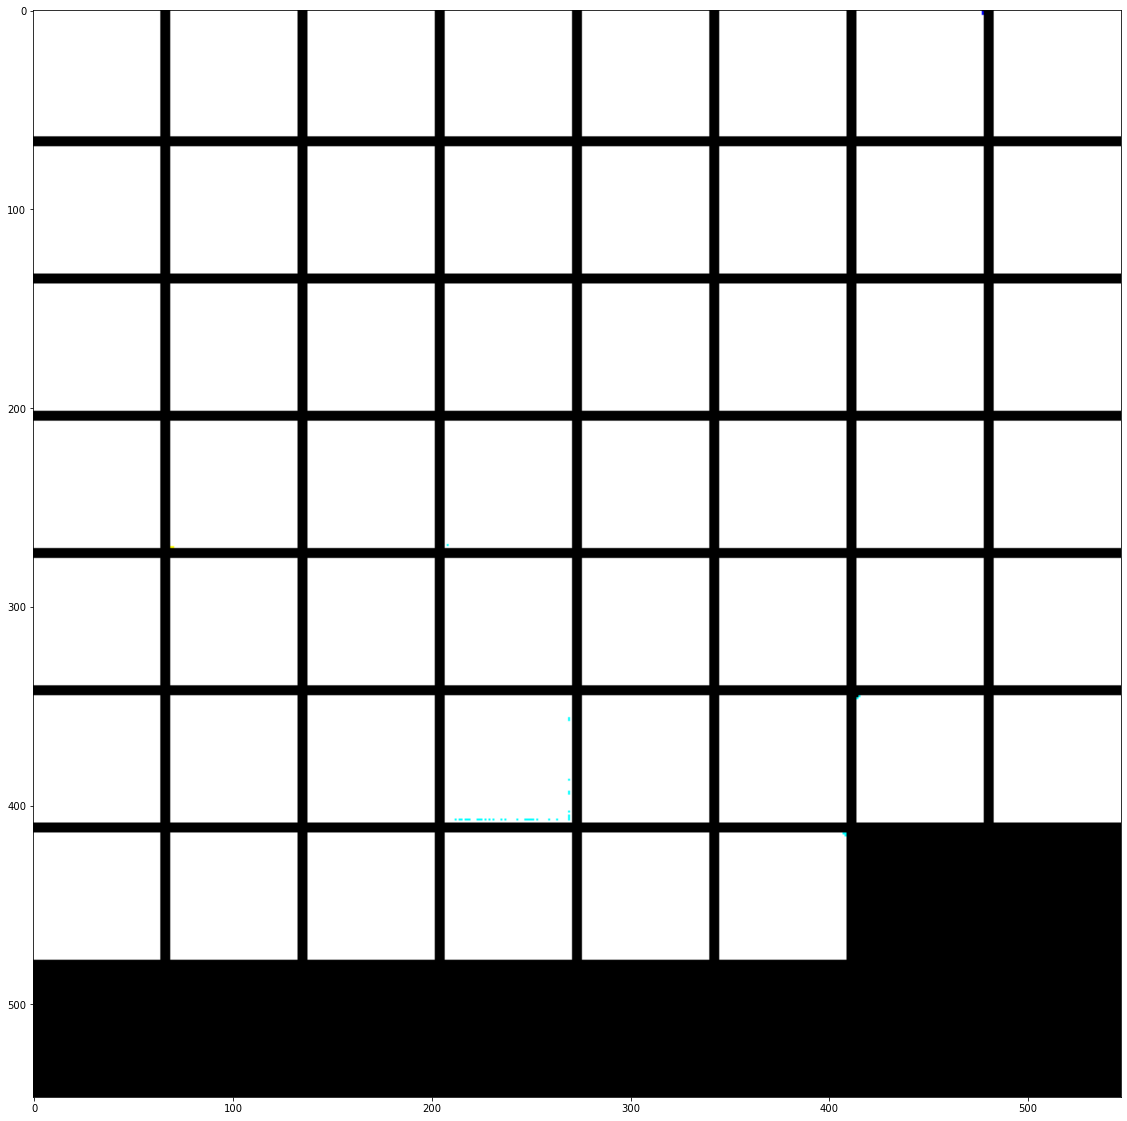

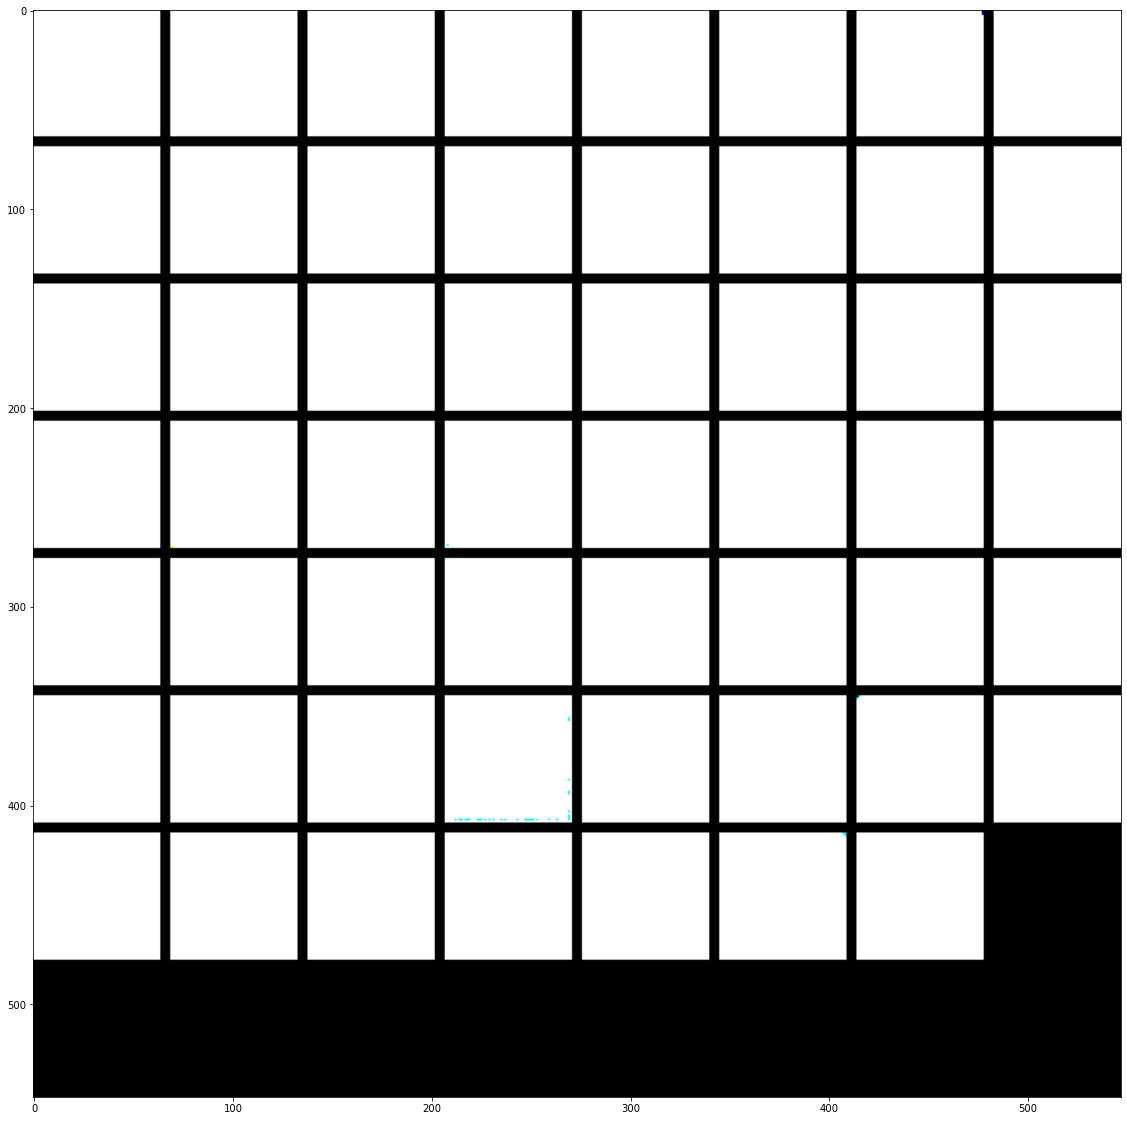

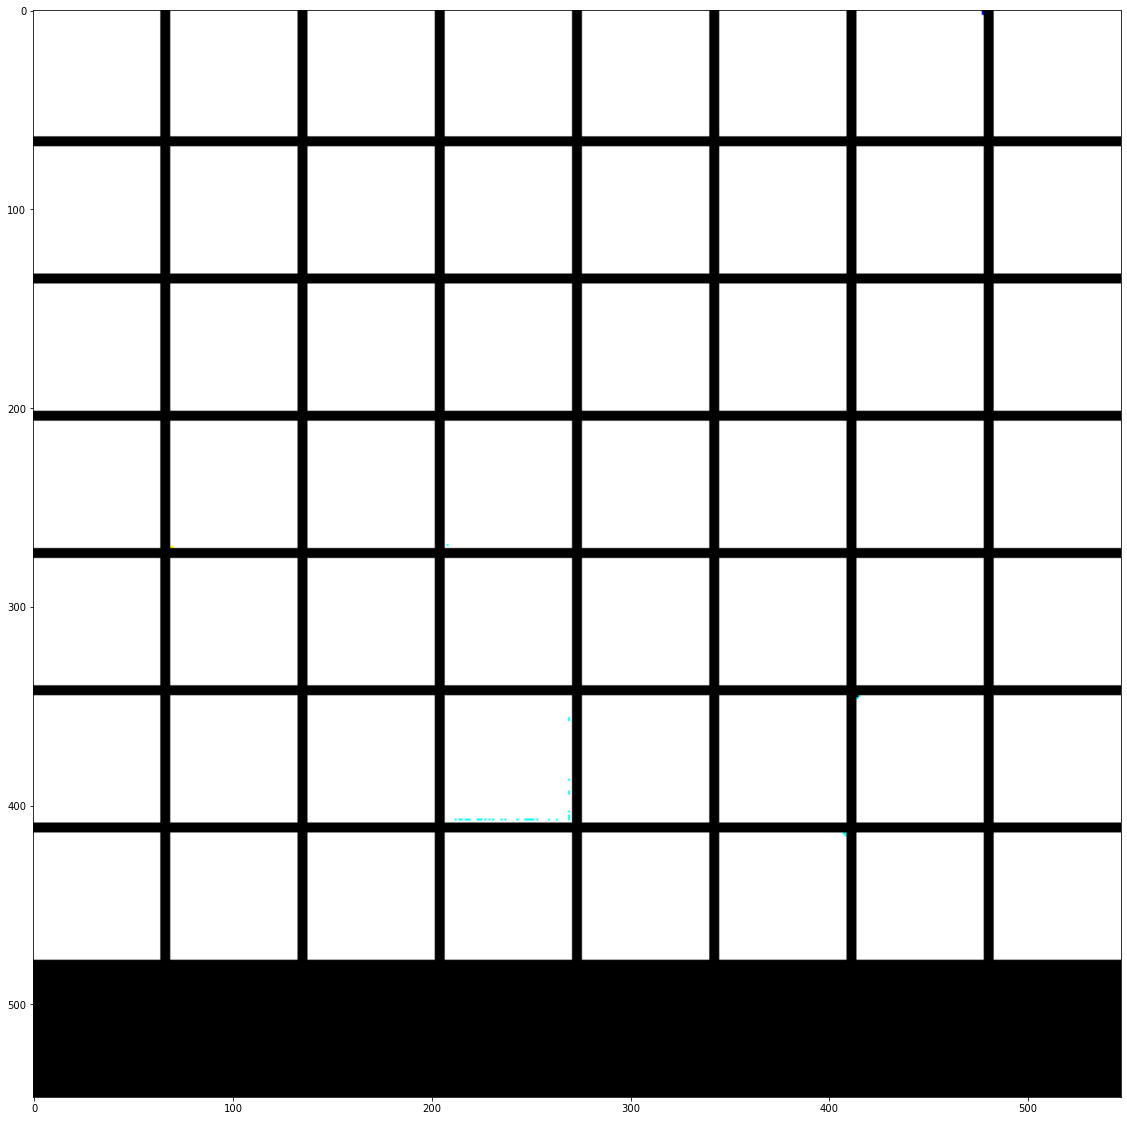

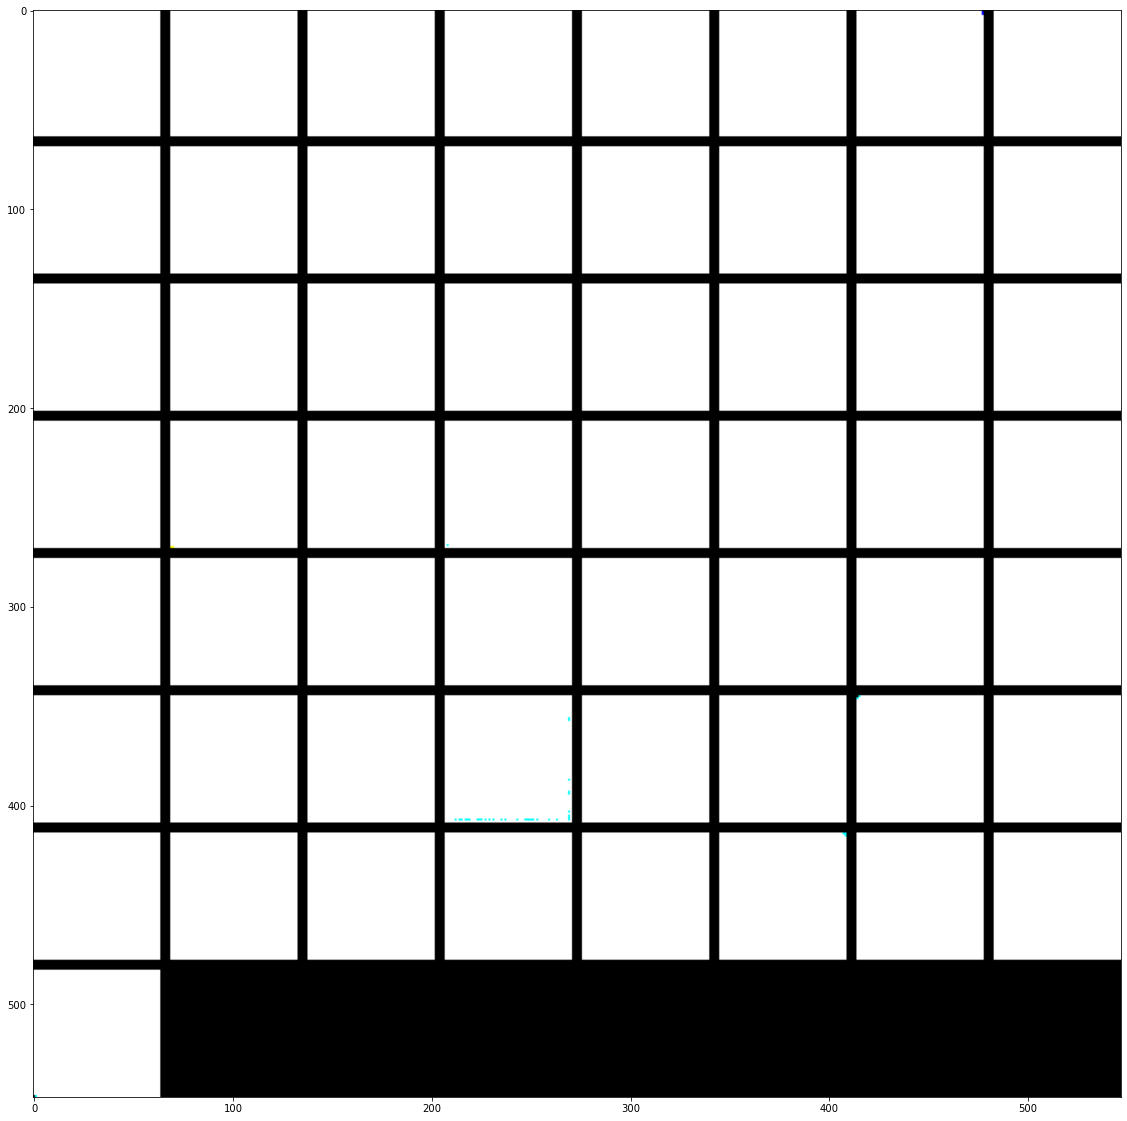

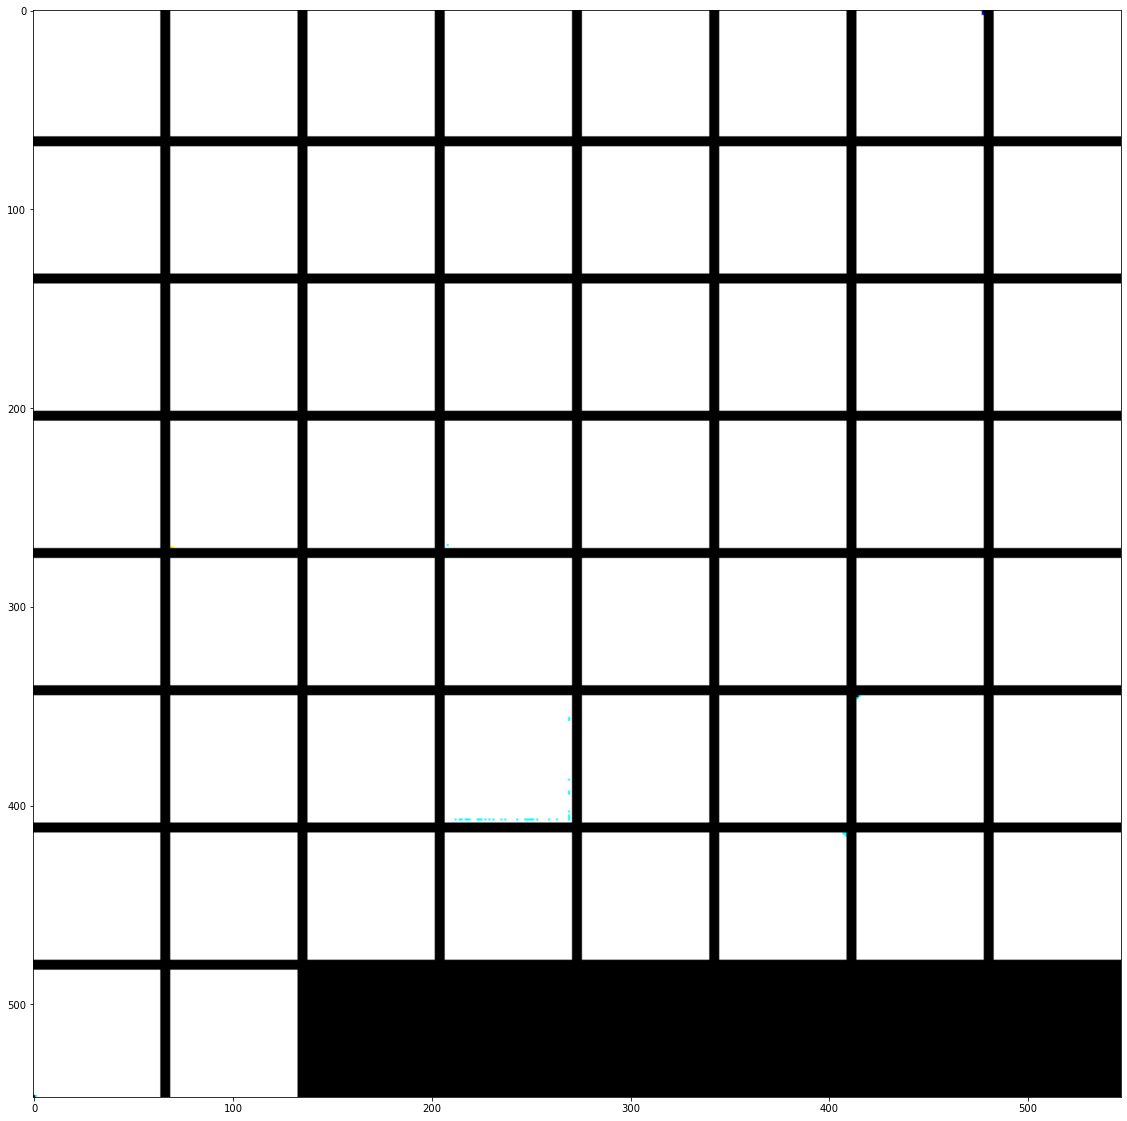

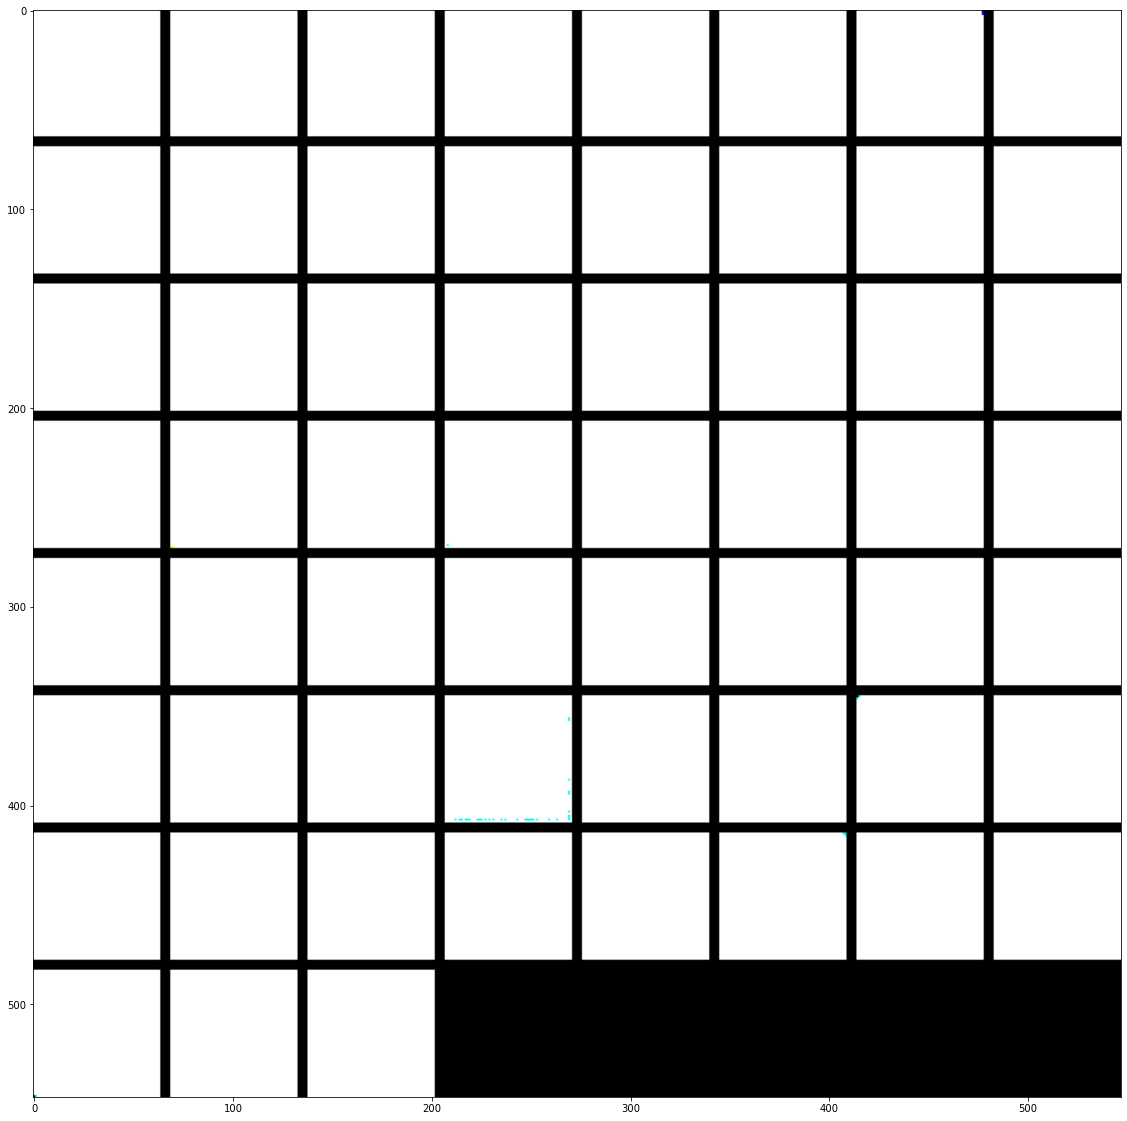

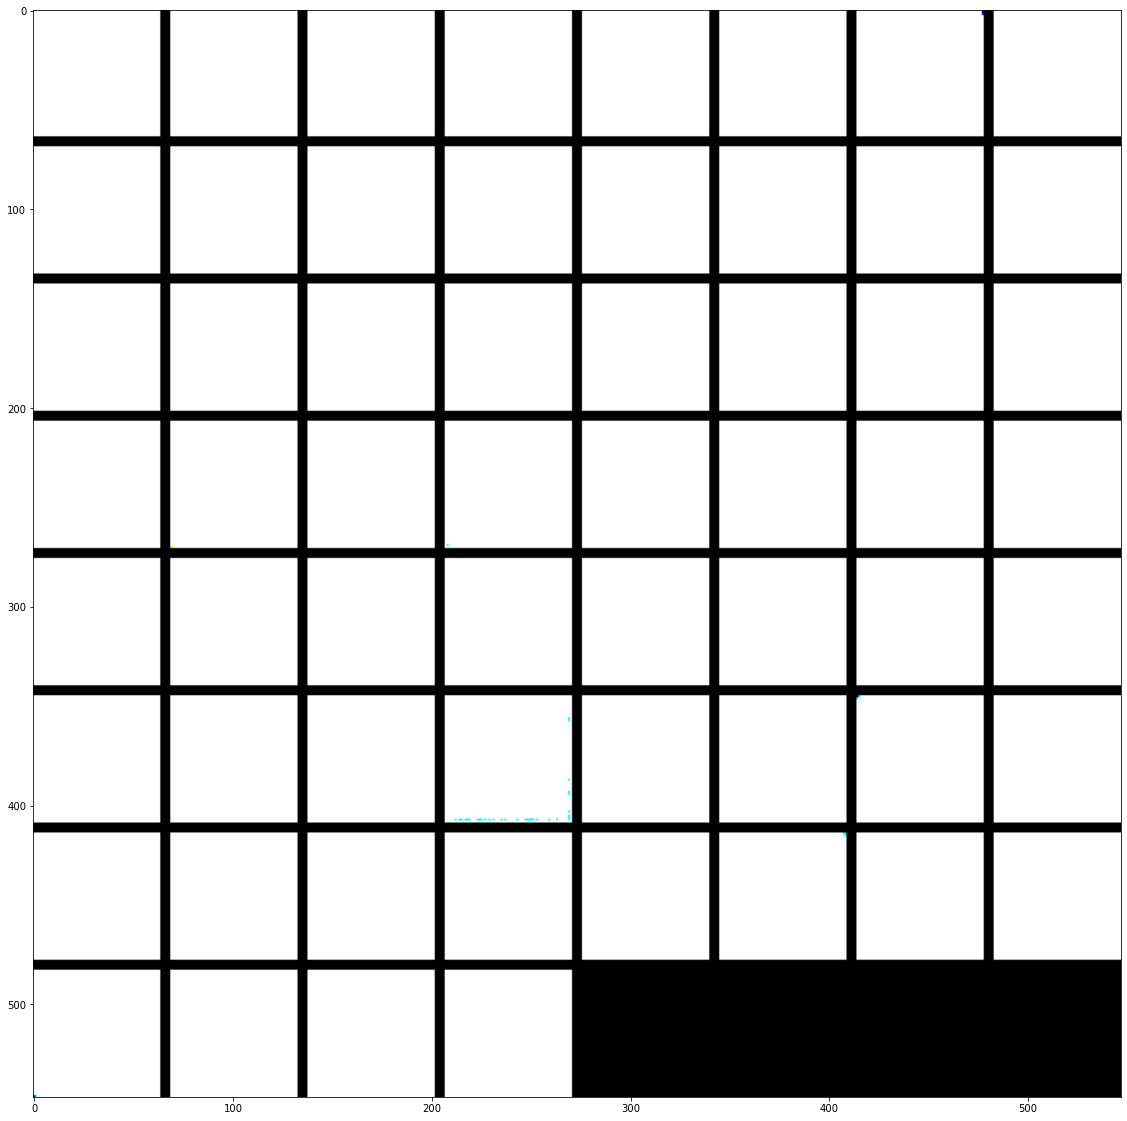

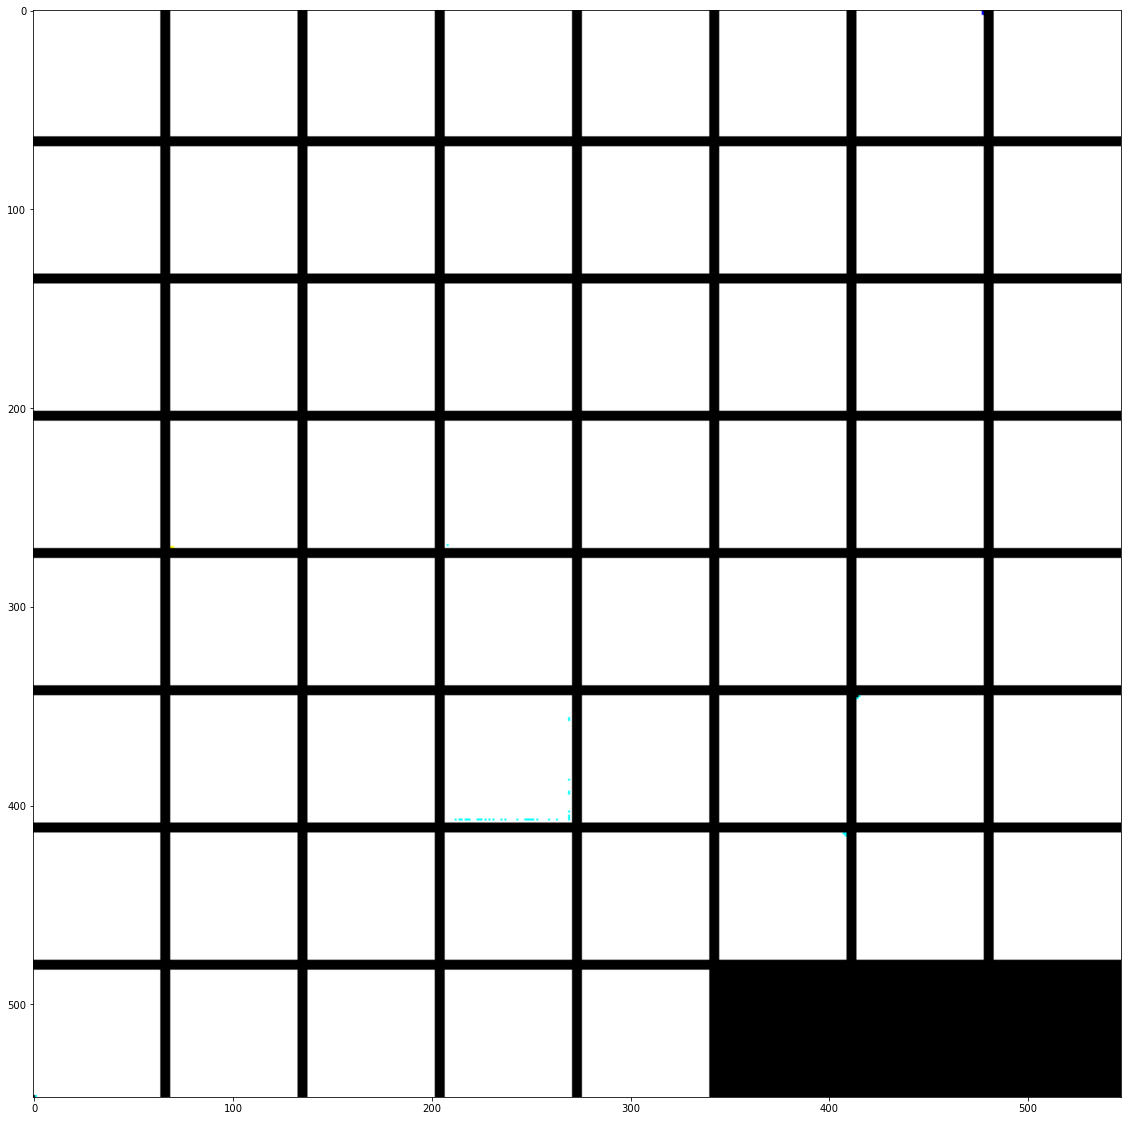

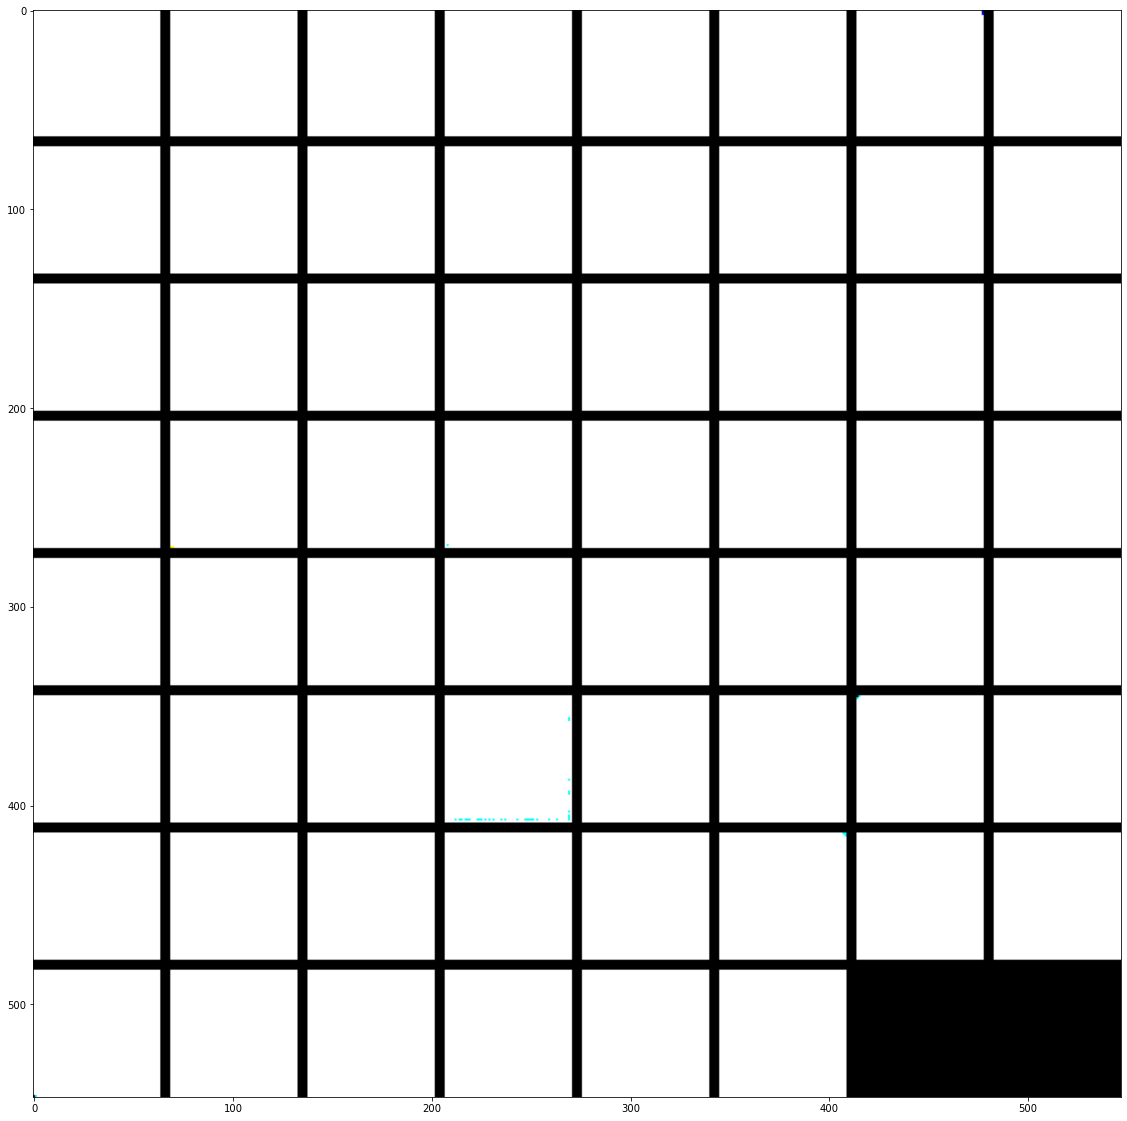

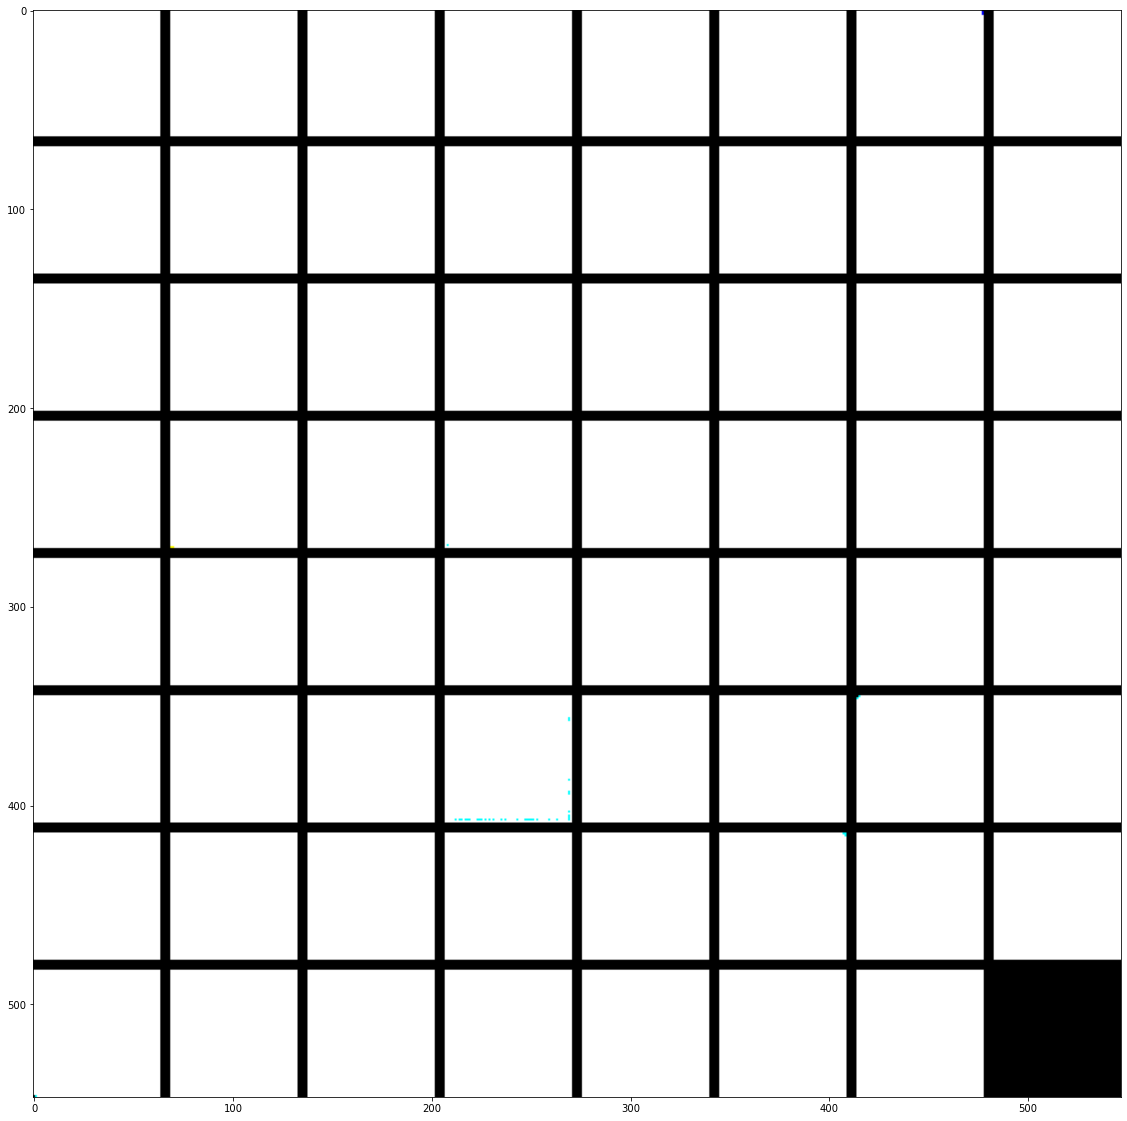

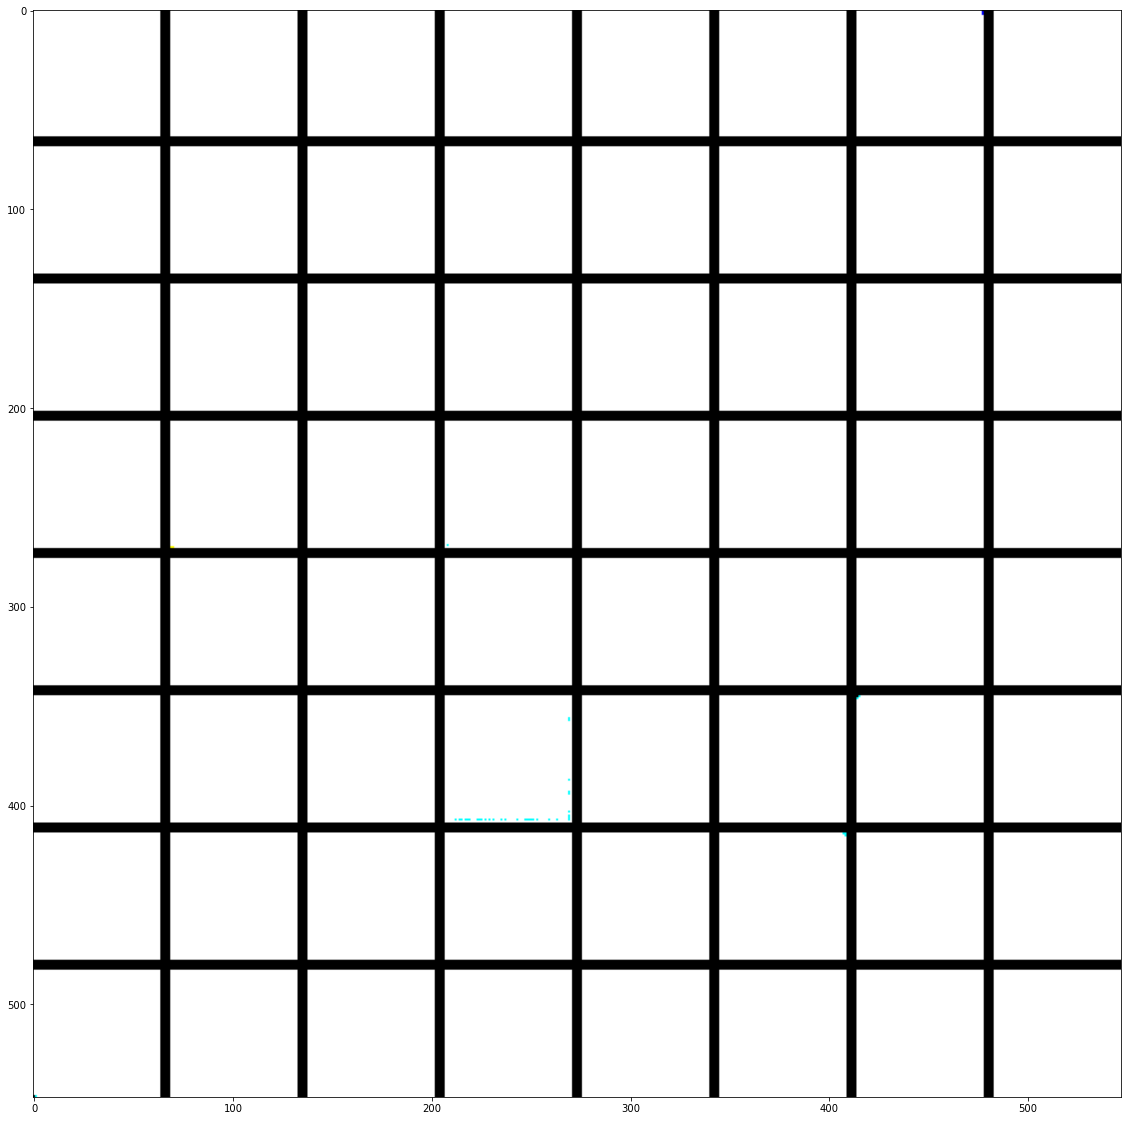

In [66]:
# -------------------------------------------------------------
# GENERATING A GRID OF ALL FILTER RESPONSE PATTERNS IN A LAYER |
# -------------------------------------------------------------

layer_name = 'block1_conv1'
size = 64
margin = 5

# Empty (black) image to store results
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):  # Iterate over the rows of the results grid
    for j in range(8):  # iterates over the columns of the results grid
        # Generates the pattern for filter i+(j*8) in layer_name
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
        # Displays the results grid
        plt.figure(figsize=(20, 20))
        plt.imshow(results)